# Module

In [1]:
import time
import datetime
import pymysql
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import re
import os
import copy
from datetime import datetime, timedelta
import seaborn as sns 

from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegression

from pylab import mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# factor analysis
from factor_analyzer import FactorAnalyzer

In [4]:
# classifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [5]:
# # regression

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import PolynomialFeatures

In [6]:
# # recursive feature elimination and cross-validated
# # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

# from sklearn.feature_selection import RFECV

# # mlxtend.feature_selection.SequentialFeatureSelector
# # selector: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# # plot: http://rasbt.github.io/mlxtend/user_guide/plotting/plot_sequential_feature_selection/

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [7]:
# # MLP

# import tensorflow as tf
# from keras.utils import np_utils
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
# # statistic

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import  pairwise_tukeyhsd

# Data

## semester

In [5]:
# member_semesterlog
df_log=pd.read_excel("member_semesterlog_trainingdata.xlsx")
if  "Unnamed: 0" in df_log.columns:
    df_log=df_log.drop("Unnamed: 0", axis=1)
    
df_log=df_log.set_index("Username")
# df_chname=pd.read_excel("member.xlsx")
# if  "Unnamed: 0" in df_chname.columns:
#     df_chname=df_chname.drop("Unnamed: 0", axis=1)
    
# df_log=pd.merge(df_log, df_chname[["帳號","姓名"]], left_on="Username", right_on="帳號", how="left").drop("帳號", axis=1)
df_log=df_log.sort_index()
df_log.head()

Module  Module_ct  \
Username                                                                  
108385601  random pandas _rebuild datasets metrics silhou...         44   
108524010  random pandas numpay datasets metrics PCA silh...         43   
108524012  random pandas requests DataFrame datasets metr...         46   
108524013  random pandas _rebuild datasets metrics PCA si...         46   
108582604  random pandas datasets metrics PCA silhouette_...         44   

                                            Modulemethod_use  Modulemethod_ct  \
Username                                                                        
108385601  .hist .pop .tail np.sum .resample .round np.ze...              152   
108524010  .hist .pop .tail np.sum .resample np.zeros plt...              135   
108524012  .hist .pop .tail np.sum .resample np.zeros plt...              139   
108524013  .hist .pop .tail np.sum .resample np.zeros plt...              137   
108582604  .hist .pop .tail np.sum .resample np.zeros plt...              140   

                                             Basicmethod_use  Basicmethod_ct  \
Username                                                                       
108385601  .isdisjoint .split .pop .insert .title .items ...              26   
108524010  .isdisjoint .split .pop .insert .title .items ...              25   
108524012  .isdisjoint .split .pop .find .insert .title ....              26   
108524013  .isdisjoint .split .pop .insert .title .items ...              25   
108582604  .isdisjoint .split .difference .pop .union .in...              28   

           SyntaxError_Fixtime  NameError_Fixtime  AttributeError_Fixtime  \
Username                                                                    
108385601           257.794118         276.250000               42.500000   
108524010           133.478261          45.285714               18.142857   
108524012           378.685185         151.038462              108.520000   
108524013           265.473684          36.678571               64.642857   
108582604            29.411765          54.100000               75.187500   

           TypeError_Fixtime  KeyError_Fixtime  ValueError_Fixtime  \
Username                                                             
108385601          22.437500        124.857143          159.000000   
108524010          49.090909         51.181818           48.500000   
108524012         366.592593        117.516129           27.437500   
108524013          53.250000        481.000000           50.500000   
108582604          50.357143         59.142857           65.857143   

           IndentationError_Fixtime  IndexError_Fixtime  SyntaxError_Ct  \
Username                                                                  
108385601                     102.0                19.0              35   
108524010                     420.2                 NaN              23   
108524012                       4.0                 7.0              54   
108524013                     457.0                 NaN              19   
108582604                     245.0                15.0              17   

           NameError_Ct  AttributeError_Ct  TypeError_Ct  KeyError_Ct  \
Username                                                                
108385601            31                 15            16            7   
108524010            14                  7            11           11   
108524012            52                 25            27           31   
108524013            29                 14            13            8   
108582604            10                 16            14            7   

           ValueError_Ct  IndentationError_Ct  IndexError_Ct  \
Username                                                       
108385601              5                    3              1   
108524010              4                    5              0   
108524012             17                    1              1   
108524013 

In [5]:
#list(df_log.columns)

In [8]:
df_log_textdata=df_log[['Module', 'Modulemethod_use', 'Basicmethod_use']]
df_log_values=df_log[[
 'Module_ct',  'Modulemethod_ct',  'Basicmethod_ct', 
 'modulemethod_log_usect', 'basicmethod_log_usect',
 'SyntaxError_Ct',  'NameError_Ct',  'AttributeError_Ct',  'TypeError_Ct',  
 'KeyError_Ct',  'ValueError_Ct',  'IndentationError_Ct',   'IndexError_Ct', 
 'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime',
 'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime',
# 'SyntaxError_FailfixCt',  'NameError_FailfixCt', 'AttributeError_FailfixCt', 'TypeError_FailfixCt',
# 'KeyError_FailfixCt', 'ValueError_FailfixCt',  'IndentationError_FailfixCt', 'IndexError_FailfixCt',
 'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
 'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
 'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
 'Timespent_ad', 'DebugTime',
  #'non_py_expr', 'py_expr'
 'wk_expr', 'non_py_prof', 'py_prof']]

df_log_features=df_log[[
 'Module_ct',  'Modulemethod_ct',  'Basicmethod_ct', 
 'modulemethod_log_usect', 'basicmethod_log_usect',
 'SyntaxError_Ct',  'NameError_Ct',  'AttributeError_Ct',  'TypeError_Ct',  
 'KeyError_Ct',  'ValueError_Ct',  'IndentationError_Ct',   'IndexError_Ct', 
 'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime',
 'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime',
#  'SyntaxError_FailfixCt',  'NameError_FailfixCt', 'AttributeError_FailfixCt', 'TypeError_FailfixCt',
#  'KeyError_FailfixCt', 'ValueError_FailfixCt',  'IndentationError_FailfixCt', 'IndexError_FailfixCt',
 'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
 'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
 'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
 'Timespent_ad', 'DebugTime',
#  'wk_expr', 'non_py_expr', 'non_py_prof', 'py_expr', 'py_prof', 'pretest_score'
]]
#df_score=df_log[['final_score']]

In [9]:
desc_df=pd.DataFrame()
for cl in df_log_features.columns:
    x=list(map(lambda x: round(x, 3), df_log_features[cl].describe()))
    x=pd.Series(x, index=list(df_log_features[cl].describe().index))
    x1=pd.DataFrame({cl:x}).T
    desc_df=pd.concat([desc_df, x1], axis=0)
desc_df["var"]=desc_df["std"]**2
desc_df["var_perc"]=round(desc_df["var"]/sum(desc_df["var"]), 3)
desc_df=desc_df[["count","min","max","mean","std","var","var_perc","25%","50%","75%"]]
desc_df

count        min         max        mean  \
Module_ct                         32.0     39.000      62.000      45.875   
Modulemethod_ct                   32.0    135.000     156.000     142.406   
Basicmethod_ct                    32.0     21.000      29.000      25.375   
modulemethod_log_usect            32.0   1705.000    7419.000    3794.656   
basicmethod_log_usect             32.0    257.000    1666.000     746.094   
SyntaxError_Ct                    32.0      3.000      99.000      38.406   
NameError_Ct                      32.0      1.000      96.000      36.719   
AttributeError_Ct                 32.0      3.000      44.000      20.562   
TypeError_Ct                      32.0      3.000      42.000      19.094   
KeyError_Ct                       32.0      1.000      35.000      13.469   
ValueError_Ct                     32.0      0.000      38.000       9.906   
IndentationError_Ct               32.0      0.000       9.000       2.969   
IndexError_Ct                     32.0      0.000      20.000       1.562   
SyntaxError_Fixtime               32.0     29.412     516.655     185.307   
NameError_Fixtime                 32.0      7.000     618.000     133.364   
AttributeError_Fixtime            32.0      7.667     392.762     119.925   
TypeError_Fixtime                 32.0     22.438     366.593     103.618   
KeyError_Fixtime                  32.0      8.000    1364.944     194.357   
ValueError_Fixtime                30.0     12.750    1643.412     183.114   
IndentationError_Fixtime          25.0      4.000    3239.500     385.612   
IndexError_Fixtime                19.0      2.500    1848.500     211.911   
pattern_SimpleCondition_logct     32.0     21.000     254.000     116.156   
pattern_MultipleCondition_logct   32.0     22.000     272.000      98.938   
pattern_WhileIteration_logct      32.0      8.000     151.000      51.844   
pattern_ForInIteration_logct      32.0     80.000     614.000     272.438   
pattern_NestIteration_logct       32.0    132.000    1189.000     447.531   
pattern_DefFunction_logct         32.0     12.000     150.000      73.219   
CopyCt                            32.0    146.000    1654.000     570.188   
PasteCt                           32.0    295.000    1796.000     753.812   
ExecutionCt                       32.0    982.000    4306.000    2219.125   
ExternalPasteLength               32.0  13518.000   76744.000   32917.875   
Timespent_ad                      32.0  83028.000  259433.000  124167.875   
DebugTime                         32.0   1220.000   99580.000   25539.719   

                                       std           var  var_perc        25%  \
Module_ct                            5.142  2.644016e+01     0.000     43.000   
Modulemethod_ct                      5.387  2.901977e+01     0.000    138.750   
Basicmethod_ct                       1.755  3.080025e+00     0.000     25.000   
modulemethod_log_usect            1577.771  2.489361e+06     0.001   2383.250   
basicmethod_log_usect              367.846  1.353107e+05     0.000    429.000   
SyntaxError_Ct                      18.839  3.549079e+02     0.000     24.750   
NameError_Ct                        19.027  3.620267e+02     0.000     26.000   
AttributeError_Ct                    9.860  9.721960e+01     0.000     15.000   
TypeError_Ct                         9.630  9.273690e+01     0.000     11.000   
KeyError_Ct                          8.370  7.005690e+01     0.000      7.000   
ValueError_Ct                        7.957  6.331385e+01     0.000      4.000   
IndentationError_Ct                  2.694  7.257636e+00     0.000      1.000   
IndexError_Ct                        3.528  1.244678e+01     0.000      0.000   
SyntaxError_Fixtime                125.724  1.580652e+04     0.000     76.905   
NameError_Fixtime                  127.627  1.628865e+04     0.000     56.146   
AttributeError_Fixtime              97.187  9.445313e+03     0.000     48.812   
TypeError_Fixtime                   6

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


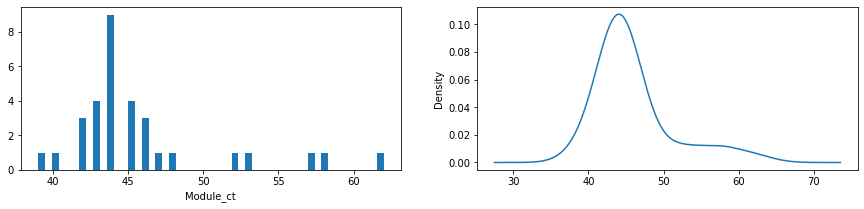

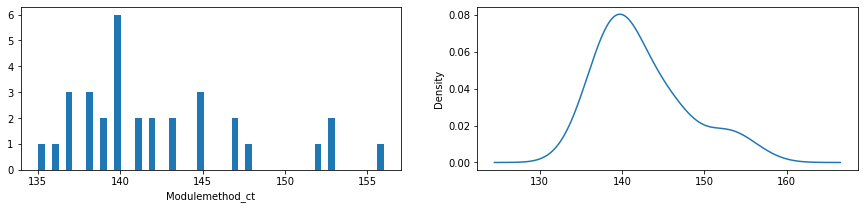

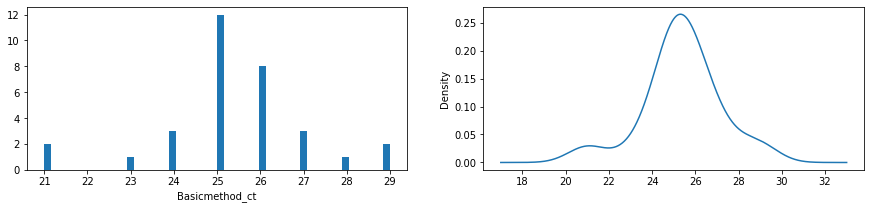

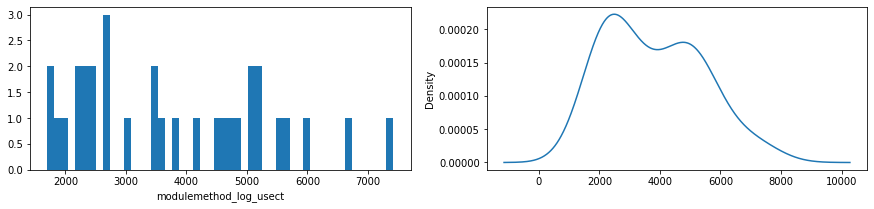

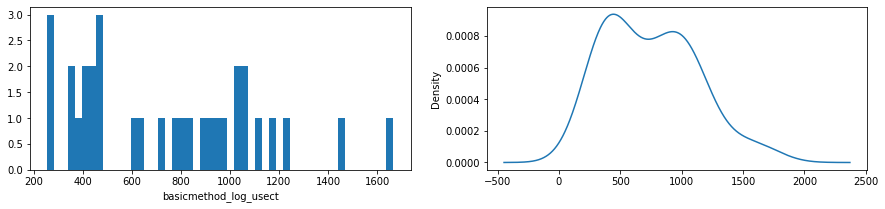

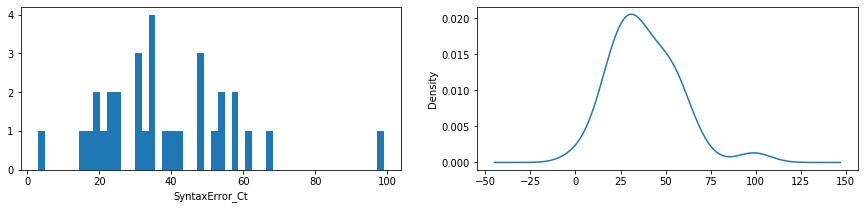

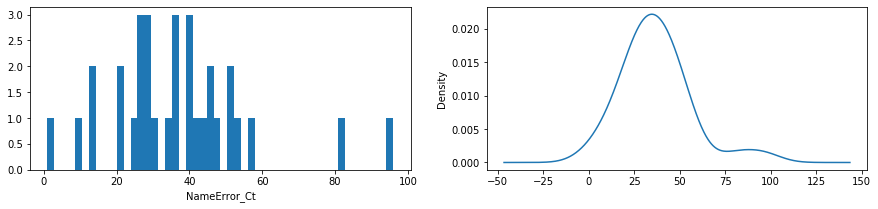

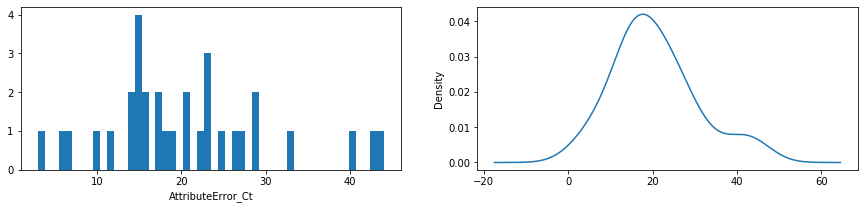

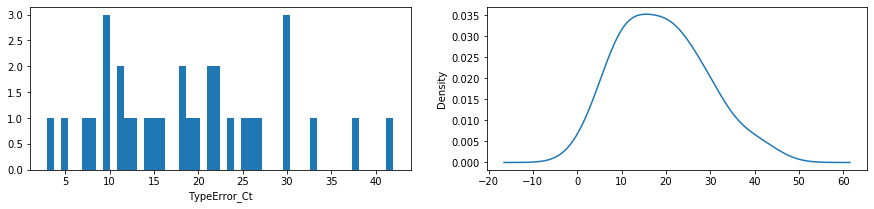

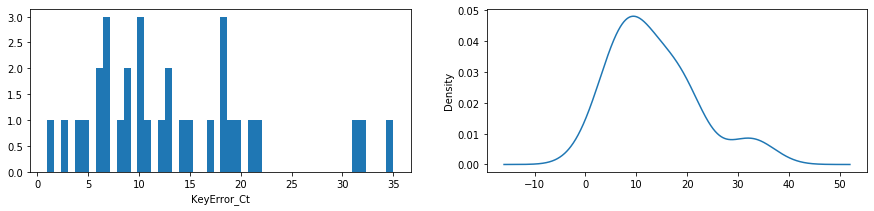

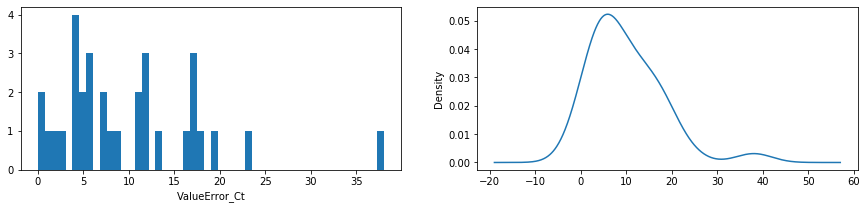

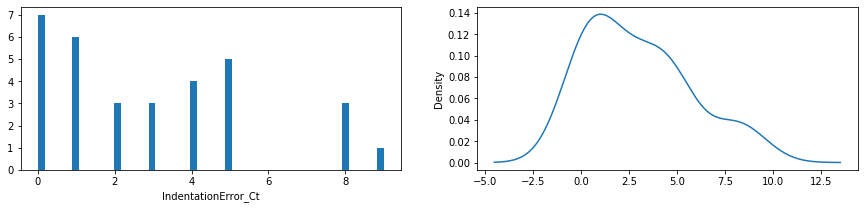

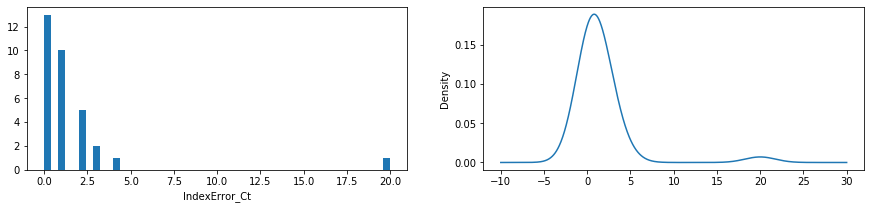

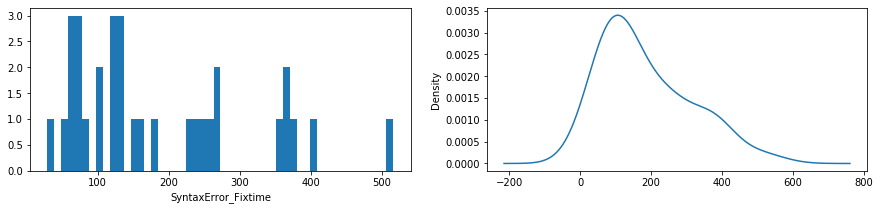

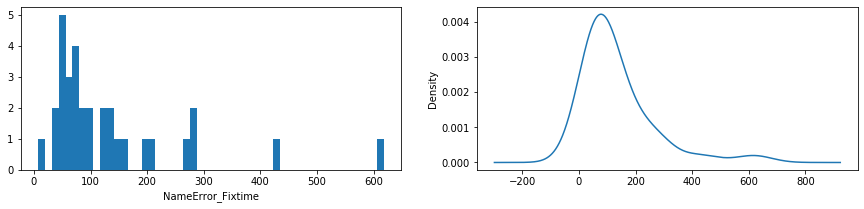

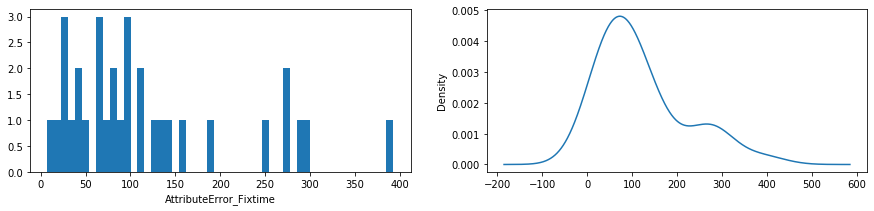

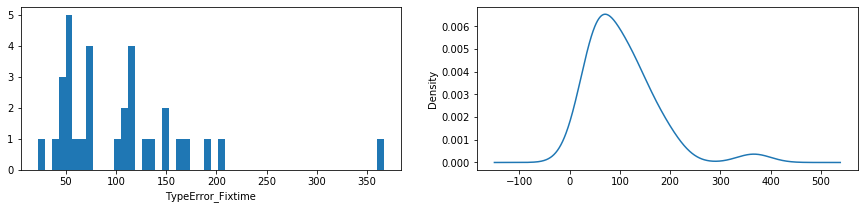

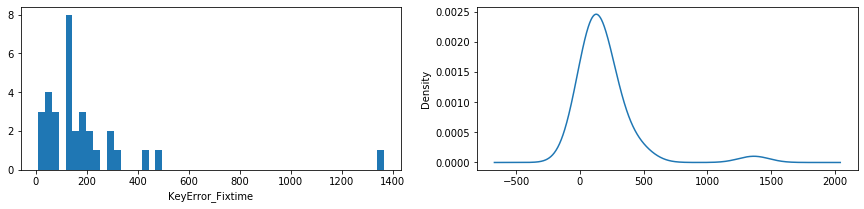

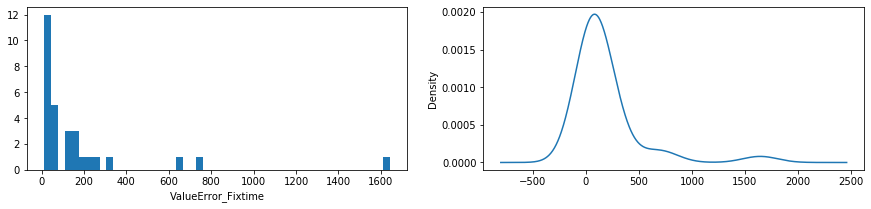

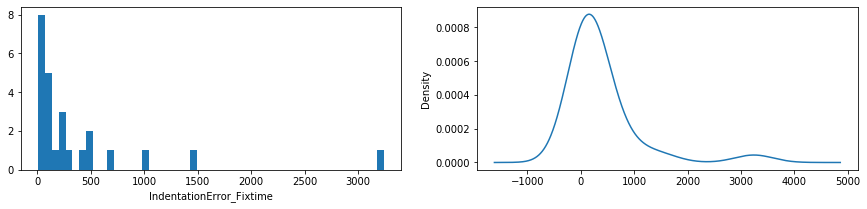

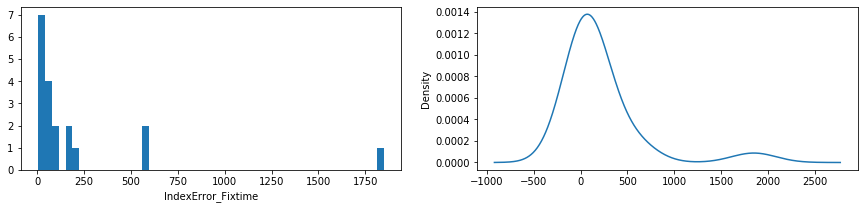

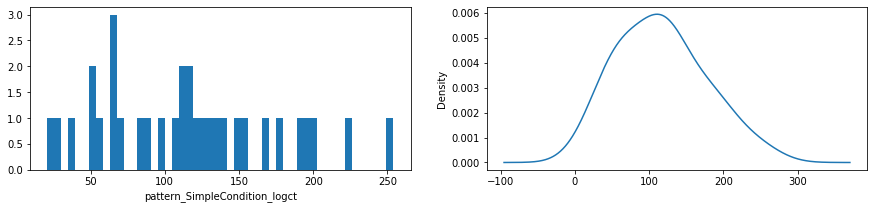

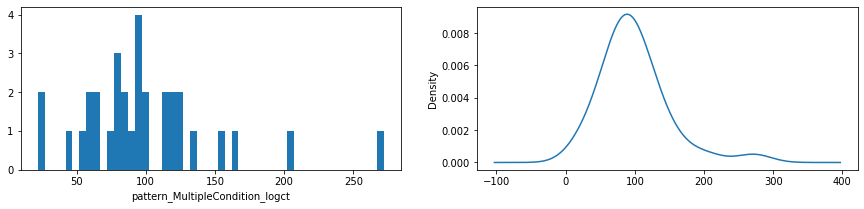

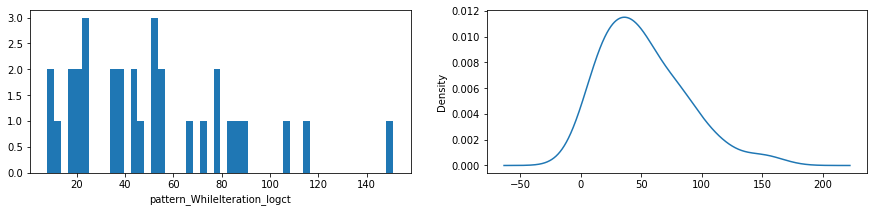

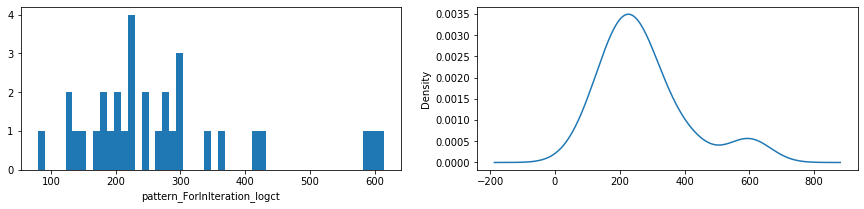

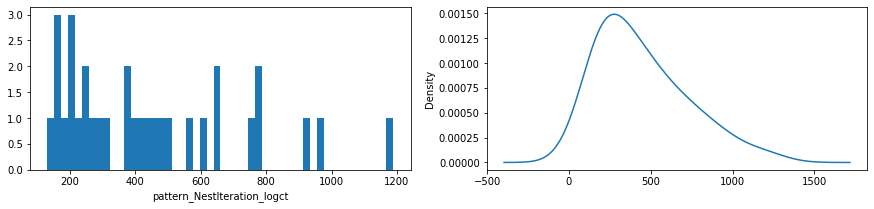

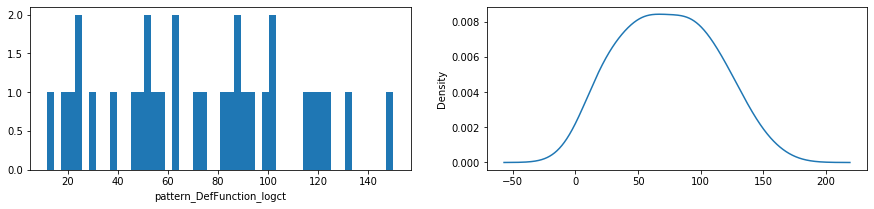

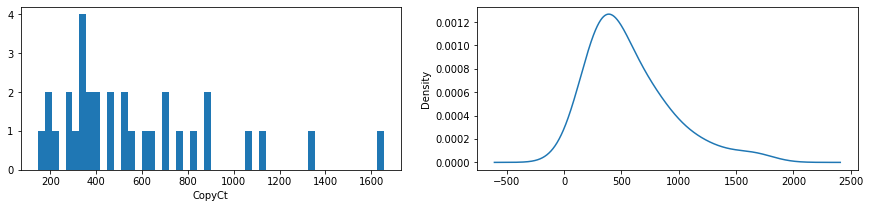

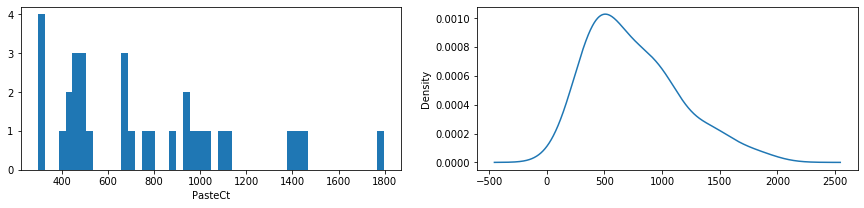

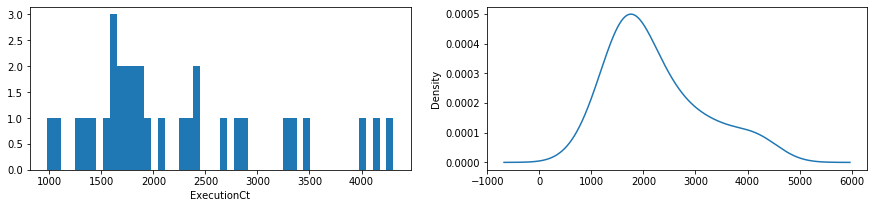

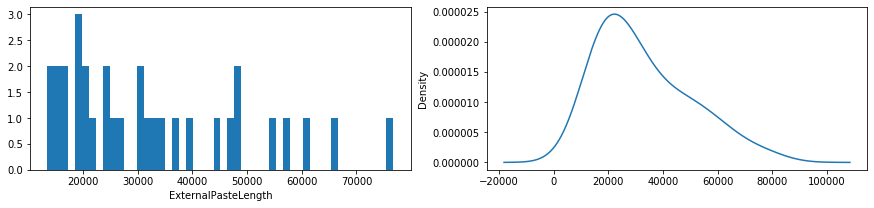

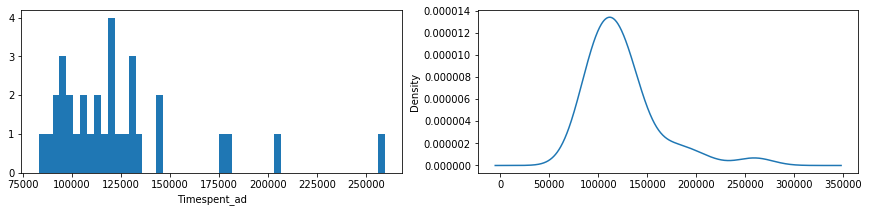

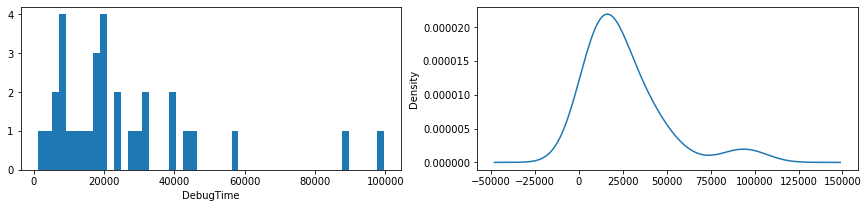

In [10]:
#.hist(x, bins=None, range=None, density=False, 
#         weights=None, cumulative=False, bottom=None, 
#         histtype='bar', align='mid', orientation='vertical', 
#         rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

cls=list(df_log_features.columns)
#cls.remove("IndexError_FailfixCt")
for cl in cls:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    plt.hist(list(df_log_features[cl]), bins=50)
    plt.xlabel(cl)
    plt.subplot(122)
    df_log_features[cl].plot.kde()
    #plt.xlabel(cl)
    plt.show()

In [10]:
#df_st
# scaler = StandardScaler()
# scaler.fit(df_values)
# df_st=scaler.transform(df_values)
# df_st=pd.DataFrame(data=df_st, columns=df_values.columns, index=df_name["Username"])

#df_minmax
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
df_log_minmax=minmax.fit_transform(df_log_features)
df_log_minmax=pd.DataFrame(data=df_log_minmax, columns=df_log_features.columns, index=df_log_features.index)

In [11]:
df_log_minmax.head()

Module_ct  Modulemethod_ct  Basicmethod_ct  modulemethod_log_usect  \
Username                                                                        
108385601   0.217391         0.809524           0.625                0.100105   
108524010   0.173913         0.000000           0.500                0.000000   
108524012   0.304348         0.190476           0.625                0.614631   
108524013   0.304348         0.095238           0.500                0.377494   
108582604   0.217391         0.238095           0.875                0.314141   

           basicmethod_log_usect  SyntaxError_Ct  NameError_Ct  \
Username                                                         
108385601               0.091554        0.333333      0.315789   
108524010               0.016324        0.208333      0.136842   
108524012               0.491838        0.531250      0.536842   
108524013               0.411639        0.166667      0.294737   
108582604               0.361249        0.145833      0.094737   

           AttributeError_Ct  TypeError_Ct  KeyError_Ct  ValueError_Ct  \
Username                                                                 
108385601           0.292683      0.333333     0.176471       0.131579   
108524010           0.097561      0.205128     0.294118       0.105263   
108524012           0.536585      0.615385     0.882353       0.447368   
108524013           0.268293      0.256410     0.205882       0.315789   
108582604           0.317073      0.282051     0.176471       0.184211   

           IndentationError_Ct  IndexError_Ct  SyntaxError_Fixtime  \
Username                                                             
108385601             0.333333           0.05             0.468723   
108524010             0.555556           0.00             0.213582   
108524012             0.111111           0.05             0.716836   
108524013             0.111111           0.00             0.484485   
108582604             0.111111           0.05             0.000000   

           NameError_Fixtime  AttributeError_Fixtime  TypeError_Fixtime  \
Username                                                                  
108385601           0.440671                0.090454           0.000000   
108524010           0.062661                0.027204           0.077446   
108524012           0.235742                0.261892           1.000000   
108524013           0.048574                0.147954           0.089531   
108582604           0.077087                0.175335           0.081125   

           KeyError_Fixtime  ValueError_Fixtime  IndentationError_Fixtime  \
Username                                                                    
108385601          0.086118            0.089688                  0.030289   
108524010          0.031823            0.021924                  0.128635   
108524012          0.080708            0.009007                  0.000000   
108524013          0.348577            0.023150                  0.140009   
108582604          0.037690            0.032568                  0.074486   

           IndexError_Fixtime  pattern_SimpleCondition_logct  \
Username                                                       
108385601            0.008938                       0.137339   
108524010                 NaN                       0.407725   
108524012            0.002438                       0.725322   
108524013                 NaN                       0.021459   
108582604            0.006771                       0.270386   

           pattern_MultipleCondition_logct  pattern_WhileIteration_logct  \
Username                                                                   
108385601                            0.244                      0.083916   
108524010                            0.084                      0.573427   
108524012                            0.364                      0.489510   
108524013                            0.292                      0.083916   

In [13]:
desc_dfminmax=pd.DataFrame()
for cl in df_log_minmax.columns:
    x=list(map(lambda x: round(x, 3), df_log_minmax[cl].describe()))
    x=pd.Series(x, index=list(df_log_minmax[cl].describe().index))
    x1=pd.DataFrame({cl:x}).T
    desc_dfminmax=pd.concat([desc_dfminmax, x1], axis=0)
desc_dfminmax["var"]=desc_dfminmax["std"]**2
desc_dfminmax["var_perc"]=round(desc_dfminmax["var"]/sum(desc_dfminmax["var"]), 3)
desc_dfminmax=desc_dfminmax[["count","min","max","mean","std","var","var_perc","25%","50%","75%"]]

In [14]:
desc_dfminmax.shape

(33, 10)

In [15]:
desc_dfminmax.sort_values("var_perc", ascending=False)

count  min  max   mean    std       var  \
IndentationError_Ct               32.0  0.0  1.0  0.330  0.299  0.089401   
modulemethod_log_usect            32.0  0.0  1.0  0.366  0.276  0.076176   
ExternalPasteLength               32.0  0.0  1.0  0.307  0.267  0.071289   
ExecutionCt                       32.0  0.0  1.0  0.372  0.267  0.071289   
pattern_DefFunction_logct         32.0  0.0  1.0  0.444  0.268  0.071824   
basicmethod_log_usect             32.0  0.0  1.0  0.347  0.261  0.068121   
Modulemethod_ct                   32.0  0.0  1.0  0.353  0.257  0.066049   
PasteCt                           32.0  0.0  1.0  0.306  0.257  0.066049   
pattern_NestIteration_logct       32.0  0.0  1.0  0.299  0.258  0.066564   
SyntaxError_Fixtime               32.0  0.0  1.0  0.320  0.258  0.066564   
AttributeError_Fixtime            32.0  0.0  1.0  0.292  0.252  0.063504   
pattern_SimpleCondition_logct     32.0  0.0  1.0  0.408  0.253  0.064009   
pattern_ForInIteration_logct      32.0  0.0  1.0  0.360  0.249  0.062001   
KeyError_Ct                       32.0  0.0  1.0  0.367  0.246  0.060516   
TypeError_Ct                      32.0  0.0  1.0  0.413  0.247  0.061009   
pattern_WhileIteration_logct      32.0  0.0  1.0  0.307  0.238  0.056644   
AttributeError_Ct                 32.0  0.0  1.0  0.428  0.240  0.057600   
CopyCt                            32.0  0.0  1.0  0.281  0.234  0.054756   
IndexError_Fixtime                19.0  0.0  1.0  0.113  0.233  0.054289   
DebugTime                         32.0  0.0  1.0  0.247  0.228  0.051984   
Module_ct                         32.0  0.0  1.0  0.299  0.224  0.050176   
Basicmethod_ct                    32.0  0.0  1.0  0.547  0.219  0.047961   
IndentationError_Fixtime          25.0  0.0  1.0  0.118  0.213  0.045369   
NameError_Fixtime                 32.0  0.0  1.0  0.207  0.209  0.043681   
ValueError_Ct                     32.0  0.0  1.0  0.261  0.209  0.043681   
Timespent_ad                      32.0  0.0  1.0  0.233  0.209  0.043681   
pattern_MultipleCondition_logct   32.0  0.0  1.0  0.308  0.199  0.039601   
ValueError_Fixtime                30.0  0.0  1.0  0.104  0.199  0.039601   
NameError_Ct                      32.0  0.0  1.0  0.376  0.200  0.040000   
SyntaxError_Ct                    32.0  0.0  1.0  0.369  0.196  0.038416   
TypeError_Fixtime                 32.0  0.0  1.0  0.236  0.197  0.038809   
KeyError_Fixtime                  32.0  0.0  1.0  0.137  0.178  0.031684   
IndexError_Ct                     32.0  0.0  1.0  0.078  0.176  0.030976   

                                 var_perc    25%    50%    75%  
IndentationError_Ct                 0.049  0.111  0.278  0.556  
modulemethod_log_usect              0.042  0.119  0.323  0.584  
ExternalPasteLength                 0.039  0.092  0.242  0.494  
ExecutionCt                         0.039  0.196  0.266  0.513  
pattern_DefFunction_logct           0.039  0.263  0.435  0.636  
basicmethod_log_usect               0.037  0.122  0.346  0.544  
Modulemethod_ct                     0.036  0.179  0.262  0.476  
PasteCt                             0.036  0.111  0.253  0.457  
pattern_NestIteration_logct         0.036  0.081  0.240  0.452  
SyntaxError_Fixtime                 0.036  0.097  0.209  0.473  
AttributeError_Fixtime              0.035  0.107  0.216  0.361  
pattern_SimpleCondition_logct       0.035  0.190  0.403  0.563  
pattern_ForInIteration_logct        0.034  0.206  0.290  0.410  
KeyError_Ct                         0.033  0.176  0.309  0.500  
TypeError_Ct                        0.033  0.205  0.397  0.571  
pattern_WhileIteration_logct        0.031  0.110  0.262  0.463  
AttributeError_Ct                   0.031  0.293  0.378  0.543  
CopyCt                              0.030  0.123  0.210  0.386  
IndexError_Fixtime                  0.030  0.008  0.036  0.089  
DebugTime                           0.028  0.090  0.184  0.313  
Module_ct                           0.027  0.174  0.217  0.304  
Basicmethod_ct    

## week

In [16]:
week_log=pd.read_excel("member_weeklog_trainingdata.xlsx")
if  "Unnamed: 0" in week_log.columns:
    week_log=week_log.drop("Unnamed: 0", axis=1)
#week_log=week_log.set_index("Username")

In [17]:
#list(week_log.columns)
week_log_text=week_log[[
 'Username', 'WeekNumber',  'Codemix', 'Module', 'modulemethod_log_use', 'basicmethod_log_use']]

week_log=week_log[[
 'Username', 'WeekNumber',
 'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
 'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime',
 'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime', 
#  'SyntaxError_FailfixCt', 'NameError_FailfixCt', 'AttributeError_FailfixCt', 'TypeError_FailfixCt',
#  'KeyError_FailfixCt', 'ValueError_FailfixCt', 'IndentationError_FailfixCt', 'IndexError_FailfixCt',
 'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct', 
 'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',    
 'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
 'Module_ct', 
 'modulemethod_ct', 'modulemethod_log_usect', 
 'basicmethod_ct', 'basicmethod_log_usect',
 'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct',
 'Timespent_ad', 'DebugTime']]

In [18]:
desc_df=pd.DataFrame()
cls=list(week_log.columns)
cls.remove("Username")
cls.remove("WeekNumber")
for cl in cls:
    x=list(map(lambda x: round(x, 2), week_log[cl].describe()))
    x=pd.Series(x, index=list(week_log[cl].describe().index))
    x1=pd.DataFrame({cl:x}).T
    desc_df=pd.concat([desc_df, x1], axis=0)
desc_df["var"]=desc_df["std"]**2
desc_df["var_perc"]=round(desc_df["var"]/sum(desc_df["var"]), 3)
desc_df=desc_df[["count","min","max","mean","std","var","var_perc","25%","50%","75%"]]
desc_df

count  min       max     mean      std  \
SyntaxError_Ct                   480.0  0.0     27.00     2.56     3.90   
NameError_Ct                     480.0  0.0     60.00     2.45     4.05   
AttributeError_Ct                480.0  0.0     17.00     1.37     2.24   
TypeError_Ct                     480.0  0.0     22.00     1.27     2.25   
KeyError_Ct                      480.0  0.0     22.00     0.90     2.33   
ValueError_Ct                    480.0  0.0     35.00     0.66     2.06   
IndentationError_Ct              480.0  0.0      5.00     0.20     0.65   
IndexError_Ct                    480.0  0.0     19.00     0.10     0.91   
SyntaxError_Fixtime              277.0  2.0   4243.00   145.26   334.33   
NameError_Fixtime                305.0  2.0   4408.00   117.59   334.43   
AttributeError_Fixtime           218.0  2.0   4930.00   118.21   359.28   
TypeError_Fixtime                215.0  3.0   2416.67    96.13   196.50   
KeyError_Fixtime                 134.0  2.0   7200.00   222.52   710.61   
ValueError_Fixtime               131.0  3.0   7200.00   180.21   652.34   
IndentationError_Fixtime          52.0  4.0   7200.00   366.65  1102.11   
IndexError_Fixtime                28.0  2.0   7200.00   373.64  1356.59   
pattern_SimpleCondition_logct    427.0  0.0    203.00     8.70    26.73   
pattern_MultipleCondition_logct  427.0  0.0    217.00     7.41    21.07   
pattern_WhileIteration_logct     427.0  0.0    134.00     3.89    13.63   
pattern_ForInIteration_logct     427.0  0.0    386.00    20.42    36.52   
pattern_NestIteration_logct      427.0  0.0   1032.00    33.54   100.46   
pattern_DefFunction_logct        427.0  0.0    123.00     5.49    16.31   
CopyCt                           427.0  0.0    606.00    42.73    66.88   
PasteCt                          427.0  0.0    758.00    56.49    77.44   
ExecutionCt                      427.0  0.0   2241.00   166.30   198.90   
ExternalPasteLength              427.0  0.0  57704.00  2466.91  4473.02   
Module_ct                        427.0  0.0     31.00     6.00     6.66   
modulemethod_ct                  427.0  0.0     95.00    26.83    19.29   
modulemethod_log_usect           427.0  0.0   2727.00   284.38   399.45   
basicmethod_ct                   427.0  0.0     23.00     4.50     4.66   
basicmethod_log_usect            427.0  0.0   1199.00    55.91    98.24   
Grand_Module_ct                  480.0  0.0     62.00    13.56    15.46   
Grand_modulemethod_ct            480.0  0.0    156.00    73.40    52.70   
Grand_basicmethod_ct             480.0  0.0     29.00    17.94     9.25   
Timespent_ad                     427.0  6.0  94251.00  9305.32  7978.73   
DebugTime                        382.0  3.0  52512.00  2139.45  4862.67   

                                          var  var_perc      25%      50%  \
SyntaxError_Ct                   1.521000e+01     0.000     0.00     1.00   
NameError_Ct                     1.640250e+01     0.000     0.00     1.00   
AttributeError_Ct                5.017600e+00     0.000     0.00     0.00   
TypeError_Ct                     5.062500e+00     0.000     0.00     0.00   
KeyError_Ct                      5.428900e+00     0.000     0.00     0.00   
ValueError_Ct                    4.243600e+00     0.000     0.00     0.00   
IndentationError_Ct              4.225000e-01     0.000     0.00     0.00   
IndexError_Ct                    8.281000e-01     0.000     0.00     0.00   
SyntaxError_Fixtime              1.117765e+05     0.001    18.00    42.00   
NameError_Fixtime                1.118434e+05     0.001    13.25    28.33   
AttributeError_Fixtime           1.290821e+05     0.001    16.00    39.00   
TypeError_Fixtime                3.861225e+04     0.000    17.00    43.00   
KeyError_Fixtime                 5.049666e+05     0.005    19.54    56.21   
ValueError_Fixtime               4.255475e+05     0.004    17.50    49.00   
IndentationError_Fixtime         1.214646e+06     0.011    23.12    64.00   
IndexError_Fixtime       

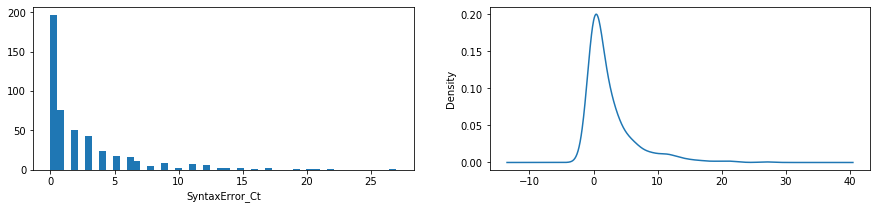

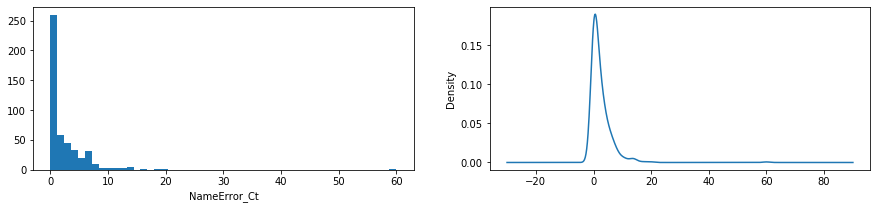

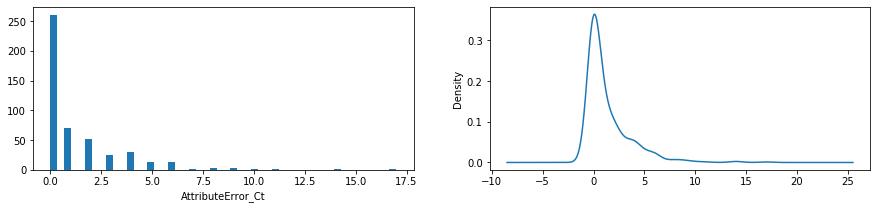

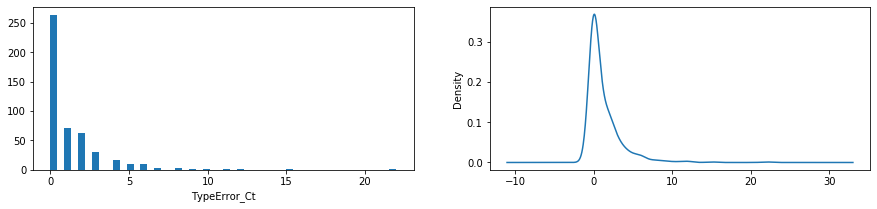

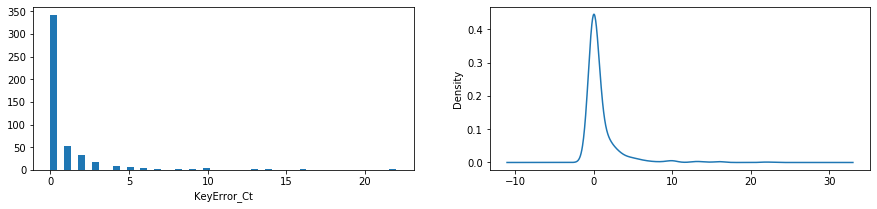

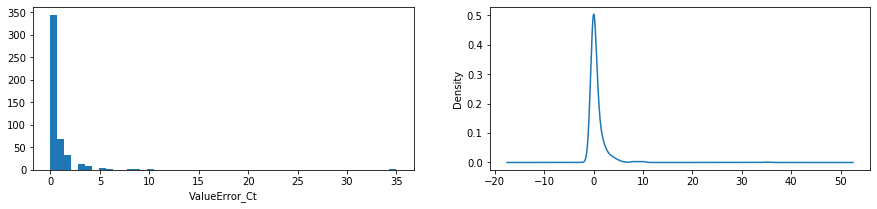

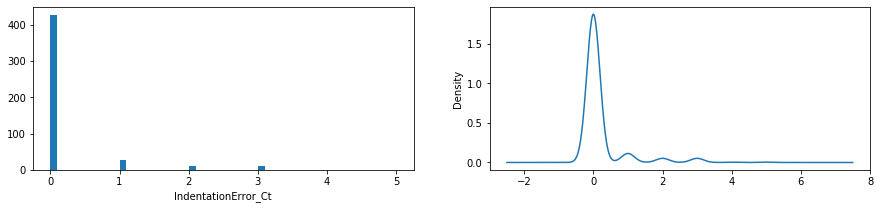

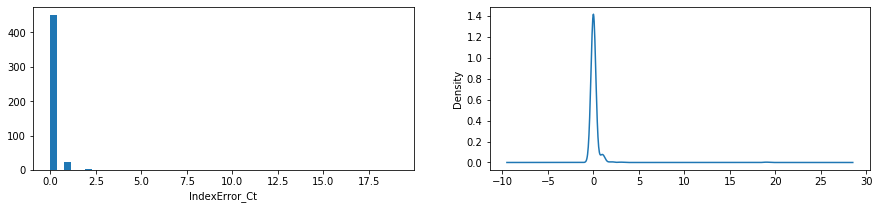

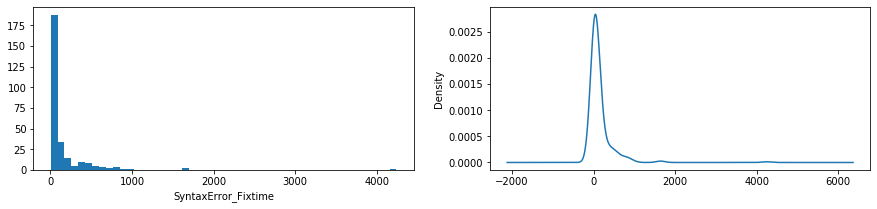

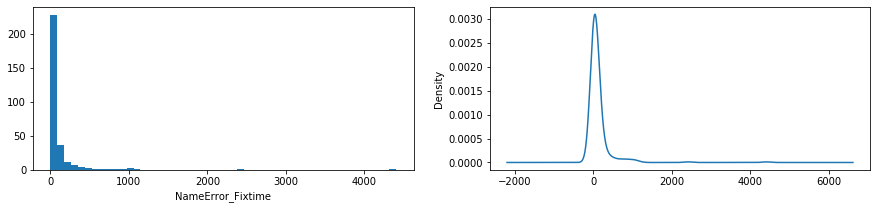

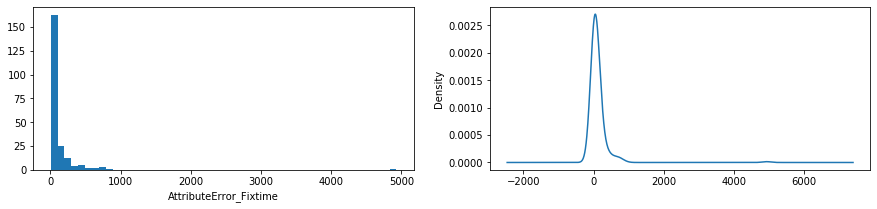

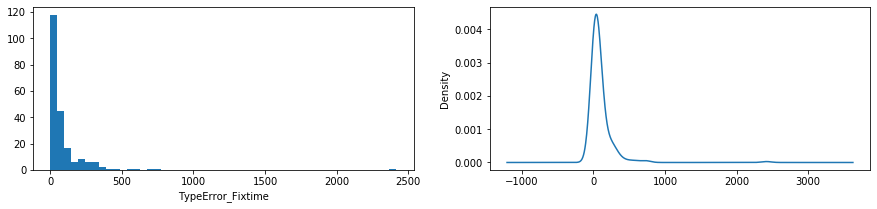

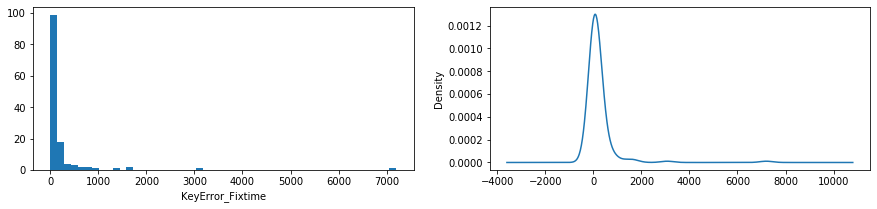

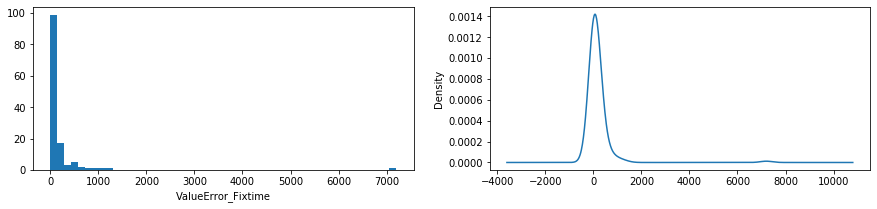

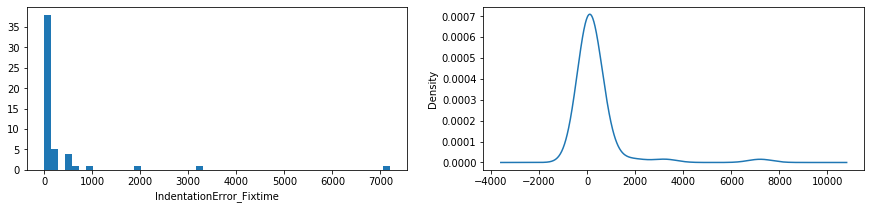

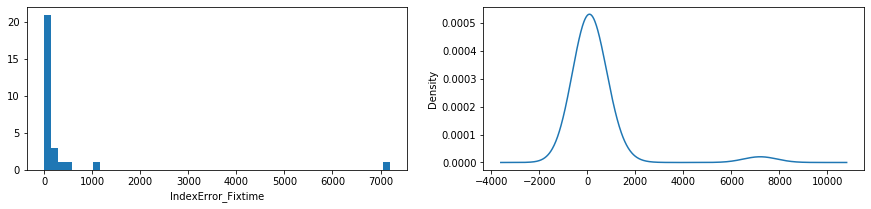

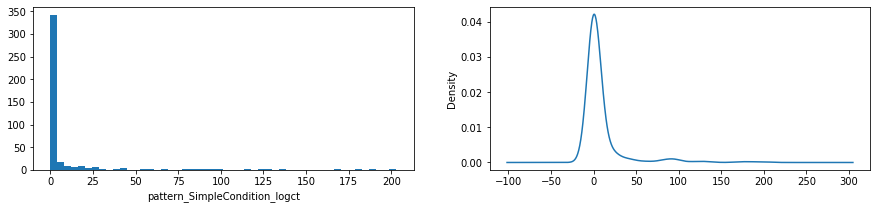

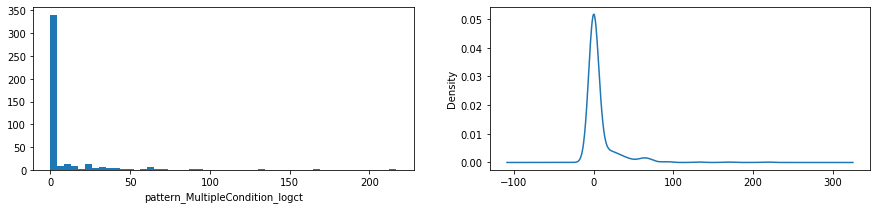

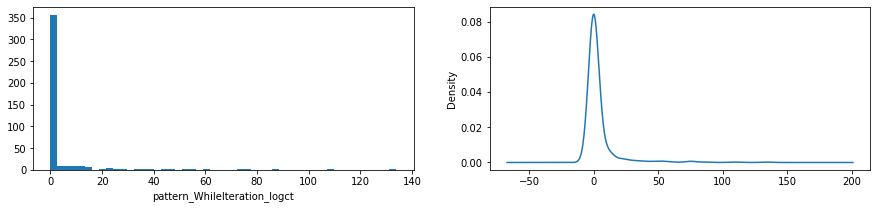

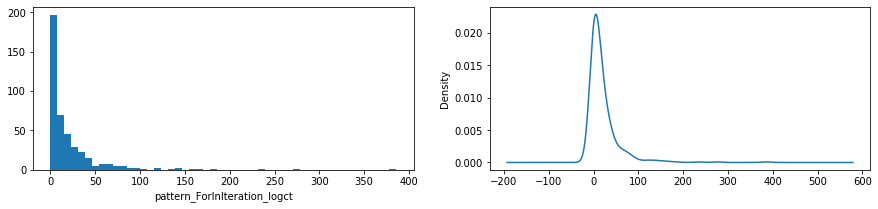

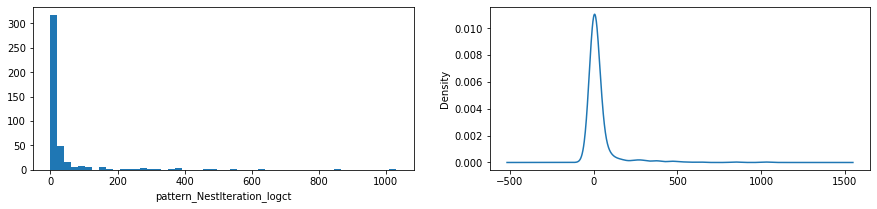

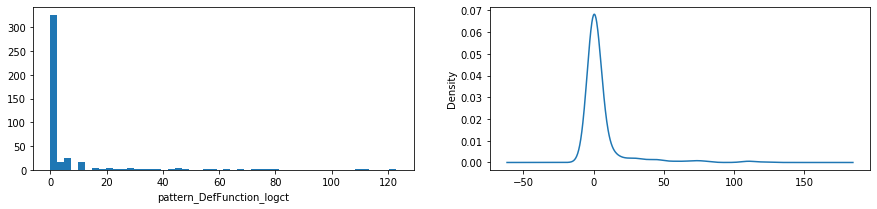

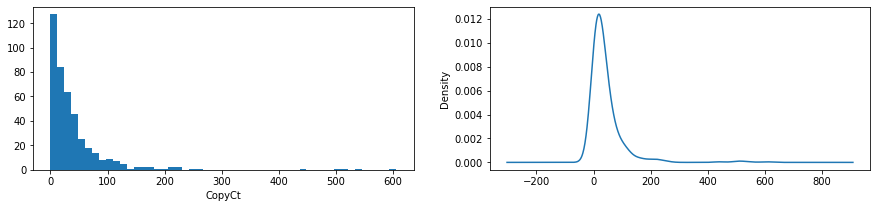

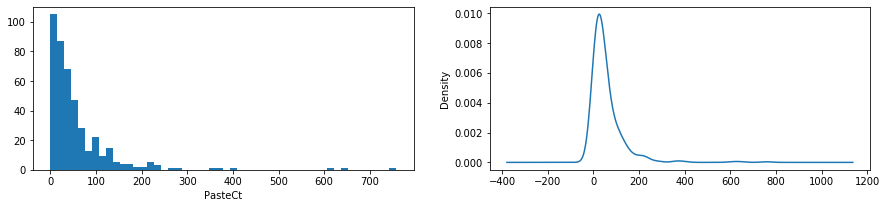

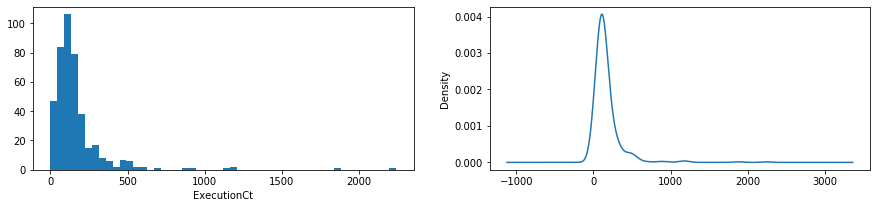

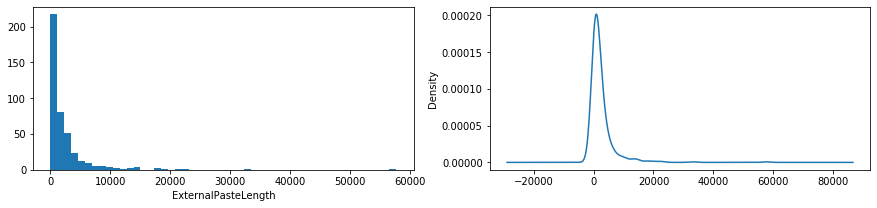

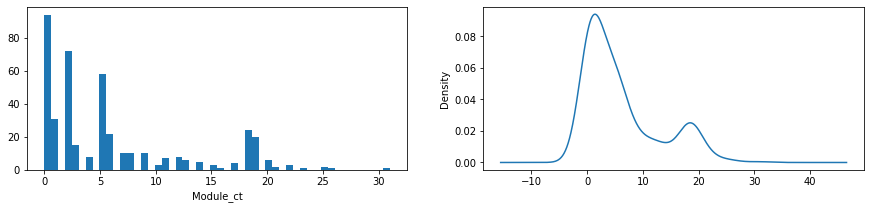

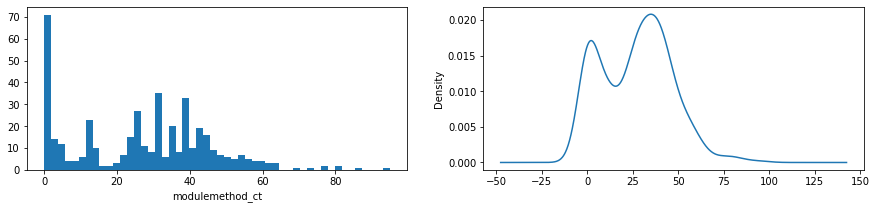

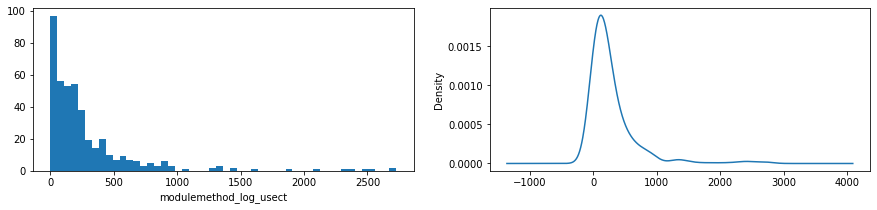

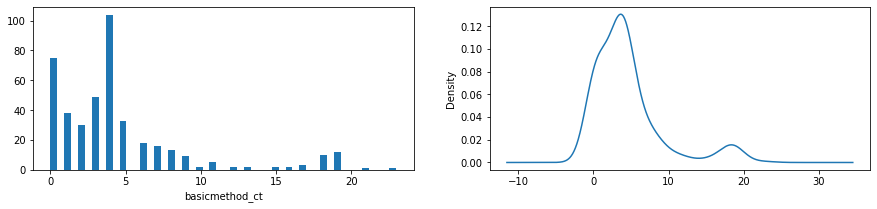

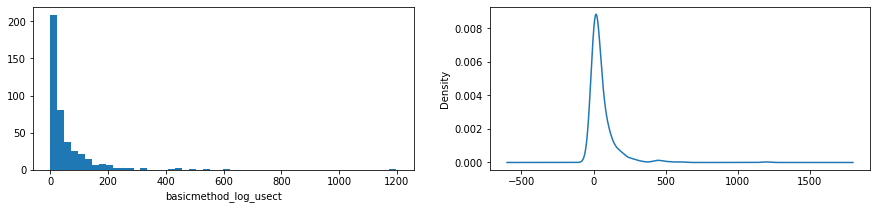

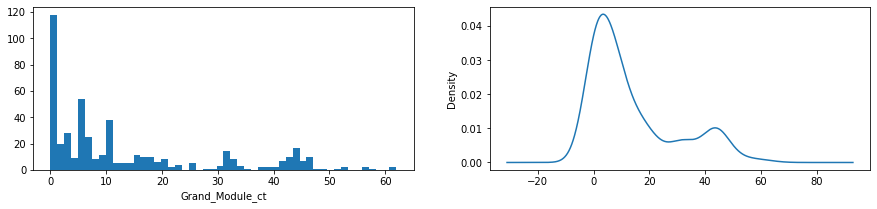

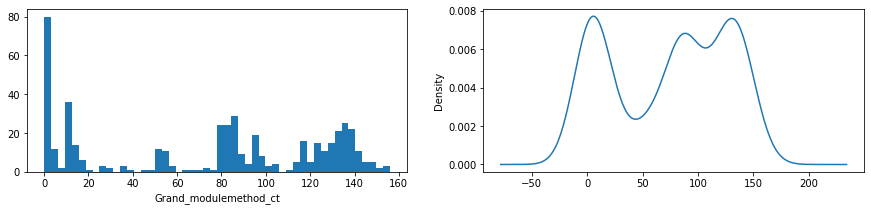

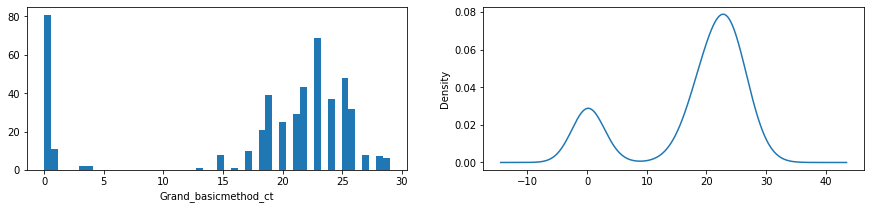

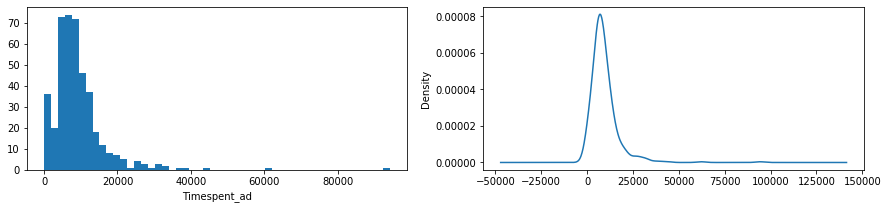

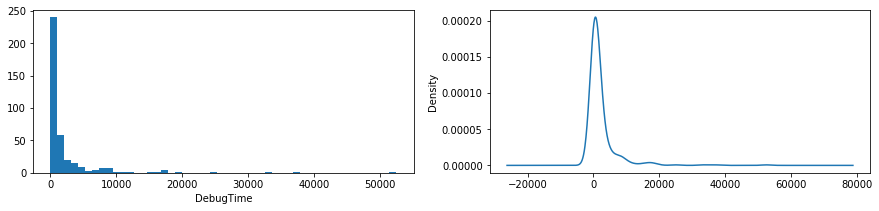

In [19]:
#.hist(x, bins=None, range=None, density=False, 
#         weights=None, cumulative=False, bottom=None, 
#         histtype='bar', align='mid', orientation='vertical', 
#         rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)

cls=list(week_log.columns)[2:]
#cls.remove("IndexError_FailfixCt")
for cl in cls:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    plt.hist(list(week_log[cl]), bins=50)
    #df_log_values[cl].plot.kde()
    plt.xlabel(cl)
    plt.subplot(122)
    week_log[cl].plot.kde()
    plt.show()

In [20]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))

week_log_values=week_log[list(week_log.columns)[2:]]
week_log_minmax=minmax.fit_transform(week_log_values)
week_log_minmax=pd.DataFrame(data=week_log_minmax, columns=list(week_log.columns)[2:])
week_log_minmax["Username"]=week_log["Username"]
week_log_minmax["WeekNumber"]=week_log["WeekNumber"]
week_log_minmax.head()

SyntaxError_Ct  NameError_Ct  AttributeError_Ct  TypeError_Ct  KeyError_Ct  \
0        0.000000      0.000000           0.000000      0.000000          0.0   
1        0.000000      0.000000           0.000000      0.000000          0.0   
2        0.444444      0.016667           0.058824      0.090909          0.0   
3        0.222222      0.066667           0.058824      0.090909          0.0   
4        0.111111      0.033333           0.000000      0.000000          0.0   

   ValueError_Ct  IndentationError_Ct  IndexError_Ct  SyntaxError_Fixtime  \
0            0.0                  0.0       0.000000                  NaN   
1            0.0                  0.0       0.000000                  NaN   
2            0.0                  0.4       0.000000             0.045312   
3            0.0                  0.0       0.052632             0.197791   
4            0.0                  0.0       0.000000             0.015091   

   NameError_Fixtime  AttributeError_Fixtime  TypeError_Fixtime  \
0                NaN                     NaN                NaN   
1                NaN                     NaN                NaN   
2           0.002724                0.009334           0.000000   
3           0.127724                0.000812           0.014086   
4           0.017930                     NaN                NaN   

   KeyError_Fixtime  ValueError_Fixtime  IndentationError_Fixtime  \
0               NaN                 NaN                       NaN   
1               NaN                 NaN                       NaN   
2               NaN                 NaN                  0.017927   
3               NaN                 NaN                       NaN   
4               NaN                 NaN                       NaN   

   IndexError_Fixtime  pattern_SimpleCondition_logct  \
0                 NaN                       0.000000   
1                 NaN                            NaN   
2                 NaN                       0.123153   
3            0.002362                       0.000000   
4                 NaN                       0.128079   

   pattern_MultipleCondition_logct  pattern_WhileIteration_logct  \
0                         0.000000                      0.000000   
1                              NaN                           NaN   
2                         0.184332                      0.022388   
3                         0.000000                      0.000000   
4                         0.198157                      0.074627   

   pattern_ForInIteration_logct  pattern_NestIteration_logct  \
0                      0.005181                     0.000000   
1                           NaN                          NaN   
2                      0.041451                     0.011628   
3                      0.603627                     0.109496   
4                      0.028497                     0.061047   

   pattern_DefFunction_logct    CopyCt   PasteCt  ExecutionCt  \
0                   0.000000  0.000000  0.000000     0.004016   
1                        NaN       NaN       NaN          NaN   
2                   0.000000  0.049505  0.064644     0.090585   
3                   0.000000  0.069307  0.080475     0.099955   
4                   0.138211  0.019802  0.043536     0.052655   

   ExternalPasteLength  Module_ct  modulemethod_ct  modulemethod_log_usect  \
0             0.000000   0.000000         0.000000                0.000000   
1                  NaN        NaN              NaN                     NaN   
2             0.037051   0.000000         0.000000                0.000000   
3             0.041522   0.000000         0.115789                0.020169   
4             0.338122   0.290323         0.200000                0.009901   

   basicmethod_ct  basicmethod_log_usect  Grand_Module_ct  \
0        0.000000               0.000000         0.000000   
1             NaN                    NaN         0.000000   
2        0.000000               0.000000         0.000000   


In [21]:
desc_dfminmax=pd.DataFrame()
cls=list(week_log.columns)
cls.remove("Username")
cls.remove("WeekNumber")
for cl in cls:
    x=list(map(lambda x: round(x, 2), week_log[cl].describe()))
    x=pd.Series(x, index=list(week_log[cl].describe().index))
    x1=pd.DataFrame({cl:x}).T
    desc_dfminmax=pd.concat([desc_dfminmax, x1], axis=0)

desc_dfminmax["var"]=desc_dfminmax["std"]**2
desc_dfminmax["var_perc"]=round(desc_dfminmax["var"]/sum(desc_dfminmax["var"]), 3)
desc_dfminmax=desc_dfminmax[["count","min","max","mean","std","var","var_perc","25%","50%","75%"]]

In [22]:
desc_dfminmax.sort_values("var_perc", ascending=False)

count  min       max     mean      std  \
Timespent_ad                     427.0  6.0  94251.00  9305.32  7978.73   
DebugTime                        382.0  3.0  52512.00  2139.45  4862.67   
ExternalPasteLength              427.0  0.0  57704.00  2466.91  4473.02   
IndexError_Fixtime                28.0  2.0   7200.00   373.64  1356.59   
IndentationError_Fixtime          52.0  4.0   7200.00   366.65  1102.11   
KeyError_Fixtime                 134.0  2.0   7200.00   222.52   710.61   
ValueError_Fixtime               131.0  3.0   7200.00   180.21   652.34   
NameError_Fixtime                305.0  2.0   4408.00   117.59   334.43   
modulemethod_log_usect           427.0  0.0   2727.00   284.38   399.45   
AttributeError_Fixtime           218.0  2.0   4930.00   118.21   359.28   
SyntaxError_Fixtime              277.0  2.0   4243.00   145.26   334.33   
CopyCt                           427.0  0.0    606.00    42.73    66.88   
basicmethod_ct                   427.0  0.0     23.00     4.50     4.66   
basicmethod_log_usect            427.0  0.0   1199.00    55.91    98.24   
Grand_Module_ct                  480.0  0.0     62.00    13.56    15.46   
Grand_modulemethod_ct            480.0  0.0    156.00    73.40    52.70   
modulemethod_ct                  427.0  0.0     95.00    26.83    19.29   
Module_ct                        427.0  0.0     31.00     6.00     6.66   
Grand_basicmethod_ct             480.0  0.0     29.00    17.94     9.25   
ExecutionCt                      427.0  0.0   2241.00   166.30   198.90   
PasteCt                          427.0  0.0    758.00    56.49    77.44   
SyntaxError_Ct                   480.0  0.0     27.00     2.56     3.90   
pattern_DefFunction_logct        427.0  0.0    123.00     5.49    16.31   
pattern_NestIteration_logct      427.0  0.0   1032.00    33.54   100.46   
pattern_ForInIteration_logct     427.0  0.0    386.00    20.42    36.52   
NameError_Ct                     480.0  0.0     60.00     2.45     4.05   
pattern_MultipleCondition_logct  427.0  0.0    217.00     7.41    21.07   
pattern_SimpleCondition_logct    427.0  0.0    203.00     8.70    26.73   
TypeError_Fixtime                215.0  3.0   2416.67    96.13   196.50   
IndexError_Ct                    480.0  0.0     19.00     0.10     0.91   
IndentationError_Ct              480.0  0.0      5.00     0.20     0.65   
ValueError_Ct                    480.0  0.0     35.00     0.66     2.06   
KeyError_Ct                      480.0  0.0     22.00     0.90     2.33   
TypeError_Ct                     480.0  0.0     22.00     1.27     2.25   
AttributeError_Ct                480.0  0.0     17.00     1.37     2.24   
pattern_WhileIteration_logct     427.0  0.0    134.00     3.89    13.63   

                                          var  var_perc      25%      50%  \
Timespent_ad                     6.366013e+07     0.569  5067.00  7690.00   
DebugTime                        2.364556e+07     0.211   173.25   599.50   
ExternalPasteLength              2.000791e+07     0.179   424.00  1102.00   
IndexError_Fixtime               1.840336e+06     0.016    14.00    47.00   
IndentationError_Fixtime         1.214646e+06     0.011    23.12    64.00   
KeyError_Fixtime                 5.049666e+05     0.005    19.54    56.21   
ValueError_Fixtime               4.255475e+05     0.004    17.50    49.00   
NameError_Fixtime                1.118434e+05     0.001    13.25    28.33   
modulemethod_log_usect           1.595603e+05     0.001    59.50   169.00   
AttributeError_Fixtime           1.290821e+05     0.001    16.00    39.00   
SyntaxError_Fixtime              1.117765e+05     0.001    18.00    42.00   
CopyCt                           4.472934e+03     0.000    10.50    25.00   
basicmethod_ct                   2.171560e+01     0.000     1.00     4.00   
basicmethod_log_usect            9.651098e+03     0.000     7.00    25.00   
Grand_Module_ct                  2.390116e+02     0.000     2.00     7.00   
Grand_modulemethod_ct    

In [23]:
# for cl in cls:
#     if len(dtth_nb[pd.isnull(dtth_nb[cl])])!=0:
#         dtth_nb[cl]=dtth_nb[cl].fillna(np.nanmean(dtth_nb[cl]))
#     if len(set(dtth_nb[cl]))==1:
#         dtth_nb=dtth_nb.drop(cl, axis=1)
#         print("Drop: " + cl)

## score&group

In [6]:
#開啟檔案
df_scorengroup=pd.read_excel("member_score_group.xlsx")
if  "Unnamed: 0" in df_scorengroup.columns:
    df_scorengroup=df_scorengroup.drop("Unnamed: 0", axis=1)

In [7]:
df_scorengroup[["final","python_ability","13w_advance"]].describe()

final  python_ability  13w_advance
count  32.000000       32.000000    32.000000
mean   75.678125       53.851562    -0.156250
std     8.184475       14.435879     1.568014
min    62.800000       30.000000    -3.000000
25%    69.175000       42.437500    -1.000000
50%    75.100000       52.500000     0.000000
75%    82.700000       65.375000     1.000000
max    90.500000       81.000000     3.000000

### 語言經驗分組

In [24]:
#language_expr

# language_expr=[]
# py_expr=list(df_log["py_expr"])
# non_py_expr=list(df_log["non_py_expr"])
# for i in range(len(df_log)):
#     if py_expr[i]==1:
#         language_expr.append("PythonExperience")
#     elif py_expr[i]!=1 and non_py_expr[i]==1:
#         language_expr.append("OtherLanguageExperience")
#     else:
#         language_expr.append("NoExperience")
# df_log["language_expr"]=language_expr

# df_score=pd.merge(df_score, df_log[["language_expr"]], on="Username", how="left")

### python能力分組(datathon*0.6+Q12*0.4)

In [25]:
#python_ability

# df_score["python_ability"]=(df_score["datathon_ac_score"]*0.6) +(df_score["Quiz12"]*0.4)#.sort_values("final_score", ascending=False)

# ability_q4_group=[]
# for i in list(df_score["python_ability"]):
#     if i <= np.quantile(list(df_score["python_ability"]),0.25): ability_q4_group.append("D")
#     elif i > np.quantile(list(df_score["python_ability"]),0.25) and i <= np.quantile(list(df_score["python_ability"]),0.5): ability_q4_group.append("C")
#     elif i > np.quantile(list(df_score["python_ability"]),0.5) and i <= np.quantile(list(df_score["python_ability"]),0.75): ability_q4_group.append("B")
#     elif i > np.quantile(list(df_score["python_ability"]),0.75): ability_q4_group.append("A")
# df_score["ability_q4_group"]=ability_q4_group

### 進步情形分組

In [26]:
#q4_group

# pre_test_q4_group=[]
# for i in list(df_score["pre_test"]):
#     if i <= np.quantile(list(df_score["pre_test"]),0.25): pre_test_q4_group.append("D")
#     elif i > np.quantile(list(df_score["pre_test"]),0.25) and i <= np.quantile(list(df_score["pre_test"]),0.5): pre_test_q4_group.append("C")
#     elif i > np.quantile(list(df_score["pre_test"]),0.5) and i <= np.quantile(list(df_score["pre_test"]),0.75): pre_test_q4_group.append("B")
#     elif i > np.quantile(list(df_score["pre_test"]),0.75): pre_test_q4_group.append("A")
# df_score["pre_test_q4_group"]=pre_test_q4_group

# Quiz06_q4_group=[]
# for i in list(df_score["Quiz06"]):
#     if i <= np.quantile(list(df_score["Quiz06"]),0.25): Quiz06_q4_group.append("D")
#     elif i > np.quantile(list(df_score["Quiz06"]),0.25) and i <= np.quantile(list(df_score["Quiz06"]),0.5): Quiz06_q4_group.append("C")
#     elif i > np.quantile(list(df_score["Quiz06"]),0.5) and i <= np.quantile(list(df_score["Quiz06"]),0.75): Quiz06_q4_group.append("B")
#     elif i > np.quantile(list(df_score["Quiz06"]),0.75): Quiz06_q4_group.append("A")
# df_score["Quiz06_q4_group"]=Quiz06_q4_group

# Quiz12_q4_group=[]
# for i in list(df_score["Quiz12"]):
#     if i <= np.quantile(list(df_score["Quiz12"]),0.25): Quiz12_q4_group.append("D")
#     elif i > np.quantile(list(df_score["Quiz12"]),0.25) and i <= np.quantile(list(df_score["Quiz12"]),0.5): Quiz12_q4_group.append("C")
#     elif i > np.quantile(list(df_score["Quiz12"]),0.5) and i <= np.quantile(list(df_score["Quiz12"]),0.75): Quiz12_q4_group.append("B")
#     elif i > np.quantile(list(df_score["Quiz12"]),0.75): Quiz12_q4_group.append("A")
# df_score["Quiz12_q4_group"]=Quiz12_q4_group

# Quiz12_basic_q4_group=[]
# for i in list(df_score["Quiz12_basic"]):
#     if i <= np.quantile(list(df_score["Quiz12_basic"]),0.25): Quiz12_basic_q4_group.append("D")
#     elif i > np.quantile(list(df_score["Quiz12_basic"]),0.25) and i <= np.quantile(list(df_score["Quiz12_basic"]),0.5): Quiz12_basic_q4_group.append("C")
#     elif i > np.quantile(list(df_score["Quiz12_basic"]),0.5) and i <= np.quantile(list(df_score["Quiz12_basic"]),0.75): Quiz12_basic_q4_group.append("B")
#     elif i > np.quantile(list(df_score["Quiz12_basic"]),0.75): Quiz12_basic_q4_group.append("A")
# df_score["Quiz12_basic_q4_group"]=Quiz12_basic_q4_group

# Quiz12_library_q4_group=[]
# for i in list(df_score["Quiz12_library"]):
#     if i <= np.quantile(list(df_score["Quiz12_library"]),0.25): Quiz12_library_q4_group.append("D")
#     elif i > np.quantile(list(df_score["Quiz12_library"]),0.25) and i <= np.quantile(list(df_score["Quiz12_library"]),0.5): Quiz12_library_q4_group.append("C")
#     elif i > np.quantile(list(df_score["Quiz12_library"]),0.5) and i <= np.quantile(list(df_score["Quiz12_library"]),0.75): Quiz12_library_q4_group.append("B")
#     elif i > np.quantile(list(df_score["Quiz12_library"]),0.75): Quiz12_library_q4_group.append("A")
# df_score["Quiz12_library_q4_group"]=Quiz12_library_q4_group

# datathon_q4_group=[]
# for i in list(df_score["datathon_ac_score"]):
#     if i <= np.quantile(list(df_score["datathon_ac_score"]),0.25): datathon_q4_group.append("D")
#     elif i > np.quantile(list(df_score["datathon_ac_score"]),0.25) and i <= np.quantile(list(df_score["datathon_ac_score"]),0.5): datathon_q4_group.append("C")
#     elif i > np.quantile(list(df_score["datathon_ac_score"]),0.5) and i <= np.quantile(list(df_score["datathon_ac_score"]),0.75): datathon_q4_group.append("B")
#     elif i > np.quantile(list(df_score["datathon_ac_score"]),0.75): datathon_q4_group.append("A")
# df_score["datathon_q4_group"]=datathon_q4_group

In [27]:
# df_score=df_score[[
#     'Username', 'pre_test', 'pre_test_group', 'pre_test_q4_group','pre_test_hl', 
#     'Quiz06','Quiz06_group', 'Quiz06_q4_group', 'Quiz06_hl', 
#     'Quiz12', 'Quiz12_group', 'Quiz12_q4_group', 'Quiz12_hl',
#     'Quiz12_basic', 'Quiz12_basic_group', 'Quiz12_basic_q4_group', 'Quiz12_basic_hl',
#     'Quiz12_library', 'Quiz12_library_group', 'Quiz12_library_q4_group', 'Quiz12_library_hl',
#     'datathon_ac_score', 'dtth_score_group', 'datathon_q4_group', 'dtth_score_hl', 
#     'final_score','df_score_group', 'df_score_quartilegroup', 'df_score_hl', 'df_score_fail', 
#     'language_expr', 'python_ability', 'ability_q4_group']]

# df_score=df_score.rename(columns={
#                          "pre_test": "pretest", "pre_test_group": "pretest_group", 
#                          "pre_test_q4_group": "pretest_q4_group", "pre_test_hl": "pretest_hl",
#                          "datathon_ac_score":"dtth", "dtth_score_group":"dtth_group", 
#                          "datathon_q4_group":"dtth_q4_group", "dtth_score_hl":"dtth_hl", 
#                          "final_score":"final", "df_score_group":"final_group", 
#                          "df_score_quartilegroup":"final_q4_group", "df_score_hl":"final_hl", "df_score_fail":"final_fail", 
#                          "ability_q4_group":"python_ability_q4_group"})

In [28]:
# df_q4_group=df_score[["Username","pretest_q4_group","Quiz06_q4_group", "Quiz12_q4_group", "Quiz12_basic_q4_group", "Quiz12_library_q4_group", "dtth_q4_group","final_q4_group"]]

# df_q4_groupx=df_q4_group.replace({"A":4,"B":3,"C":2,"D":1})
# df_q4_groupx["3w_advance"]=df_q4_groupx["Quiz06_q4_group"]-df_q4_groupx["pretest_q4_group"]
# df_q4_groupx["9w_advance"]=df_q4_groupx["Quiz12_q4_group"]-df_q4_groupx["pretest_q4_group"]
# df_q4_groupx["13w_advance"]=df_q4_groupx["dtth_q4_group"]-df_q4_groupx["pretest_q4_group"]
# df_q4_groupx["basic_advance"]=df_q4_groupx["Quiz12_basic_q4_group"]-df_q4_groupx["pretest_q4_group"]
# df_q4_groupx["python_advance"]=df_q4_groupx["dtth_q4_group"]-df_q4_groupx["Quiz06_q4_group"]
# df_q4_group=pd.merge(df_q4_group, df_q4_groupx[["Username","3w_advance","9w_advance","13w_advance","basic_advance","python_advance"]], on="Username", how="left")

# df_q4_group.to_excel("df_q4_group.xlsx")

In [29]:
# ads=["3w_advance","9w_advance","13w_advance","python_advance","basic_advance"]
# for ad in ads:
#     print("====="+ad+"=====")
#     a=list(set(df_q4_group[ad]))
#     a.sort()
#     for i in a:
#         if i==0:
#             if ad=="python_advance":
#                 ch=len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["dtth_q4_group"]=="A")])+len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["dtth_q4_group"]=="B")])
#                 cl=len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["dtth_q4_group"]=="C")])+len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["dtth_q4_group"]=="D")])
#                 print(str(i)+"AB==>"+str(ch))
#                 print(str(i)+"CD==>"+str(cl))
#             else:
#                 ch=len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["pretest_q4_group"]=="A")])+len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["pretest_q4_group"]=="B")])
#                 cl=len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["pretest_q4_group"]=="C")])+len(df_q4_group[(df_q4_group[ad]==i) & (df_q4_group["pretest_q4_group"]=="D")])
#                 print(str(i)+"AB==>"+str(ch))
#                 print(str(i)+"CD==>"+str(cl))
#         else:
#             c=len(df_q4_group[df_q4_group[ad]==i])
#             print(str(i)+"==>"+str(c))

In [30]:
# _3w_advance_g=[]
# _9w_advance_g=[]
# _13w_advance_g=[]
# python_advance_g=[]
# basic_advance_g=[]
# for i in df_q4_group.index:
#     if df_q4_group.loc[i,"3w_advance"]<0: _3w_advance_g.append("degenerate")
#     elif df_q4_group.loc[i,"3w_advance"]>0: _3w_advance_g.append("advance")
#     elif df_q4_group.loc[i,"3w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="A": _3w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"3w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="B": _3w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"3w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="C": _3w_advance_g.append("keeplow")
#     elif df_q4_group.loc[i,"3w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="D": _3w_advance_g.append("keeplow")
#     if df_q4_group.loc[i,"9w_advance"]<0: _9w_advance_g.append("degenerate")
#     elif df_q4_group.loc[i,"9w_advance"]>0: _9w_advance_g.append("advance")
#     elif df_q4_group.loc[i,"9w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="A": _9w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"9w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="B": _9w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"9w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="C": _9w_advance_g.append("keeplow")
#     elif df_q4_group.loc[i,"9w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="D": _9w_advance_g.append("keeplow")
#     if df_q4_group.loc[i,"13w_advance"]<0: _13w_advance_g.append("degenerate")
#     elif df_q4_group.loc[i,"13w_advance"]>0: _13w_advance_g.append("advance")
#     elif df_q4_group.loc[i,"13w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="A": _13w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"13w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="B": _13w_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"13w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="C": _13w_advance_g.append("keeplow")
#     elif df_q4_group.loc[i,"13w_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="D": _13w_advance_g.append("keeplow")
#     if df_q4_group.loc[i,"basic_advance"]<0: basic_advance_g.append("degenerate")
#     elif df_q4_group.loc[i,"basic_advance"]>0: basic_advance_g.append("advance")
#     elif df_q4_group.loc[i,"basic_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="A": basic_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"basic_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="B": basic_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"basic_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="C": basic_advance_g.append("keeplow")
#     elif df_q4_group.loc[i,"basic_advance"]==0 and df_q4_group.loc[i,"pretest_q4_group"]=="D": basic_advance_g.append("keeplow")
#     if df_q4_group.loc[i,"python_advance"]<0: python_advance_g.append("degenerate")
#     elif df_q4_group.loc[i,"python_advance"]>0: python_advance_g.append("advance")
#     elif df_q4_group.loc[i,"python_advance"]==0 and df_q4_group.loc[i,"Quiz06_q4_group"]=="A": python_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"python_advance"]==0 and df_q4_group.loc[i,"Quiz06_q4_group"]=="B": python_advance_g.append("keephigh")
#     elif df_q4_group.loc[i,"python_advance"]==0 and df_q4_group.loc[i,"Quiz06_q4_group"]=="C": python_advance_g.append("keeplow")
#     elif df_q4_group.loc[i,"python_advance"]==0 and df_q4_group.loc[i,"Quiz06_q4_group"]=="D": python_advance_g.append("keeplow")
        
# df_q4_group["3w_advance_g"]=_3w_advance_g
# df_q4_group["9w_advance_g"]=_9w_advance_g
# df_q4_group["13w_advance_g"]=_13w_advance_g
# df_q4_group["python_advance_g"]=python_advance_g
# df_q4_group["basic_advance_g"]=basic_advance_g

In [34]:
# df_q4_group.to_excel("df_q4_group.xlsx")
df_q4_group=pd.read_excel("df_q4_group.xlsx")
if  "Unnamed: 0" in df_q4_group.columns:
    df_q4_group=df_q4_group.drop("Unnamed: 0", axis=1)

In [35]:
df_q4_group.head()

Username pretest_q4_group Quiz06_q4_group Quiz12_q4_group  \
0  108385601                D               C               C   
1  108524010                C               C               D   
2  108524012                B               A               B   
3  108524013                D               B               B   
4  108582604                B               C               C   

  Quiz12_basic_q4_group Quiz12_library_q4_group dtth_q4_group final_q4_group  \
0                     C                       D             D              C   
1                     D                       D             D              D   
2                     A                       D             B              A   
3                     C                       A             A              A   
4                     C                       D             A              B   

   3w_advance  9w_advance  13w_advance  basic_advance  python_advance  \
0           1           1            0              1              -1   
1           0          -1           -1             -1              -1   
2           1           0            0              1              -1   
3           2           2            3              1               1   
4          -1          -1            1             -1               2   

  3w_advance_g 9w_advance_g 13w_advance_g python_advance_g basic_advance_g  
0      advance      advance       keeplow       degenerate         advance  
1      keeplow   degenerate    degenerate       degenerate      degenerate  
2      advance     keephigh      keephigh       degenerate         advance  
3      advance      advance       advance          advance         advance  
4   degenerate   degenerate       advance          advance      degenerate

In [266]:
# df_score=pd.merge(df_score, df_q4_group[['Username','3w_advance', '9w_advance', '13w_advance', 'basic_advance', 'python_advance', 
#              '3w_advance_g', '9w_advance_g', '13w_advance_g', 'python_advance_g', 'basic_advance_g']], on="Username", how="left")

### K-means分組

- https://jimmy-huang.medium.com/kmeans%E5%88%86%E7%BE%A4%E6%BC%94%E7%AE%97%E6%B3%95-%E8%88%87-silhouette-%E8%BC%AA%E5%BB%93%E5%88%86%E6%9E%90-8be17e634589
- https://kknews.cc/code/nernge5.html

In [36]:
df_log_minmax_clone=copy.deepcopy(df_log_minmax)
for cl in df_log_minmax_clone.columns:
    if len(df_log_minmax_clone[pd.isnull(df_log_minmax_clone[cl])])!=0:
        print(cl)
        df_log_minmax_clone[cl]=df_log_minmax_clone[cl].fillna(np.nanmean(df_log_minmax_clone[cl]))

ValueError_Fixtime
IndentationError_Fixtime
IndexError_Fixtime


In [37]:
print(df_log_minmax_clone.shape)
df_log_minmax_clone

(32, 33)


Module_ct  Modulemethod_ct  Basicmethod_ct  modulemethod_log_usect  \
Username                                                                        
108385601   0.217391         0.809524           0.625                0.100105   
108524010   0.173913         0.000000           0.500                0.000000   
108524012   0.304348         0.190476           0.625                0.614631   
108524013   0.304348         0.095238           0.500                0.377494   
108582604   0.217391         0.238095           0.875                0.314141   
108892602   0.565217         0.857143           0.500                0.600105   
109322070   0.000000         0.190476           0.500                0.671859   
109385601   0.217391         0.238095           0.000                0.106230   
109521027   0.608696         0.476190           0.375                0.233287   
109521031   0.217391         0.238095           0.500                0.438222   
109522011   0.217391         0.380952           0.625                0.583129   
109522095   0.217391         0.238095           0.375                0.498600   
109524001   0.347826         0.333333           1.000                0.536052   
109524002   0.043478         0.095238           0.500                0.084879   
109524003   0.260870         0.285714           0.750                0.879244   
109524005   0.826087         0.857143           0.625                0.588379   
109524006   0.217391         0.238095           0.625                0.165908   
109524007   0.217391         0.476190           1.000                0.122856   
109524009   1.000000         1.000000           0.500                0.088729   
109524010   0.260870         0.142857           0.500                0.051103   
109524011   0.130435         0.380952           0.500                0.036577   
109524013   0.391304         0.571429           0.750                0.689359   
109524014   0.304348         0.142857           0.375                0.548127   
109524015   0.130435         0.047619           0.625                0.161533   
109524016   0.173913         0.142857           0.625                0.123381   
109524017   0.217391         0.476190           0.500                0.518201   
109524018   0.173913         0.285714           0.500                1.000000   
109524019   0.782609         0.571429           0.750                0.756738   
109524022   0.130435         0.095238           0.000                0.304515   
109524023   0.173913         0.238095           0.500                0.163283   
109582006   0.260870         0.619048           0.625                0.332342   
109584003   0.260870         0.333333           0.250                0.013651   

           basicmethod_log_usect  SyntaxError_Ct  NameError_Ct  \
Username                                                         
108385601               0.091554        0.333333      0.315789   
108524010               0.016324        0.208333      0.136842   
108524012               0.491838        0.531250      0.536842   
108524013               0.411639        0.166667      0.294737   
108582604               0.361249        0.145833      0.094737   
108892602               0.255500        0.604167      0.842105   
109322070               0.616040        0.177083      0.263158   
109385601               0.143364        0.531250      0.263158   
109521027               0.260468        0.562500      0.463158   
109521031               0.466998        0.229167      0.294737   
109522011               0.542229        0.239583      0.400000   
109522095               1.000000        0.291667      0.200000   
109524001               0.640170        0.510417      0.431579   
109524002               0.062456        0.281250      0.284211   
109524003               0.687012        0.291667      0.252632   
109524005               0.560681        0.479167      0.368421   
109524006               0.122782        0.479167      0.547368   
10

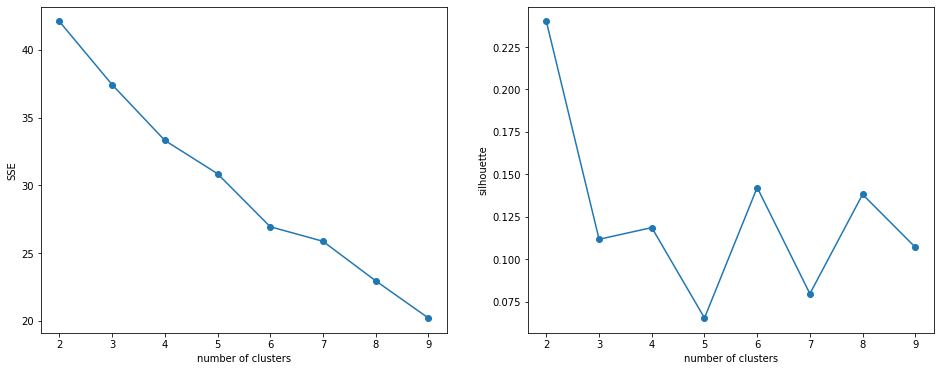

In [38]:
sse=[]
silhouette_avg=[]
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans_cluster=kmeans.fit_predict(df_log_minmax_clone)
    sse.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_log_minmax_clone, kmeans_cluster, metric="euclidean"))

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(range(2,10), sse, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.subplot(122)
plt.plot(range(2,10), silhouette_avg, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("silhouette")

plt.show()

In [39]:
kmeans = KMeans(n_clusters=2)
kmeans_cluster=kmeans.fit_predict(df_log_minmax_clone)
df_kmcluster=pd.DataFrame(kmeans_cluster, columns=["kmeans_cluster"], index=df_log_minmax_clone.index)
df_kmcluster["kmeans_cluster"]=df_kmcluster["kmeans_cluster"].map({0:"x",1:"y"})
df_scorengroup=pd.merge(df_scorengroup, df_kmcluster, on="Username", how="left")

In [47]:
#df_scorengroup.to_excel("member_score_group.xlsx")
#df_scorengroup.head()

=====pretest_q4_group=====


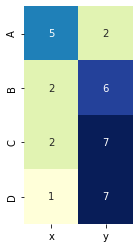

=====Quiz06_q4_group=====


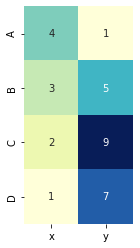

=====Quiz12_q4_group=====


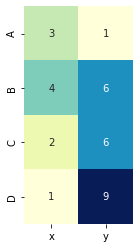

=====dtth_q4_group=====


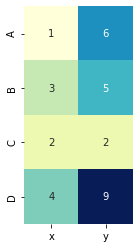

=====final_q4_group=====


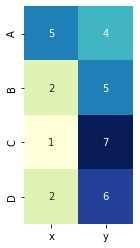

In [46]:
group_list=['pretest_q4_group', 'Quiz06_q4_group', 'Quiz12_q4_group', 'dtth_q4_group', 'final_q4_group']

for group in group_list:
    print("====="+group+"=====")
    mat=confusion_matrix(list(df_scorengroup[group]),list(df_scorengroup["kmeans_cluster"]), labels=list("ABCDxy"))
    mat=pd.DataFrame(mat, columns=list("ABCDxy"), index=list("ABCDxy")).iloc[:4,4:]
    sns.heatmap(mat, square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    plt.show()

### Hierarchical clustering 分組

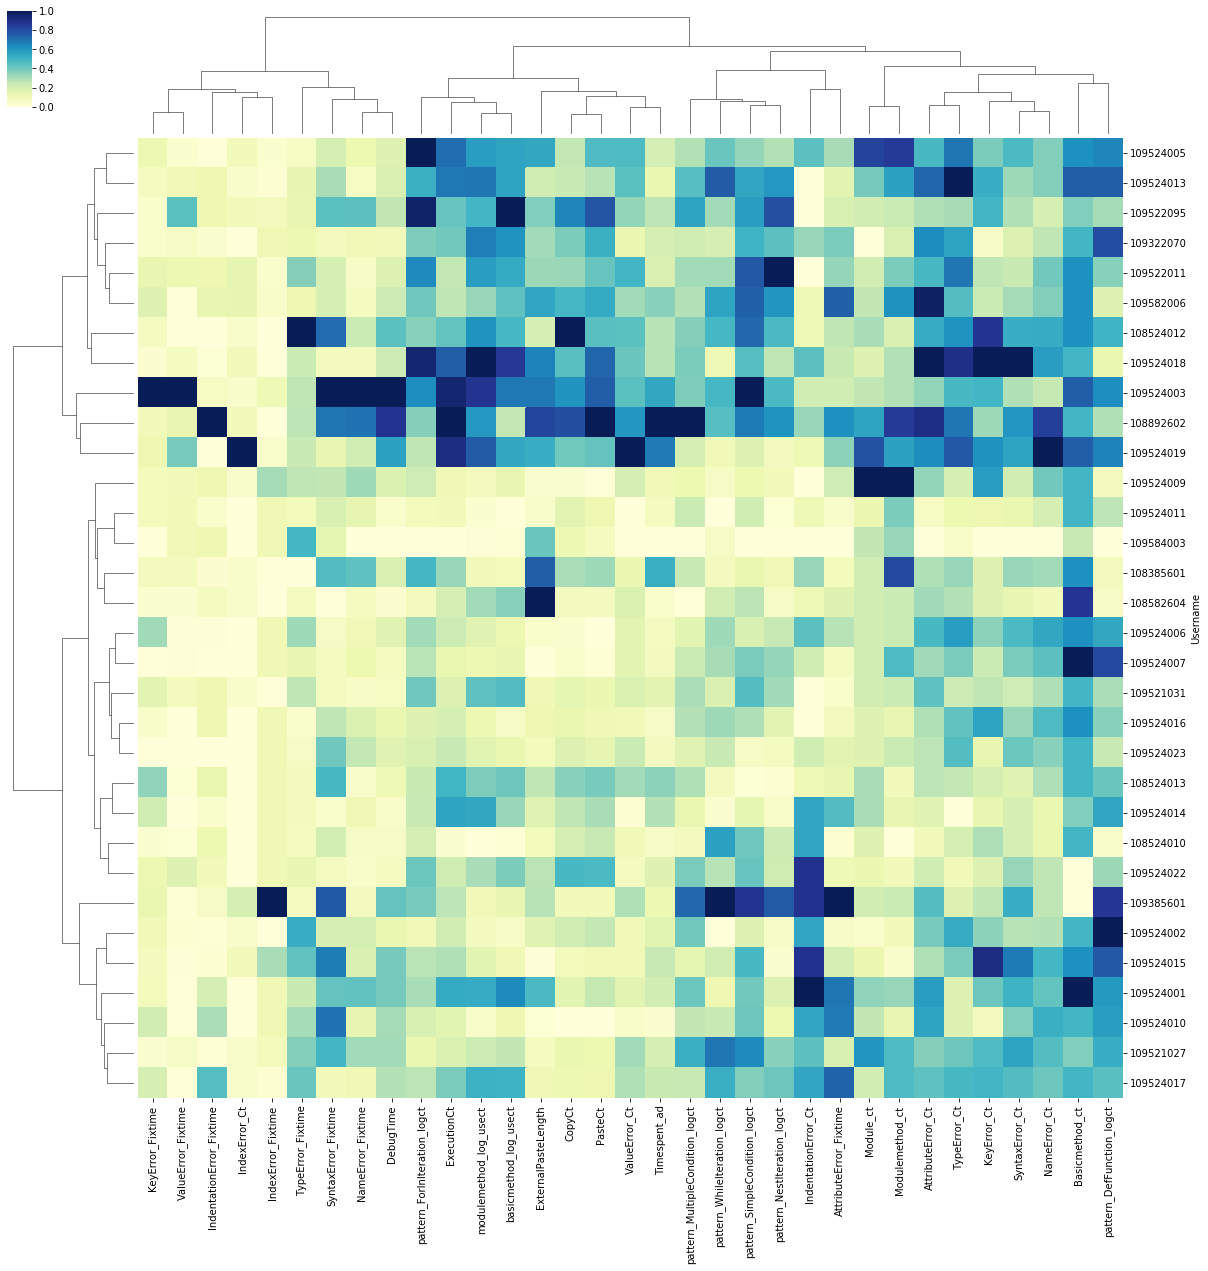

In [303]:
#nan帶入平均
sns.clustermap(df_log_minmax_clone, method="ward", figsize=(20,20), cmap="YlGnBu")

In [325]:
#新增hierarchical_cluster欄位後再讀入

# df_scorengroup=pd.read_excel("member_score_group.xlsx")
# if  "Unnamed: 0" in df_scorengroup.columns:
#     df_scorengroup=df_scorengroup.drop("Unnamed: 0", axis=1)

In [1]:
#df_scorengroup

=====pretest_q4_group=====


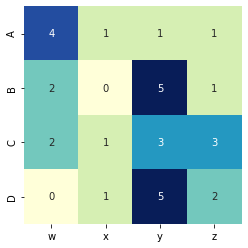

=====Quiz06_q4_group=====


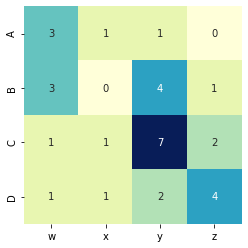

=====Quiz12_q4_group=====


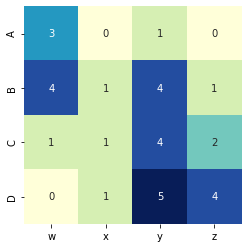

=====dtth_q4_group=====


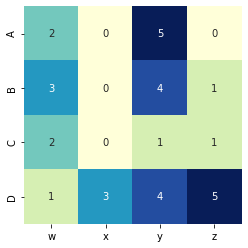

=====final_q4_group=====


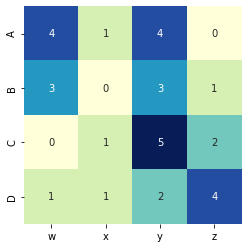

In [48]:
group_list=['pretest_q4_group', 'Quiz06_q4_group', 'Quiz12_q4_group', 'dtth_q4_group', 'final_q4_group']

for group in group_list:
    print("====="+group+"=====")
    mat=confusion_matrix(list(df_scorengroup[group]),list(df_scorengroup["hierarchical_cluster"]), labels=list("ABCDwxyz"))
    mat=pd.DataFrame(mat, columns=list("ABCDwxyz"), index=list("ABCDwxyz")).iloc[:4,4:]
    sns.heatmap(mat, square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    plt.show()

### 各組人數

In [2]:
# df_score.to_excel("member_score_group.xlsx")
#df_scorengroup.head()

In [329]:
#df_score=df_score.reset_index(drop=False)
group_list=[]
for i in df_scorengroup.columns:
    if "_group" in i or "_g" in i or "_fail" in i or "language_expr" in i or "_cluster" in i: group_list.append(i)

for g in group_list:
    print("======"+g+"======")
    df_scorengroup_x=df_scorengroup[["Username", g]].groupby(g).count()
    display(df_scorengroup_x)

======pretest_group======


Username
pretest_group          
A                     2
B                     1
C                     4
D                    25

======pretest_q4_group======


Username
pretest_q4_group          
A                        7
B                        8
C                        9
D                        8

======Quiz06_group======


Username
Quiz06_group          
A                    3
C                    6
D                   23

======Quiz06_q4_group======


Username
Quiz06_q4_group          
A                       5
B                       8
C                      11
D                       8

======Quiz12_group======


Username
Quiz12_group          
A                    1
B                    3
C                   10
D                   18

======Quiz12_q4_group======


Username
Quiz12_q4_group          
A                       4
B                      10
C                       8
D                      10

======Quiz12_basic_group======


Username
Quiz12_basic_group          
A                          3
B                          6
C                          6
D                         17

======Quiz12_basic_q4_group======


Username
Quiz12_basic_q4_group          
A                             3
B                            12
C                             7
D                            10

======Quiz12_library_group======


Username
Quiz12_library_group          
B                            3
C                            6
D                           23

======Quiz12_library_q4_group======


Username
Quiz12_library_q4_group          
A                               3
B                              12
D                              17

======dtth_group======


Username
dtth_group          
A                  7
B                  6
C                  6
D                 13

======dtth_q4_group======


Username
dtth_q4_group          
A                     7
B                     8
C                     4
D                    13

======final_group======


Username
final_group          
A                   1
B                  11
C                  11
D                   9

======final_q4_group======


Username
final_q4_group          
A                      9
B                      7
C                      8
D                      8

======final_fail======


Username
final_fail          
0                 23
1                  9

======language_expr======


Username
language_expr                    
NoExperience                    4
OtherLanguageExperience        10
PythonExperience               18

======python_ability_q4_group======


Username
python_ability_q4_group          
A                               8
B                               7
C                               9
D                               8

======3w_advance_g======


Username
3w_advance_g          
advance              9
degenerate          12
keephigh             6
keeplow              5

======9w_advance_g======


Username
9w_advance_g          
advance              5
degenerate          11
keephigh             8
keeplow              8

======13w_advance_g======


Username
13w_advance_g          
advance              10
degenerate           12
keephigh              7
keeplow               3

======python_advance_g======


Username
python_advance_g          
advance                  9
degenerate              13
keephigh                 4
keeplow                  6

======basic_advance_g======


Username
basic_advance_g          
advance                 6
degenerate             11
keephigh                7
keeplow                 8

======kmeans_cluster======


Username
kmeans_cluster          
x                     10
y                     22

======hierarchical_cluster======


Username
hierarchical_cluster          
w                            8
x                            3
y                           14
z                            7

In [46]:
#df_scorengroup
#df_log_values
#df_log_features
#df_log_minmax
#df_log_minmax_clone
#week_log
#week_log_minmax

# Group comparison

In [3]:
#df_scorengroup.head()

In [ ]:
df_log_features_clone=copy.deepcopy(df_log_features)
# for cl in df_log_features_clone.columns:
#     if len(df_log_features_clone[pd.isnull(df_log_features_clone[cl])])!=0:
#         print(cl)
#         df_log_features_clone[cl]=df_log_features_clone[cl].fillna(np.nanmean(df_log_features_clone[cl]))
df_log_features_clone.head()

## kruskalwallis

In [69]:
x=list(df_log_features_clone["ValueError_Fixtime"])
x1=[a for a in x if pd.notnull(a)] 
print(x)
print(x1)

[159.0, 48.5, 27.4375, 50.5, 65.85714285714286, 246.5909090909091, 126.0, 43.0, 125.7272727272727, 156.8571428571429, 214.0, 743.0769230769231, 26.4, 53.75, 1643.411764705882, 70.29411764705883, 37.16666666666666, 32.33333333333334, 173.5714285714286, 29.5, nan, 183.9411764705882, 14.0, 36.75, 12.75, 31.72727272727273, 137.0625, 647.6315789473684, 309.5, 18.25, 28.83333333333333, nan]
[159.0, 48.5, 27.4375, 50.5, 65.85714285714286, 246.5909090909091, 126.0, 43.0, 125.7272727272727, 156.8571428571429, 214.0, 743.0769230769231, 26.4, 53.75, 1643.411764705882, 70.29411764705883, 37.16666666666666, 32.33333333333334, 173.5714285714286, 29.5, 183.9411764705882, 14.0, 36.75, 12.75, 31.72727272727273, 137.0625, 647.6315789473684, 309.5, 18.25, 28.83333333333333]


In [70]:
group_list=['language_expr','final_q4_group','python_ability_q4_group','13w_advance_g','kmeans_cluster','hierarchical_cluster']
feature_list=list(df_log_features_clone.columns)
for gp in group_list:
    df0=pd.merge(df_log_features_clone, df_scorengroup[[gp]], on="Username", how="left")
    df_gp=pd.DataFrame()
    gp_item=list(set(df_scorengroup[gp]))
    for ft in feature_list:
        x_list=[]
        for i in gp_item:
            x=list(df0[df0[gp]==i][ft])
            x=[a for a in x  if pd.notnull(a)]
            x_list.append(x)
            df_gp.loc[ft,i+"_median"]=np.median(x)
        p=stats.kruskal(*x_list)[1]
        star=""
        if p<=0.05:  
            star=" ※※※"
        df_gp.loc[ft, "p_value"]=str(p)+star
    print("\n====="+gp+"=====")
    display(df_gp)
    df_gp.to_excel("kruskalwallis_"+gp+".xlsx")


=====language_expr=====


OtherLanguageExperience_median  \
Module_ct                                             45.500000   
Modulemethod_ct                                      138.000000   
Basicmethod_ct                                        25.000000   
modulemethod_log_usect                              3241.500000   
basicmethod_log_usect                                620.500000   
SyntaxError_Ct                                        37.000000   
NameError_Ct                                          39.000000   
AttributeError_Ct                                     18.500000   
TypeError_Ct                                          15.000000   
KeyError_Ct                                           12.500000   
ValueError_Ct                                          4.000000   
IndentationError_Ct                                    5.000000   
IndexError_Ct                                          0.000000   
SyntaxError_Fixtime                                  145.296273   
NameError_Fixtime                                    109.114130   
AttributeError_Fixtime                               103.901515   
TypeError_Fixtime                                     89.514286   
KeyError_Fixtime                                     146.416667   
ValueError_Fixtime                                    51.125000   
IndentationError_Fixtime                             321.625000   
IndexError_Fixtime                                    40.000000   
pattern_SimpleCondition_logct                        115.000000   
pattern_MultipleCondition_logct                      106.000000   
pattern_WhileIteration_logct                          51.000000   
pattern_ForInIteration_logct                         202.500000   
pattern_NestIteration_logct                          345.000000   
pattern_DefFunction_logct                             87.000000   
CopyCt                                               462.000000   
PasteCt                                              674.500000   
ExecutionCt                                         1718.500000   
ExternalPasteLength                                24080.000000   
Timespent_ad                                      115926.000000   
DebugTime                                          16578.000000   

                                 PythonExperience_median  NoExperience_median  \
Module_ct                                      44.000000            44.000000   
Modulemethod_ct                               141.500000           140.000000   
Basicmethod_ct                                 25.500000            25.500000   
modulemethod_log_usect                       4381.500000          2475.000000   
basicmethod_log_usect                         932.500000           438.500000   
SyntaxError_Ct                                 31.000000            46.000000   
NameError_Ct                                   36.000000            33.000000   
AttributeError_Ct                              19.000000            18.500000   
TypeError_Ct                                   19.500000            18.500000   
KeyError_Ct                                    14.000000             8.500000   
ValueError_Ct                                  11.500000             7.500000   
IndentationError_Ct                             1.000000             3.500000   
IndexError_Ct                                   1.000000             0.500000   
SyntaxError_Fixtime                           125.553977           243.373803   
NameError_Fixtime                              73.997500           117.572527   
AttributeError_Fixtime                         90.711765            91.633117   
TypeError_Fixtime                             104.871711            48.023684   
KeyError_Fixtime                              129.529135           161.328571   
ValueError_Fixtime                            131.531250            40.083333   
IndentationError_Fixtime                      129.500000            73.500000   
IndexError_Fixtime                             74.666


=====final_q4_group=====


B_median       C_median       A_median  \
Module_ct                            44.000000      44.000000      45.000000   
Modulemethod_ct                     140.000000     142.500000     141.000000   
Basicmethod_ct                       25.000000      25.500000      26.000000   
modulemethod_log_usect             3500.000000    2845.500000    5067.000000   
basicmethod_log_usect               766.000000     535.500000     950.000000   
SyntaxError_Ct                       24.000000      45.500000      34.000000   
NameError_Ct                         26.000000      42.500000      36.000000   
AttributeError_Ct                    17.000000      16.500000      21.000000   
TypeError_Ct                         15.000000      20.500000      22.000000   
KeyError_Ct                          10.000000      15.000000      14.000000   
ValueError_Ct                         7.000000       7.500000      16.000000   
IndentationError_Ct                   1.000000       3.500000       1.000000   
IndexError_Ct                         1.000000       0.500000       1.000000   
SyntaxError_Fixtime                 125.733333     127.636090     129.479167   
NameError_Fixtime                    98.210526     129.306546      57.421053   
AttributeError_Fixtime               82.533333      74.761905      68.545455   
TypeError_Fixtime                    71.800000      89.651786     103.868421   
KeyError_Fixtime                    131.736842     147.153571     117.516129   
ValueError_Fixtime                  149.785714      81.446970     103.678309   
IndentationError_Fixtime            129.500000      57.750000      53.750000   
IndexError_Fixtime                   74.666667      64.075000      34.500000   
pattern_SimpleCondition_logct        84.000000      78.000000     128.000000   
pattern_MultipleCondition_logct      81.000000      83.500000      97.000000   
pattern_WhileIteration_logct         36.000000      51.000000      52.000000   
pattern_ForInIteration_logct        201.000000     222.000000     298.000000   
pattern_NestIteration_logct         239.000000     334.000000     469.000000   
pattern_DefFunction_logct            55.000000      68.000000      82.000000   
CopyCt                              470.000000     386.000000     532.000000   
PasteCt                             677.000000     505.000000     878.000000   
ExecutionCt                        1709.000000    1775.500000    2655.000000   
ExternalPasteLength               33452.000000   20932.000000   30266.000000   
Timespent_ad                     111680.000000  115926.000000  119916.000000   
DebugTime                         15022.000000   18864.500000   18134.000000   

                                      D_median                   p_value  
Module_ct                            45.000000        0.2697024461827147  
Modulemethod_ct                     139.000000           0.7598483556824  
Basicmethod_ct                       25.000000        0.7610759261937701  
modulemethod_log_usect             3116.000000       0.33459842878247753  
basicmethod_log_usect               538.000000       0.29242365182936275  
SyntaxError_Ct                       45.500000  0.016486826803405633 ※※※  
NameError_Ct                         39.000000        0.1648566276234568  
AttributeError_Ct                    24.000000        0.7597819313303562  
TypeError_Ct                         10.500000        0.2771340904190786  
KeyError_Ct                          10.500000        0.7149258887898131  
ValueError_Ct                         5.000000       0.40518467246165635  
IndentationError_Ct                   5.000000  0.009100650099379718 ※※※  
IndexError_Ct                         1.000000        0.8707786361906307  
SyntaxError_Fixtime                 297.794118        0.3104886425706703  
NameError_Fixtime                    88.517857       0.49790382361128527  
AttributeError_Fixtime              258.570513       0.06694857522110478  
TypeError_Fixtime                    84.32


=====python_ability_q4_group=====


B_median       C_median       A_median  \
Module_ct                            44.000000      44.000000      44.500000   
Modulemethod_ct                     140.000000     142.000000     142.500000   
Basicmethod_ct                       25.000000      26.000000      25.000000   
modulemethod_log_usect             4209.000000    3445.000000    4449.500000   
basicmethod_log_usect               915.000000     796.000000     929.000000   
SyntaxError_Ct                       31.000000      48.000000      25.000000   
NameError_Ct                         29.000000      40.000000      37.500000   
AttributeError_Ct                    16.000000      19.000000      20.000000   
TypeError_Ct                         15.000000      22.000000      21.500000   
KeyError_Ct                          10.000000      15.000000       9.500000   
ValueError_Ct                         9.000000       6.000000      10.000000   
IndentationError_Ct                   1.000000       4.000000       0.500000   
IndexError_Ct                         1.000000       1.000000       0.500000   
SyntaxError_Fixtime                 129.479167     125.733333     116.692308   
NameError_Fixtime                    98.210526     139.134831      54.372291   
AttributeError_Fixtime               75.187500      92.823529      81.978610   
TypeError_Fixtime                    54.285714     113.500000      89.136591   
KeyError_Fixtime                    117.516129     169.450000      91.043860   
ValueError_Fixtime                   68.075630     125.727273     137.062500   
IndentationError_Fixtime             29.750000     102.000000     100.875000   
IndexError_Fixtime                   19.000000      64.075000      62.333333   
pattern_SimpleCondition_logct       100.000000     107.000000     119.500000   
pattern_MultipleCondition_logct      94.000000     116.000000      88.000000   
pattern_WhileIteration_logct         43.000000      48.000000      30.000000   
pattern_ForInIteration_logct        272.000000     242.000000     254.500000   
pattern_NestIteration_logct         436.000000     369.000000     451.500000   
pattern_DefFunction_logct            53.000000      88.000000      66.000000   
CopyCt                              417.000000     470.000000     579.000000   
PasteCt                             523.000000     677.000000     795.500000   
ExecutionCt                        1792.000000    2085.000000    2073.000000   
ExternalPasteLength               26016.000000   30730.000000   31859.000000   
Timespent_ad                     110962.000000  121384.000000  111873.500000   
DebugTime                         17792.000000   29161.000000   15628.500000   

                                      D_median                   p_value  
Module_ct                            44.500000        0.9673285979210506  
Modulemethod_ct                     138.000000       0.42062765633737365  
Basicmethod_ct                       25.000000        0.8040562484264817  
modulemethod_log_usect             2519.000000        0.5722569677978555  
basicmethod_log_usect               442.500000        0.2019586279300896  
SyntaxError_Ct                       37.000000       0.19965889494782654  
NameError_Ct                         41.000000        0.5441894480567131  
AttributeError_Ct                    18.500000        0.8020323736395777  
TypeError_Ct                         14.500000        0.5681271714574709  
KeyError_Ct                          10.500000          0.78367275114033  
ValueError_Ct                         4.000000        0.5865235557430477  
IndentationError_Ct                   5.000000  0.007245376801067572 ※※※  
IndexError_Ct                         1.000000        0.9401021528112031  
SyntaxError_Fixtime                 257.645378       0.45779478185143796  
NameError_Fixtime                    88.517857       0.10252392745399302  
AttributeError_Fixtime              217.264957        0.2928827788932039  
TypeError_Fixtime                    58.02


=====13w_advance_g=====


degenerate_median  keephigh_median  \
Module_ct                                44.500000        44.000000   
Modulemethod_ct                         140.500000       143.000000   
Basicmethod_ct                           25.500000        26.000000   
modulemethod_log_usect                 3321.000000      4209.000000   
basicmethod_log_usect                   751.000000       915.000000   
SyntaxError_Ct                           37.000000        26.000000   
NameError_Ct                             38.000000        39.000000   
AttributeError_Ct                        18.500000        21.000000   
TypeError_Ct                             20.500000        18.000000   
KeyError_Ct                              17.500000        10.000000   
ValueError_Ct                            11.500000         8.000000   
IndentationError_Ct                       4.000000         0.000000   
IndexError_Ct                             1.000000         1.000000   
SyntaxError_Fixtime                     145.296273       127.884615   
NameError_Fixtime                       121.313599        83.651163   
AttributeError_Fixtime                   90.711765        68.545455   
TypeError_Fixtime                       109.687500       113.083333   
KeyError_Fixtime                        162.391667       131.736842   
ValueError_Fixtime                       51.125000       165.214286   
IndentationError_Fixtime                158.562500        15.500000   
IndexError_Fixtime                       98.000000        50.000000   
pattern_SimpleCondition_logct           116.500000       129.000000   
pattern_MultipleCondition_logct          93.000000        97.000000   
pattern_WhileIteration_logct             61.000000        52.000000   
pattern_ForInIteration_logct            222.000000       272.000000   
pattern_NestIteration_logct             406.000000       491.000000   
pattern_DefFunction_logct                88.500000        62.000000   
CopyCt                                  462.000000       385.000000   
PasteCt                                 673.000000       489.000000   
ExecutionCt                            1904.000000      1585.000000   
ExternalPasteLength                   22596.000000     20716.000000   
Timespent_ad                         122499.500000    107529.000000   
DebugTime                             28007.500000     19218.000000   

                                 advance_median  keeplow_median  \
Module_ct                             44.000000       46.000000   
Modulemethod_ct                      140.000000      152.000000   
Basicmethod_ct                        25.000000       25.000000   
modulemethod_log_usect              3472.500000     4837.000000   
basicmethod_log_usect                781.000000      617.000000   
SyntaxError_Ct                        39.000000       35.000000   
NameError_Ct                          27.500000       31.000000   
AttributeError_Ct                     19.000000       15.000000   
TypeError_Ct                          13.500000       16.000000   
KeyError_Ct                            7.500000        7.000000   
ValueError_Ct                          6.500000        5.000000   
IndentationError_Ct                    3.500000        3.000000   
IndexError_Ct                          0.000000        1.000000   
SyntaxError_Fixtime                   89.208763      257.794118   
NameError_Fixtime                     57.960526      276.250000   
AttributeError_Fixtime                87.491477      187.555556   
TypeError_Fixtime                     69.026786       53.000000   
KeyError_Fixtime                      99.083333      137.500000   
ValueError_Fixtime                    50.500000      159.000000   
IndentationError_Fixtime             216.625000      131.400000   
IndexError_Fixtime                    15.000000       13.000000   
pattern_SimpleCondition_logct         99.000000       57.000000   
pattern_MultipleCondition_logct       86.500000       83.000000   
pattern_Wh


=====kmeans_cluster=====


x_median       y_median  \
Module_ct                            45.500000      44.000000   
Modulemethod_ct                     145.000000     140.000000   
Basicmethod_ct                       26.000000      25.000000   
modulemethod_log_usect             5175.500000    2633.000000   
basicmethod_log_usect              1038.500000     460.500000   
SyntaxError_Ct                       41.500000      35.000000   
NameError_Ct                         37.500000      30.000000   
AttributeError_Ct                    27.000000      16.000000   
TypeError_Ct                         30.000000      13.500000   
KeyError_Ct                          18.000000       9.500000   
ValueError_Ct                        17.000000       5.500000   
IndentationError_Ct                   1.000000       3.500000   
IndexError_Ct                         2.000000       0.000000   
SyntaxError_Fixtime                 153.042614     129.605797   
NameError_Fixtime                   112.111533      80.968439   
AttributeError_Fixtime              117.328182      71.522321   
TypeError_Fixtime                   104.871711      72.686508   
KeyError_Fixtime                    153.475000     132.618421   
ValueError_Fixtime                  198.970588      45.750000   
IndentationError_Fixtime             77.750000     133.200000   
IndexError_Fixtime                   71.833333      49.000000   
pattern_SimpleCondition_logct       167.500000      98.500000   
pattern_MultipleCondition_logct     114.500000      82.000000   
pattern_WhileIteration_logct         70.500000      39.000000   
pattern_ForInIteration_logct        388.000000     210.500000   
pattern_NestIteration_logct         702.500000     283.000000   
pattern_DefFunction_logct            72.000000      72.000000   
CopyCt                              854.000000     365.500000   
PasteCt                            1053.000000     481.500000   
ExecutionCt                        3298.000000    1718.500000   
ExternalPasteLength               47603.000000   20932.000000   
Timespent_ad                     132097.500000  107795.500000   
DebugTime                         25563.500000   14830.000000   

                                                    p_value  
Module_ct                          0.033773816686458645 ※※※  
Modulemethod_ct                     0.02098298643548825 ※※※  
Basicmethod_ct                          0.10020632398074271  
modulemethod_log_usect            9.502536917283058e-05 ※※※  
basicmethod_log_usect            0.00047045443802178305 ※※※  
SyntaxError_Ct                          0.10803637901865419  
NameError_Ct                            0.11715493702489536  
AttributeError_Ct                 0.0018357302824742673 ※※※  
TypeError_Ct                     0.00018078796630742076 ※※※  
KeyError_Ct                        0.010943854776566102 ※※※  
ValueError_Ct                     8.909468805806487e-06 ※※※  
IndentationError_Ct                     0.06109525956806162  
IndexError_Ct                     0.0002466229490002607 ※※※  
SyntaxError_Fixtime                     0.20755062195761623  
NameError_Fixtime                       0.34974554103411926  
AttributeError_Fixtime                  0.06732321817745623  
TypeError_Fixtime                       0.48947235984965753  
KeyError_Fixtime                         0.5971348901835933  
ValueError_Fixtime                 0.015534281597943376 ※※※  
IndentationError_Fixtime                 0.4676714039041745  
IndexError_Fixtime                      0.46203968218959157  
pattern_SimpleCondition_logct      0.004150443308055478 ※※※  
pattern_MultipleCondition_logct     0.01736913235642659 ※※※  
pattern_WhileIteration_logct           0.050851528417929316  
pattern_ForInIteration_logct      0.0004046184876400624 ※※※  
pattern_NestIteration_logct        0.001319030787464758 ※※※  
pattern_DefFunction_logct                0.8548101352598582  
CopyCt                           0.00011232486485427472 ※※※  
PasteCt                      


=====hierarchical_cluster=====


x_median       w_median       z_median  \
Module_ct                            52.000000      44.500000      44.000000   
Modulemethod_ct                     147.000000     142.000000     140.000000   
Basicmethod_ct                       27.000000      26.000000      25.000000   
modulemethod_log_usect             6029.000000    5142.000000    2628.000000   
basicmethod_log_usect              1030.000000    1047.000000     459.000000   
SyntaxError_Ct                       57.000000      33.500000      52.000000   
NameError_Ct                         81.000000      36.000000      42.000000   
AttributeError_Ct                    29.000000      27.000000      21.000000   
TypeError_Ct                         30.000000      28.500000      18.000000   
KeyError_Ct                          18.000000      16.000000      15.000000   
ValueError_Ct                        23.000000      16.500000       6.000000   
IndentationError_Ct                   2.000000       1.000000       5.000000   
IndexError_Ct                         2.000000       2.000000       1.000000   
SyntaxError_Fixtime                 367.379310     128.681891     271.285714   
NameError_Fixtime                   432.051948      63.970526     123.148936   
AttributeError_Fixtime              143.517241     117.328182     270.166667   
TypeError_Fixtime                   113.500000      73.102381     149.157895   
KeyError_Fixtime                    169.450000     117.468591     155.333333   
ValueError_Fixtime                  647.631579     131.531250      36.750000   
IndentationError_Fixtime            232.000000      77.750000     216.625000   
IndexError_Fixtime                   79.150000      69.000000     169.000000   
pattern_SimpleCondition_logct       179.000000     153.500000     117.000000   
pattern_MultipleCondition_logct     116.000000     107.000000     122.000000   
pattern_WhileIteration_logct         73.000000      60.500000      43.000000   
pattern_ForInIteration_logct        275.000000     391.000000     223.000000   
pattern_NestIteration_logct         640.000000     702.500000     321.000000   
pattern_DefFunction_logct            99.000000      72.000000      94.000000   
CopyCt                             1065.000000     772.000000     333.000000   
PasteCt                            1422.000000    1038.000000     476.000000   
ExecutionCt                        4133.000000    2409.000000    1870.000000   
ExternalPasteLength               56854.000000   35623.500000   20725.000000   
Timespent_ad                     203600.000000  125153.500000  118366.000000   
DebugTime                         88172.000000   21936.500000   32330.000000   

                                     y_median                     p_value  
Module_ct                           44.000000         0.24500947008745455  
Modulemethod_ct                    140.000000          0.1991254111334426  
Basicmethod_ct                      25.000000         0.44668624396371426  
modulemethod_log_usect            2524.000000  0.00032921823169063493 ※※※  
basicmethod_log_usect              454.500000   0.0013005804211394239 ※※※  
SyntaxError_Ct                      24.500000     0.01761053799066519 ※※※  
NameError_Ct                        29.000000          0.1554663064742803  
AttributeError_Ct                   14.500000   0.0006428246372967447 ※※※  
TypeError_Ct                        12.500000   0.0011056900317333602 ※※※  
KeyError_Ct                          7.500000         0.08043868191974174  
ValueError_Ct                        5.500000   0.0004549455802814165 ※※※  
IndentationError_Ct                  1.500000   0.0053199994589716686 ※※※  
IndexError_Ct                        0.000000   0.0030236468931716725 ※※※  
SyntaxError_Fixtime                115.031250        0.054780607869650506  
NameError_Fixtime                   74.758242      0.0433286706021272 ※※※  
AttributeError_Fixtime              46.708333    0.006384847682287282 ※※※  
TypeError_Fixtime        

# Correlation & Factor analysis
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [ ]:
df_scorengroup=df_scorengroup.set_index("Username")
df_scorengroup.head()

In [13]:
df_log_values.head()

Module_ct  Modulemethod_ct  Basicmethod_ct  modulemethod_log_usect  \
Username                                                                        
108385601         44              152              26                    2277   
108524010         43              135              25                    1705   
108524012         46              139              26                    5217   
108524013         46              137              25                    3862   
108582604         44              140              28                    3500   

           basicmethod_log_usect  SyntaxError_Ct  NameError_Ct  \
Username                                                         
108385601                    386              35            31   
108524010                    280              23            14   
108524012                    950              54            52   
108524013                    837              19            29   
108582604                    766              17            10   

           AttributeError_Ct  TypeError_Ct  KeyError_Ct  ValueError_Ct  \
Username                                                                 
108385601                 15            16            7              5   
108524010                  7            11           11              4   
108524012                 25            27           31             17   
108524013                 14            13            8             12   
108582604                 16            14            7              7   

           IndentationError_Ct  IndexError_Ct  SyntaxError_Fixtime  \
Username                                                             
108385601                    3              1           257.794118   
108524010                    5              0           133.478261   
108524012                    1              1           378.685185   
108524013                    1              0           265.473684   
108582604                    1              1            29.411765   

           NameError_Fixtime  AttributeError_Fixtime  TypeError_Fixtime  \
Username                                                                  
108385601         276.250000               42.500000          22.437500   
108524010          45.285714               18.142857          49.090909   
108524012         151.038462              108.520000         366.592593   
108524013          36.678571               64.642857          53.250000   
108582604          54.100000               75.187500          50.357143   

           KeyError_Fixtime  ValueError_Fixtime  IndentationError_Fixtime  \
Username                                                                    
108385601        124.857143          159.000000                     102.0   
108524010         51.181818           48.500000                     420.2   
108524012        117.516129           27.437500                       4.0   
108524013        481.000000           50.500000                     457.0   
108582604         59.142857           65.857143                     245.0   

           IndexError_Fixtime  pattern_SimpleCondition_logct  \
Username                                                       
108385601                19.0                             53   
108524010                 NaN                            116   
108524012                 7.0                            190   
108524013                 NaN                             26   
108582604                15.0                             84   

           pattern_MultipleCondition_logct  pattern_WhileIteration_logct  \
Username                                                                   
108385601                               83                            20   
108524010                               43                            90   
108524012                              113                            78   
108524013                               95                            20   

In [14]:
df_log_values2=copy.deepcopy(df_log_values)
for cl in df_log_values2.columns:
    if len(df_log_values2[pd.isnull(df_log_values2[cl])])!=0:
        print(cl)
        df_log_values2[cl]=df_log_values2[cl].fillna(np.nanmean(df_log_values2[cl]))

minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
df_log_values2=pd.merge(df_log_values2, df_scorengroup[["final","python_ability"]], on="Username", how="left")
df_log_minmax2=minmax.fit_transform(df_log_values2)
df_log_minmax2=pd.DataFrame(data=df_log_minmax2, columns=df_log_values2.columns, index=df_log_values2.index)

ValueError_Fixtime
IndentationError_Fixtime
IndexError_Fixtime


## Correlation

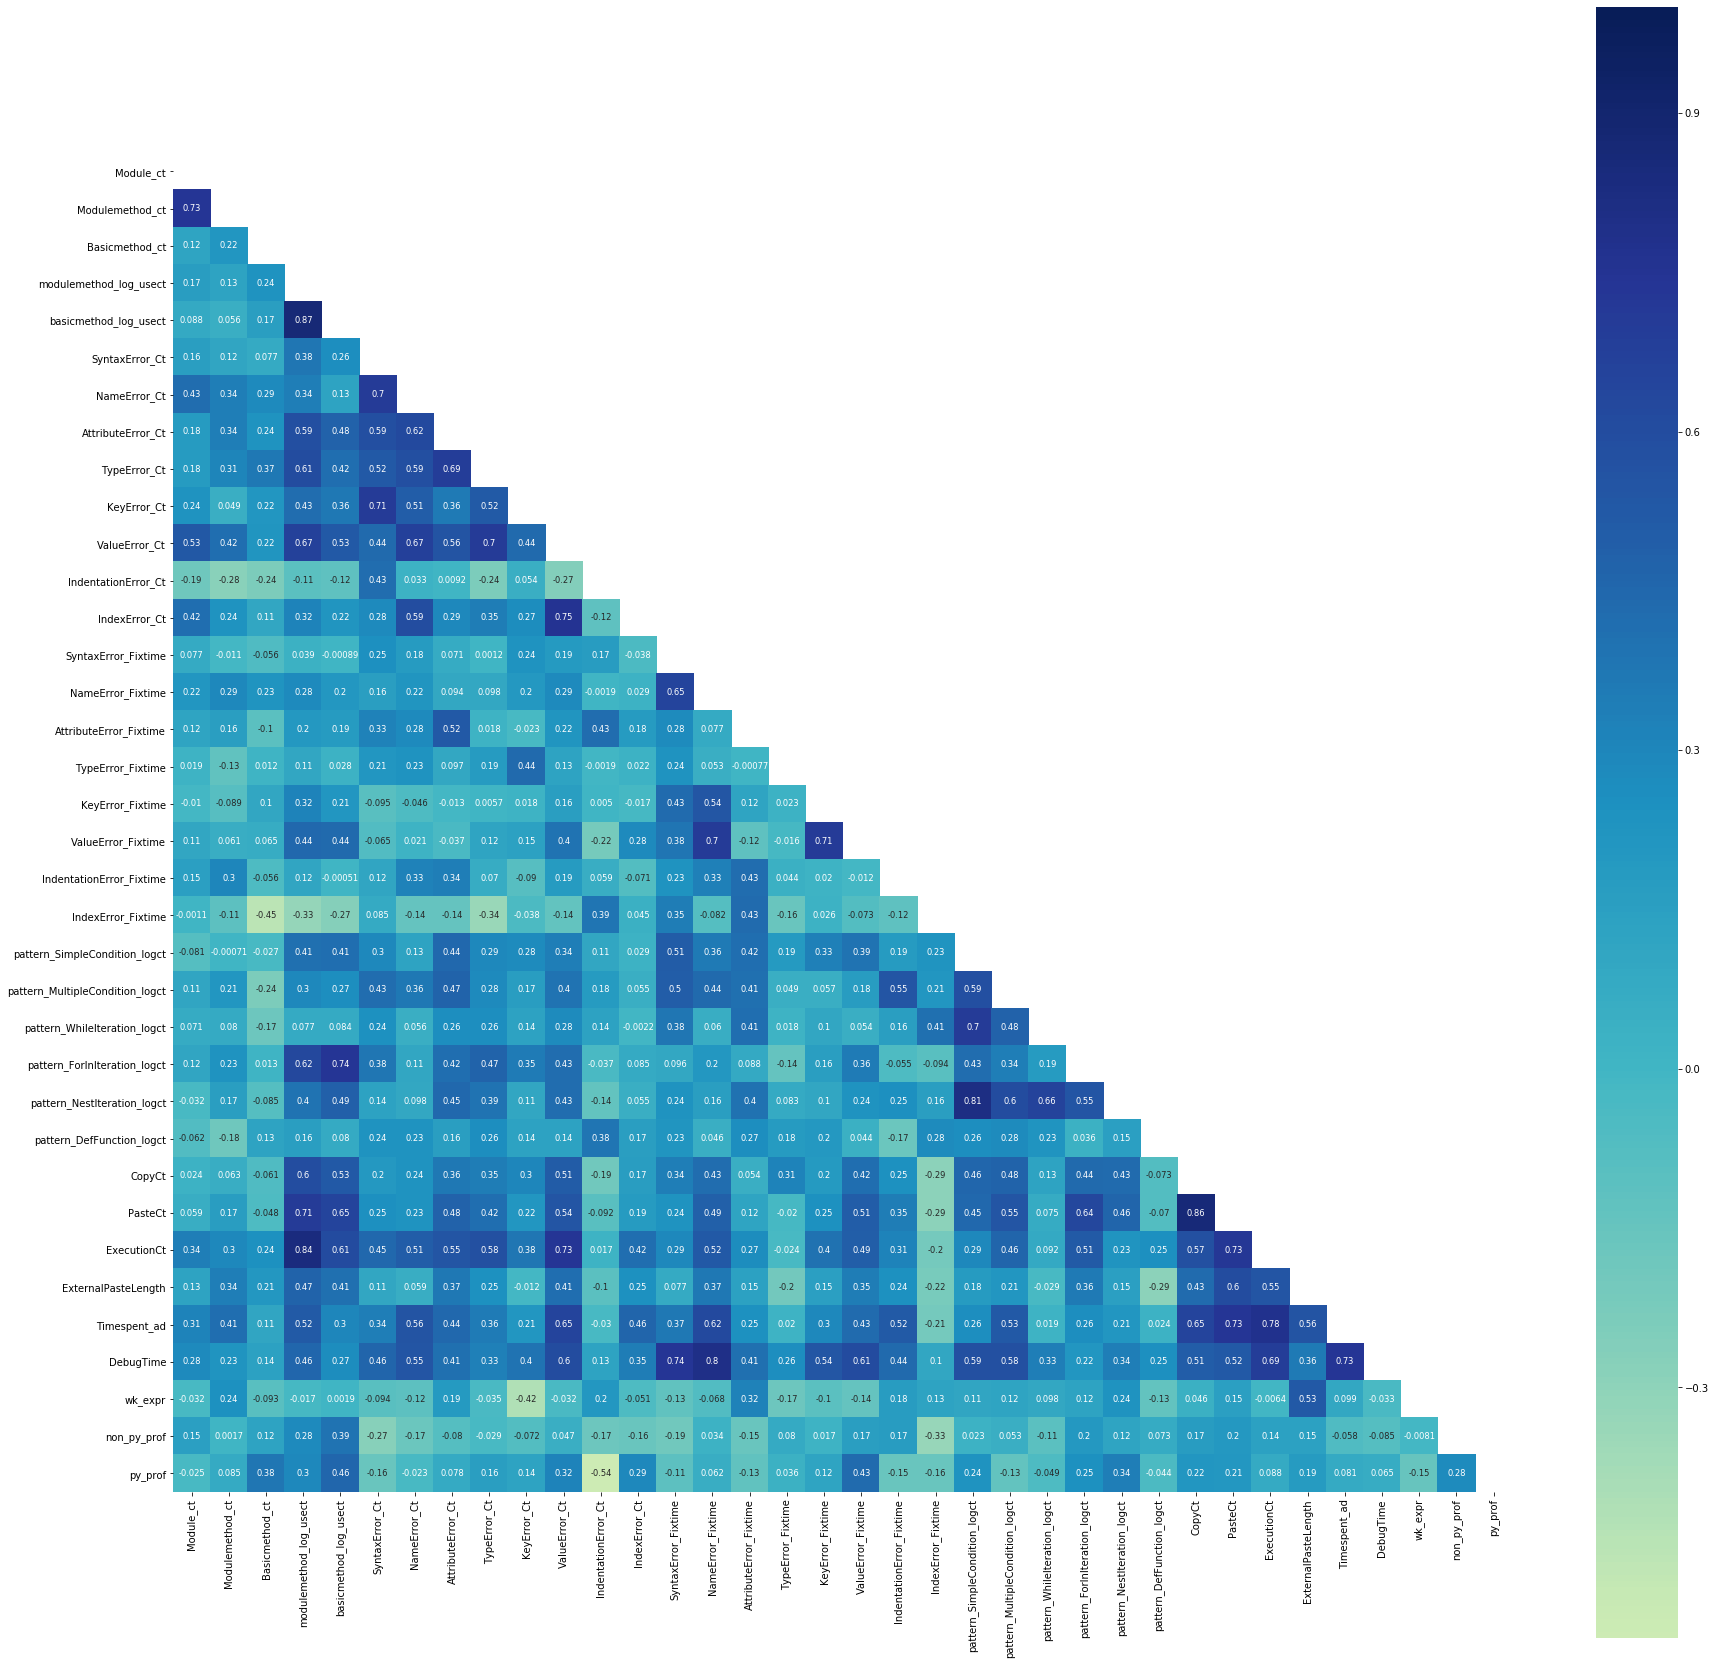

In [116]:
#feature 與 feature

df_log_minmax2_corr=df_log_minmax2.iloc[:,:-2].corr()

mask = np.zeros_like(df_log_minmax2_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(30,30))
sns.heatmap(df_log_minmax2_corr, center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", mask=mask, square=1)

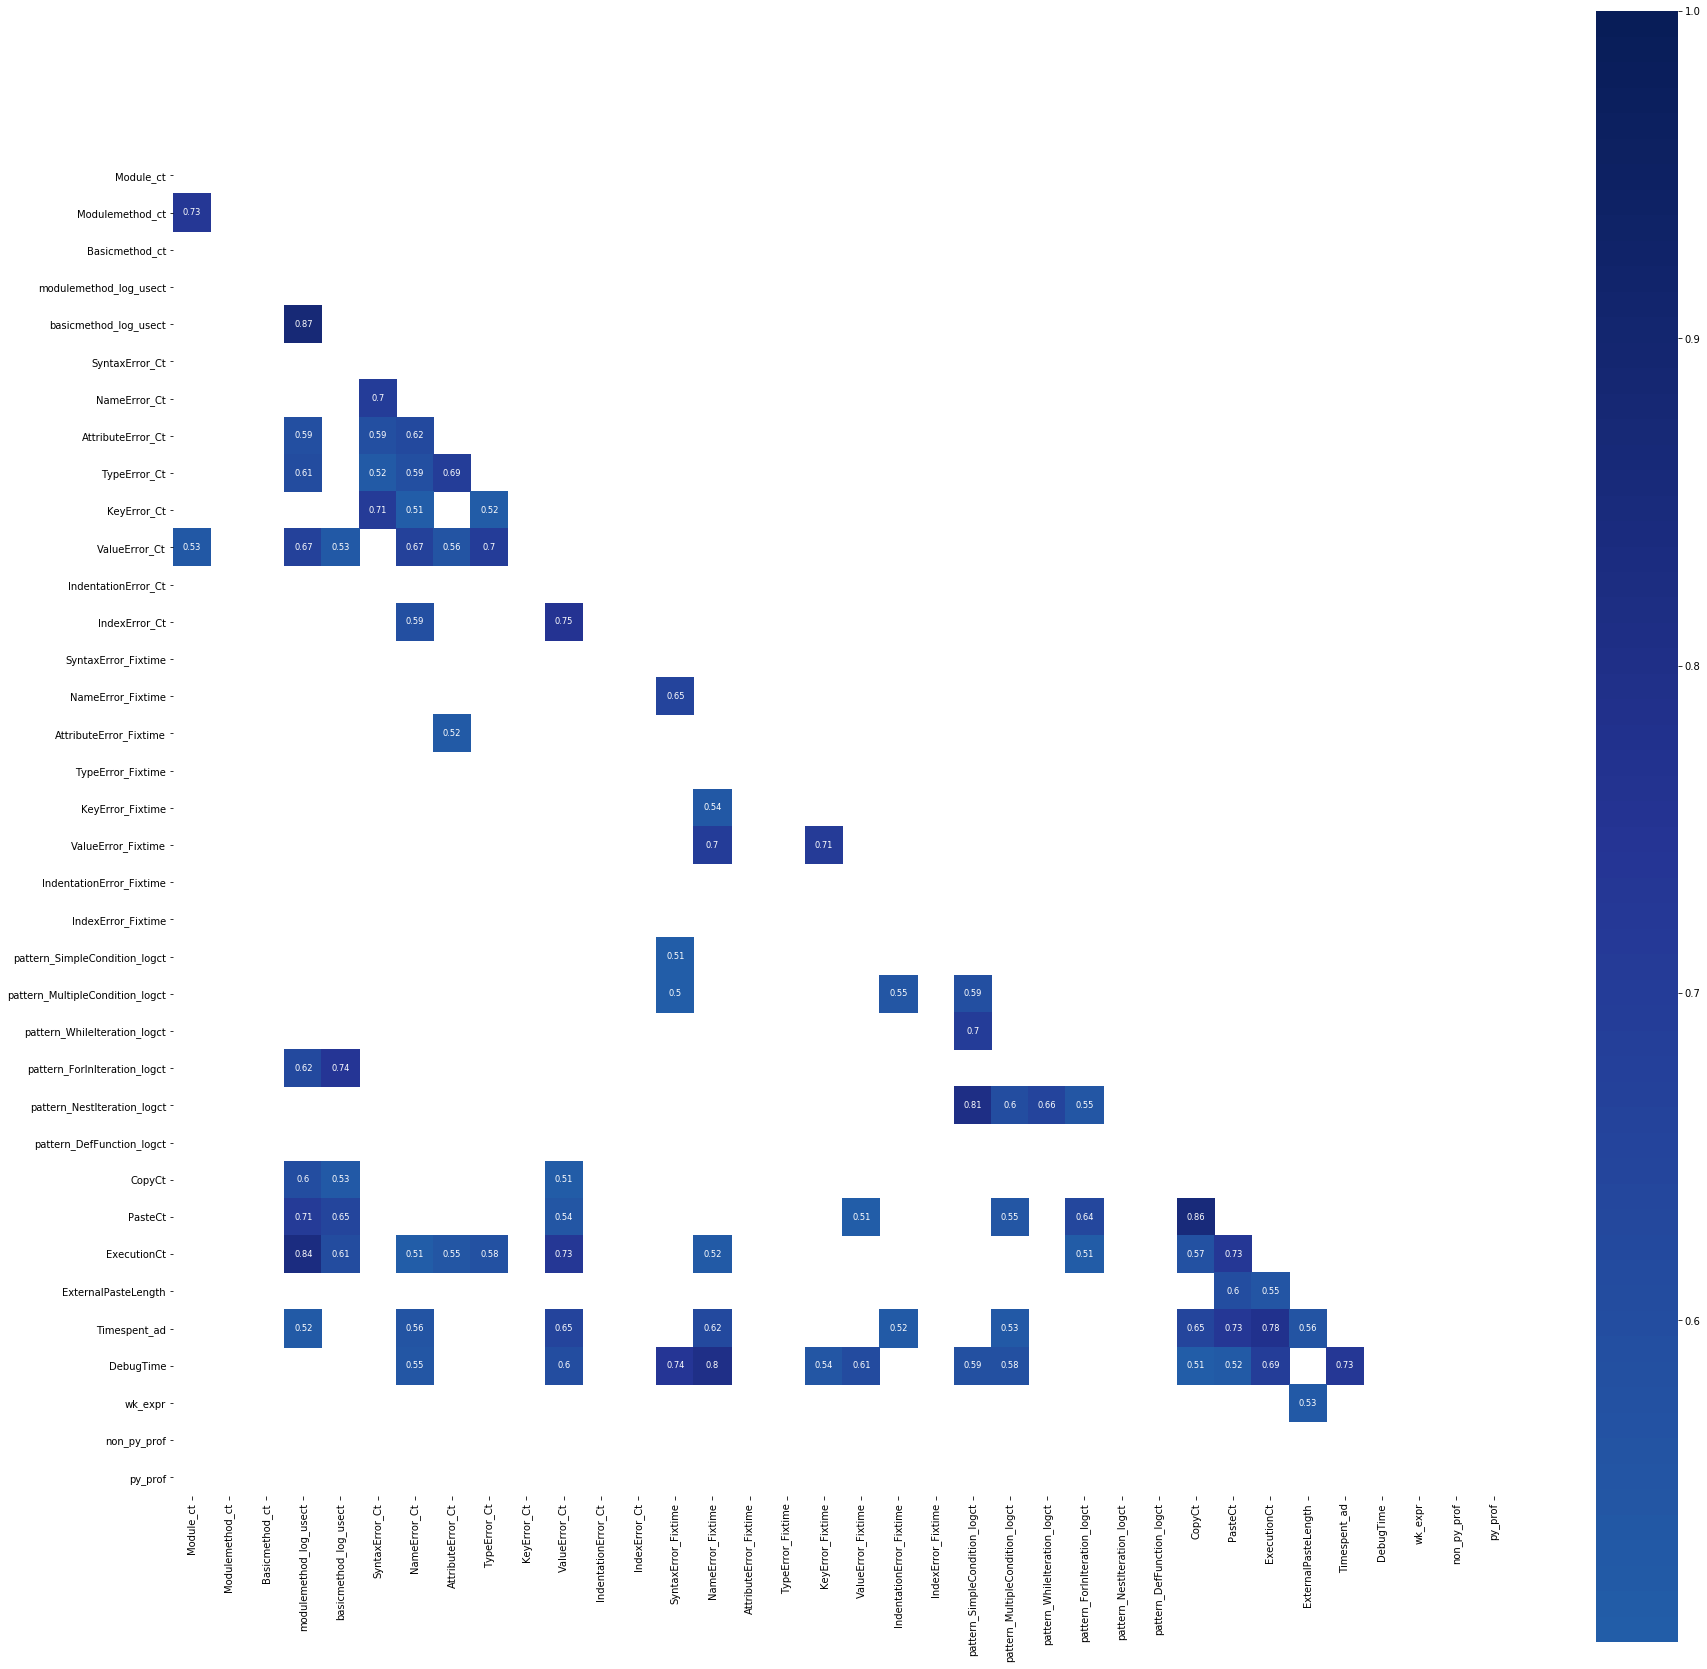

In [133]:
plt.figure(figsize=(30,30))
sns.heatmap(df_log_minmax2_corr[(df_log_minmax2_corr>0.5)], center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", mask=mask, square=1)
#sns.heatmap(df_log_minmax2_corr[(df_log_minmax2_corr>0.3)&(df_log_minmax2_corr<0.5)], center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", mask=mask, square=1)

In [137]:
dd2=pd.DataFrame()
dd=df_log_minmax2.iloc[:,:-2]
cl_list=dd.columns
corr_list=[]
corr_item=[]
ct=0
for i in cl_list:
    for j in cl_list:
        if i!=j and dd[[i,j]].corr().loc[i,j]>=0.3:
            a=[i,j]
            a.sort()
            dd2.loc[i,j]=round(dd[[i,j]].corr().loc[i,j], 3)
            if a not in corr_list:
                corr_list.append(a)
                corr_item.append(i)
                corr_item.append(j)
                ct+=1
                print(i,"=>",j,"    corr: ",round(dd[[i,j]].corr().loc[i,j], 3))
corr_item=list(set(corr_item))

Module_ct => Modulemethod_ct     corr:  0.731
Module_ct => NameError_Ct     corr:  0.426
Module_ct => ValueError_Ct     corr:  0.534
Module_ct => IndexError_Ct     corr:  0.422
Module_ct => ExecutionCt     corr:  0.343
Module_ct => Timespent_ad     corr:  0.312
Modulemethod_ct => NameError_Ct     corr:  0.339
Modulemethod_ct => AttributeError_Ct     corr:  0.342
Modulemethod_ct => TypeError_Ct     corr:  0.306
Modulemethod_ct => ValueError_Ct     corr:  0.419
Modulemethod_ct => IndentationError_Fixtime     corr:  0.301
Modulemethod_ct => ExternalPasteLength     corr:  0.336
Modulemethod_ct => Timespent_ad     corr:  0.414
Basicmethod_ct => TypeError_Ct     corr:  0.366
Basicmethod_ct => py_prof     corr:  0.377
modulemethod_log_usect => basicmethod_log_usect     corr:  0.868
modulemethod_log_usect => SyntaxError_Ct     corr:  0.379
modulemethod_log_usect => NameError_Ct     corr:  0.338
modulemethod_log_usect => AttributeError_Ct     corr:  0.588
modulemethod_log_usect => TypeError_Ct 

ValueError_Fixtime => CopyCt     corr:  0.416
ValueError_Fixtime => PasteCt     corr:  0.506
ValueError_Fixtime => ExecutionCt     corr:  0.492
ValueError_Fixtime => ExternalPasteLength     corr:  0.347
ValueError_Fixtime => Timespent_ad     corr:  0.431
ValueError_Fixtime => DebugTime     corr:  0.614
ValueError_Fixtime => py_prof     corr:  0.432
IndentationError_Fixtime => pattern_MultipleCondition_logct     corr:  0.546
IndentationError_Fixtime => PasteCt     corr:  0.351
IndentationError_Fixtime => ExecutionCt     corr:  0.311
IndentationError_Fixtime => Timespent_ad     corr:  0.519
IndentationError_Fixtime => DebugTime     corr:  0.442
IndexError_Fixtime => pattern_WhileIteration_logct     corr:  0.409
pattern_SimpleCondition_logct => pattern_MultipleCondition_logct     corr:  0.591
pattern_SimpleCondition_logct => pattern_WhileIteration_logct     corr:  0.701
pattern_SimpleCondition_logct => pattern_ForInIteration_logct     corr:  0.429
pattern_SimpleCondition_logct => pattern_

In [138]:
ct

211

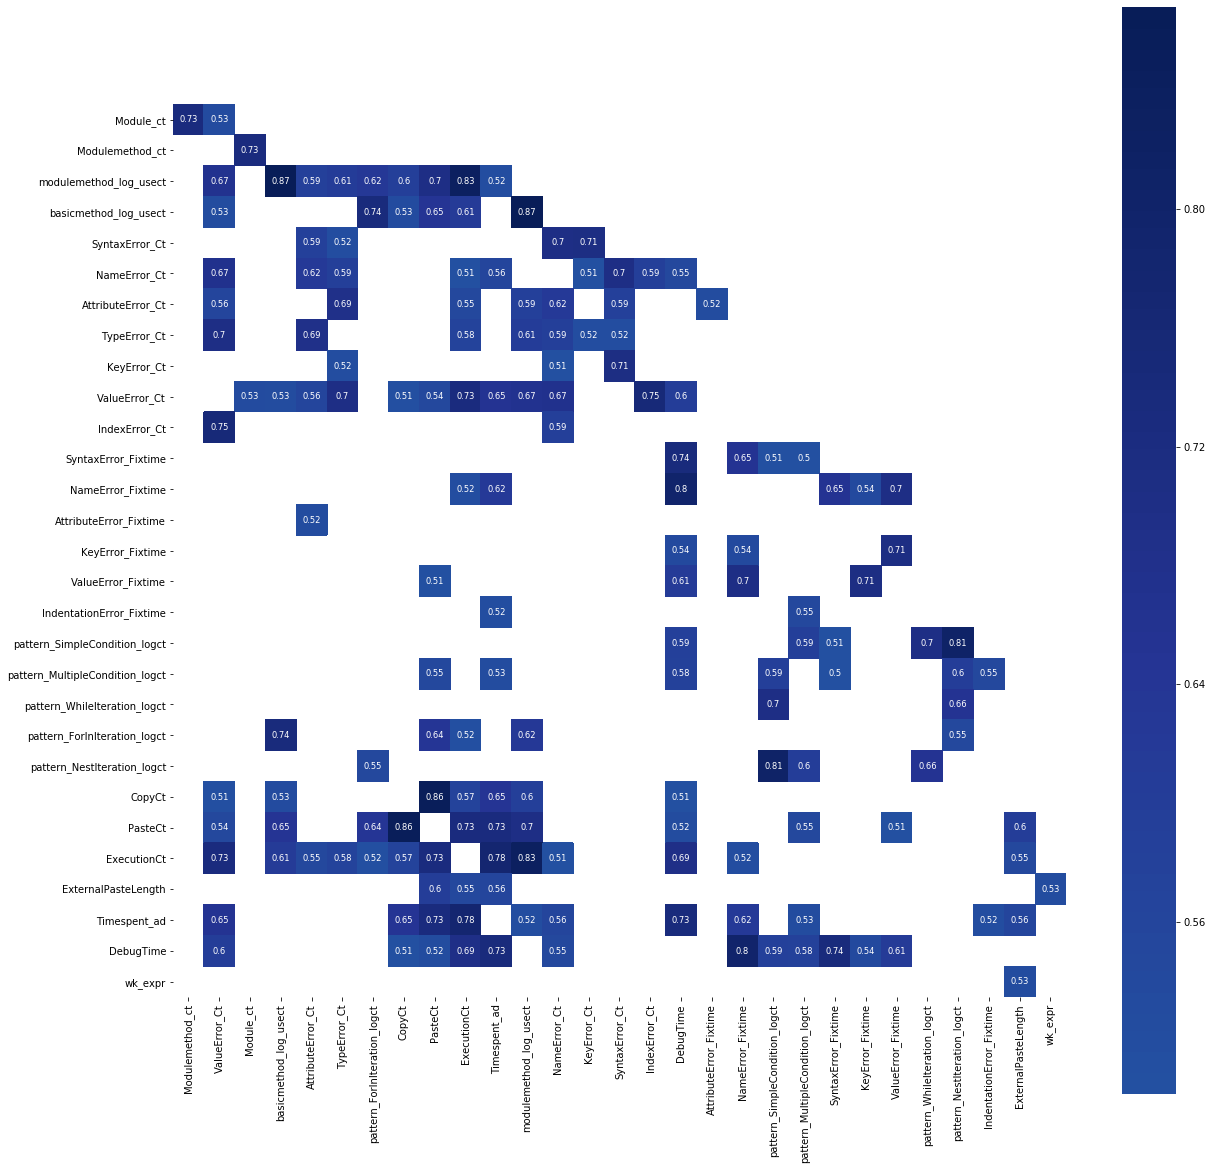

In [136]:
plt.figure(figsize=(20,20))
sns.heatmap(dd2, center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", square=1)

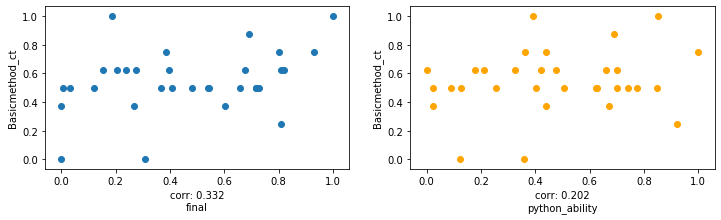

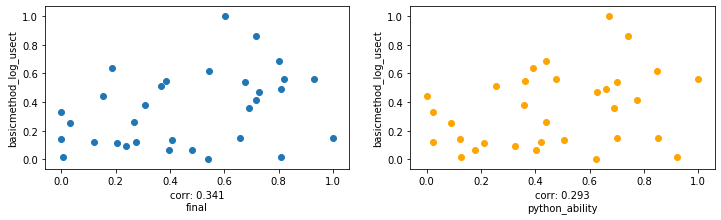

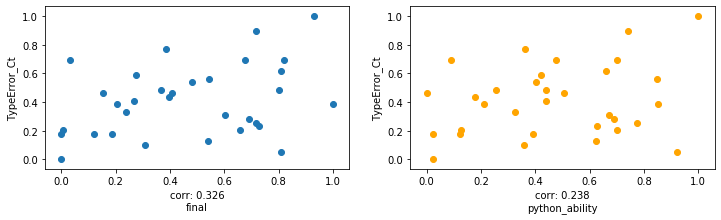

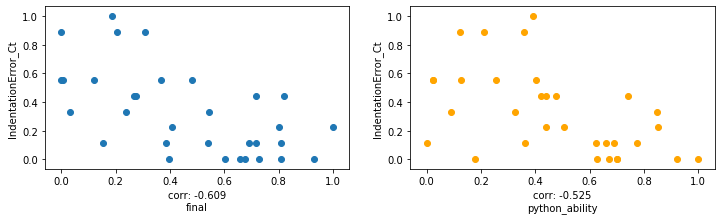

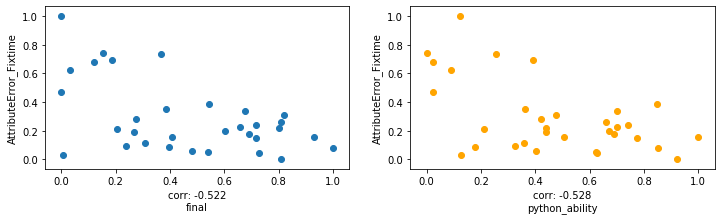

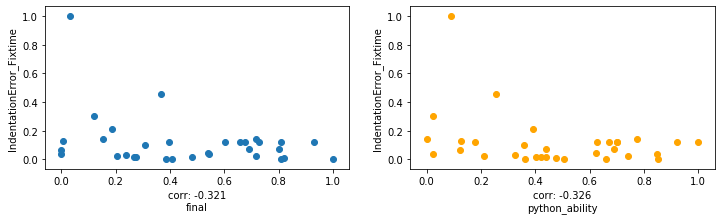

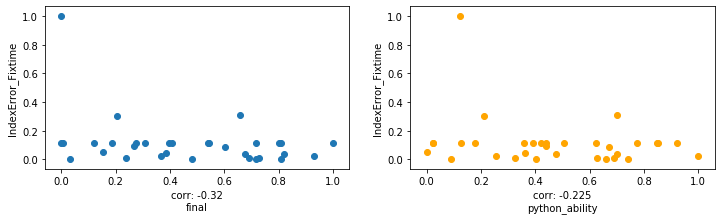

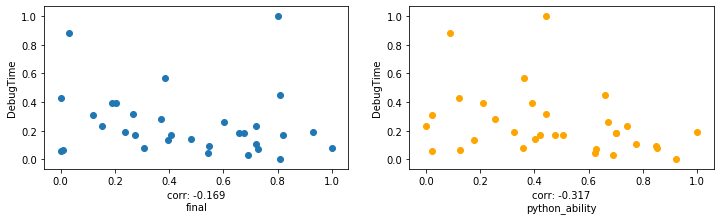

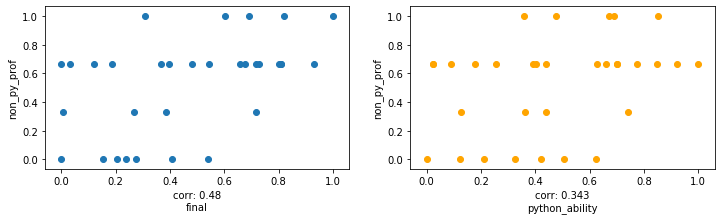

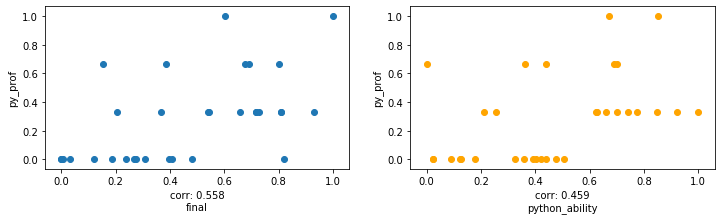

In [74]:
#feature 與 學期成績

cl_list=list(df_log_minmax2.columns)[:-2]

for j in cl_list:
    c=round(df_log_minmax2[["final", j]].corr().loc["final", j], 3)
    c2=round(df_log_minmax2[["python_ability", j]].corr().loc["python_ability", j], 3)
    if abs(c)>0.3 or abs(c2)>0.3:    
        plt.figure(figsize=(12,3))
        plt.subplot(121)
        plt.scatter(df_log_minmax2["final"], df_log_minmax2[j])
        xl="corr: "+str(c)+"\nfinal"
        plt.xlabel(xl)
        plt.ylabel(j)
        plt.subplot(122)
        plt.scatter(df_log_minmax2["python_ability"], df_log_minmax2[j], c="orange")
        plt.xlabel("corr: "+str(c2)+"\npython_ability")
        plt.ylabel(j)
        plt.show()

In [86]:
try1=df_log_minmax2[["python_ability", "final","IndentationError_Fixtime"]].drop(108892602, axis=0)

In [87]:
try1.corr()

python_ability     final  IndentationError_Fixtime
python_ability                  1.000000  0.862057                 -0.233018
final                           0.862057  1.000000                 -0.186705
IndentationError_Fixtime       -0.233018 -0.186705                  1.000000

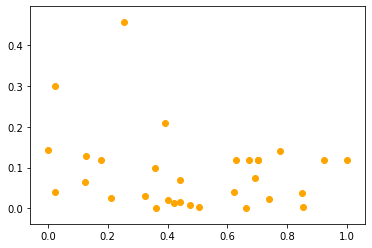

In [80]:
plt.scatter(try1["python_ability"], try1["IndentationError_Fixtime"], c="orange")

In [88]:
try2=df_log_minmax2[["python_ability", "final","IndexError_Fixtime"]].drop(109385601, axis=0)

In [89]:
try2.corr()

python_ability     final  IndexError_Fixtime
python_ability            1.000000  0.864084           -0.055616
final                     0.864084  1.000000           -0.148852
IndexError_Fixtime       -0.055616 -0.148852            1.000000

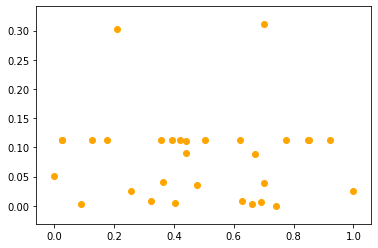

In [83]:
plt.scatter(try2["python_ability"], try2["IndexError_Fixtime"], c="orange")

In [ ]:
        plt.figure(figsize=(12,3))
        plt.subplot(121)
        plt.scatter(df_log_minmax2["final"], df_log_minmax2[j])
        xl="corr: "+str(c)+"\nfinal"
        plt.xlabel(xl)
        plt.ylabel(j)
        plt.subplot(122)
        plt.scatter(df_log_minmax2["python_ability"], df_log_minmax2[j], c="orange")
        plt.xlabel("corr: "+str(c2)+"\npython_ability")
        plt.ylabel(j)
        plt.show()

## Factor analysis (varimax)

In [111]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from factor_analyzer.utils import corr, impute_values, partial_correlations, smc, covariance_to_correlation
from numpy import cov
import math

In [490]:
#rotation method:
#    varimax (orthogonal rotation) ***
#    promax (oblique rotation)
#    oblimin (oblique rotation)
#    oblimax (orthogonal rotation)
#    quartimin (oblique rotation)
#    quartimax (orthogonal rotation) ***
#    equamax (orthogonal rotation)

# #(每一個特徵的)共通性
# print(fc.get_communalities().shape)
# fc.get_communalities()

# #(每一個特徵的)獨立性
# print(fc.get_uniquenesses().shape)
# fc.get_uniquenesses()

# #結構負荷?
# print(fc.loadings_.shape)
# fc.loadings_

# #data轉換
# print(fc.transform(df_st).shape)
# fc.transform(df_st)

#變異數
#variance (numpy array) – The factor variances.變異數值
#proportional_variance (numpy array) – The proportional factor variances.變異數占比
#cumulative_variances (numpy array) – The cumulative factor variances.變異數暫比累加
# fc.get_factor_variance()

In [16]:
df_log_minmax3=df_log_minmax2.iloc[:,:-2]
df_log_minmax3.head()

Module_ct  Modulemethod_ct  Basicmethod_ct  modulemethod_log_usect  \
Username                                                                        
108385601   0.217391         0.809524           0.625                0.100105   
108524010   0.173913         0.000000           0.500                0.000000   
108524012   0.304348         0.190476           0.625                0.614631   
108524013   0.304348         0.095238           0.500                0.377494   
108582604   0.217391         0.238095           0.875                0.314141   

           basicmethod_log_usect  SyntaxError_Ct  NameError_Ct  \
Username                                                         
108385601               0.091554        0.333333      0.315789   
108524010               0.016324        0.208333      0.136842   
108524012               0.491838        0.531250      0.536842   
108524013               0.411639        0.166667      0.294737   
108582604               0.361249        0.145833      0.094737   

           AttributeError_Ct  TypeError_Ct  KeyError_Ct  ValueError_Ct  \
Username                                                                 
108385601           0.292683      0.333333     0.176471       0.131579   
108524010           0.097561      0.205128     0.294118       0.105263   
108524012           0.536585      0.615385     0.882353       0.447368   
108524013           0.268293      0.256410     0.205882       0.315789   
108582604           0.317073      0.282051     0.176471       0.184211   

           IndentationError_Ct  IndexError_Ct  SyntaxError_Fixtime  \
Username                                                             
108385601             0.333333           0.05             0.468723   
108524010             0.555556           0.00             0.213582   
108524012             0.111111           0.05             0.716836   
108524013             0.111111           0.00             0.484485   
108582604             0.111111           0.05             0.000000   

           NameError_Fixtime  AttributeError_Fixtime  TypeError_Fixtime  \
Username                                                                  
108385601           0.440671                0.090454           0.000000   
108524010           0.062661                0.027204           0.077446   
108524012           0.235742                0.261892           1.000000   
108524013           0.048574                0.147954           0.089531   
108582604           0.077087                0.175335           0.081125   

           KeyError_Fixtime  ValueError_Fixtime  IndentationError_Fixtime  \
Username                                                                    
108385601          0.086118            0.089688                  0.030289   
108524010          0.031823            0.021924                  0.128635   
108524012          0.080708            0.009007                  0.000000   
108524013          0.348577            0.023150                  0.140009   
108582604          0.037690            0.032568                  0.074486   

           IndexError_Fixtime  pattern_SimpleCondition_logct  \
Username                                                       
108385601            0.008938                       0.137339   
108524010            0.113441                       0.407725   
108524012            0.002438                       0.725322   
108524013            0.113441                       0.021459   
108582604            0.006771                       0.270386   

           pattern_MultipleCondition_logct  pattern_WhileIteration_logct  \
Username                                                                   
108385601                            0.244                      0.083916   
108524010                            0.084                      0.573427   
108524012                            0.364                      0.489510   
108524013                            0.292                      0.083916   

### Kaiser-Meyer-Olkin Test

In [102]:
x=df_log_minmax3

In [103]:
calculate_kmo(x)

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), nan)

In [118]:
#calculate_kmo??

# calculate the partial correlations
#partial_corr = partial_correlations(x)
partial_corr = pcor
# calcualte the pair-wise correlations
x_corr = corr(x)

# fill matrix diagonals with zeros
# and square all elements
np.fill_diagonal(x_corr, 0)
np.fill_diagonal(partial_corr, 0)

partial_corr = partial_corr**2
x_corr = x_corr**2

# calculate KMO per item
partial_corr_sum = np.sum(partial_corr, axis=0)
corr_sum = np.sum(x_corr, axis=0)
kmo_per_item = corr_sum / (corr_sum + partial_corr_sum)

# calculate KMO overall
corr_sum_total = np.sum(x_corr)
partial_corr_sum_total = np.sum(partial_corr)
kmo_total = corr_sum_total / (corr_sum_total + partial_corr_sum_total)
print(kmo_per_item, kmo_total)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan] nan


In [117]:
numrows, numcols = x.shape
x_cov = cov(x.T, ddof=1)
# create empty array for when we cannot compute the
# matrix inversion
empty_array = np.empty((numcols, numcols))
empty_array[:] = np.nan
#assert np.linalg.det(x_cov) > np.finfo(np.float32).eps
icvx = np.linalg.inv(x_cov)
pcor = -1 * covariance_to_correlation(icvx)
np.fill_diagonal(pcor, 1.0)
pcor

array([[ 1., nan, nan, ..., nan, nan, nan],
       [nan,  1., nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan,  1.]])

In [116]:
pcor.shape

(32, 32)

In [109]:
#partial_correlations??

numrows, numcols = x.shape
x_cov = cov(x, ddof=1)
# create empty array for when we cannot compute the
# matrix inversion
empty_array = np.empty((numcols, numcols))
empty_array[:] = np.nan
if numcols > numrows:
    icvx = empty_array
else:
    # if the determinant is less than the lowest representable
    # 32 bit integer, then we use the pseudo-inverse;
    # otherwise, use the inverse; if a linear algebra error
    # occurs, then we just set the matrix to empty
    try:
        assert np.linalg.det(x_cov) > np.finfo(np.float32).eps
        icvx = np.linalg.inv(x_cov)
    except AssertionError:
        icvx = np.linalg.pinv(x_cov)
        warnings.warn('The inverse of the variance-covariance matrix '
                      'was calculated using the Moore-Penrose generalized '
                      'matrix inversion, due to its determinant being at '
                      'or very close to zero.')
    except np.linalg.LinAlgError:
        icvx = empty_array

pcor = -1 * covariance_to_correlation(icvx)
np.fill_diagonal(pcor, 1.0)
return pcor

In [96]:
calculate_bartlett_sphericity(x)

(3958.2580703409308, 0.0)

In [99]:
#calculate_bartlett_sphericity
n, p = x.shape
x_corr = corr(x)

corr_det = np.linalg.det(x_corr)
statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
degrees_of_freedom = p * (p - 1) / 2
p_value = scipy.stats.chi2.pdf(statistic, degrees_of_freedom)
print( statistic, p_value)

3958.2580703409308 0.0


In [101]:
np.linalg.det(x_corr)

2.3627318061236668e-95

In [80]:
df_log_minmax3_corr=df_log_minmax3.corr()

# mask = np.zeros_like(df_log_minmax3_corr)
# mask[np.triu_indices_from(mask)] = True

In [81]:
df_log_minmax3_corr.shape

(36, 36)

In [85]:
np.linalg.inv(df_log_minmax3_corr)

array([[ 9.63523351e+13, -8.29440762e+13, -6.99285534e+13, ...,
         8.36828652e+13, -4.71698804e+13,  2.83760522e+14],
       [-1.77118105e+14,  5.99445649e+14, -2.17789338e+14, ...,
        -1.13881390e+14, -1.66650387e+14, -2.00117166e+14],
       [-3.30589697e+13, -1.62107651e+14, -4.34503621e+13, ...,
        -4.31800865e+13, -5.67444928e+13,  1.41276093e+14],
       ...,
       [ 8.37486691e+13, -2.13714721e+14, -2.17523779e+13, ...,
         2.26448185e+14,  5.18317724e+13,  3.55686857e+14],
       [-8.44567014e+13, -6.12156149e+13, -1.98135804e+14, ...,
         8.74691770e+13, -8.89709490e+12,  4.47767936e+14],
       [ 2.41533395e+14, -2.09762006e+14,  6.46444497e+13, ...,
         3.57348241e+14,  2.18451616e+14,  4.18436708e+14]])

In [83]:
(np.linalg.inv(df_log_minmax3_corr)[0,1])/math.sqrt(np.linalg.inv(df_log_minmax3_corr)[0,0]*np.linalg.inv(df_log_minmax3_corr)[1,1])

-0.3451273255199358

In [86]:
# KMO测度
def kmo(dataset_corr):
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    A = np.ones((nrow_inv_corr, ncol_inv_corr))
    for i in range(0, nrow_inv_corr, 1):
        for j in range(i, ncol_inv_corr, 1):
            try:
                A[i, j] = -(corr_inv[i, j]) / math.sqrt(corr_inv[i, i] * corr_inv[j, j])
                print(corr_inv[i, j])
                print(math.sqrt(corr_inv[i, i] * corr_inv[j, j]))
                print(A[i,j])
                print("+++++++")
                A[j, i] = A[i, j]
            except:
                print(i,j,corr_inv[i, j],corr_inv[i, i], corr_inv[j, j])
    dataset_corr = np.asarray(dataset_corr)
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    return kmo_value

print("\nKMO测度:", kmo(df_log_minmax3_corr))

96352335126496.84
96352335126496.84
-1.0
+++++++
-82944076154552.81
240328916377737.44
0.3451273255199358
+++++++
0 2 -69928553435452.305 96352335126496.84 -43450362129555.13
839831003728663.8
294676377937879.8
-2.8500112890138314
+++++++
-455883169497745.9
209074821647785.7
2.180478576543959
+++++++
-176613881442774.88
187060848340181.03
0.9441520393492082
+++++++
0 6 -590087400483.7605 96352335126496.84 -377354394495608.06
49091957242063.414
31989205206687.08
-1.534641355572071
+++++++
-11605657405690.672
159242741407455.7
0.07288029145388286
+++++++
79316059930428.81
49011063041634.21
-1.6183297200277198
+++++++
-254687800568158.28
521877565147372.2
0.48802212928282784
+++++++
0 11 121381350464668.97 96352335126496.84 -43408568241416.89
347192893420397.75
830907424838334.8
-0.4178478649266484
+++++++
165026634644456.84
264816368677929.44
-0.6231738448357126
+++++++
270448494577539.06
621453973000944.0
-0.43518668530119486
+++++++
-49638945246554.516
469493617871989.56
0.105728690139

-236946121976582.47
468044004146728.7
0.5062475320211589
+++++++
-480770981043058.4
773926086524908.1
0.6212104610684747
+++++++
-924676896888840.5
1383691556988280.8
0.6682680776787251
+++++++
-671797747603689.0
647009292808597.9
1.038312362852606
+++++++
1124654860190384.9
1798345297471387.2
-0.6253831573790287
+++++++
946920457459784.4
2482250199011434.0
-0.38147663673746474
+++++++
248520492839337.75
517818532366524.0
-0.4799374246100353
+++++++
22 34 297904794895529.56 1184094421120867.8 -8897094902278.594
495031476222260.1
703895284307976.8
-0.7032743182942933
+++++++
-62240037423587.04
62240037423587.04
1.0
+++++++
23 24 -145610266321100.38 -62240037423587.04 593053100359276.5
23 25 -233168929697738.6 -62240037423587.04 1900519630614916.5
23 26 -270998813767311.2 -62240037423587.04 762412405276439.9
23 27 233285685489847.34 -62240037423587.04 185006521363672.28
23 28 -115662717557534.83 -62240037423587.04 505839379630537.0
23 29 38640040205795.92 -62240037423587.04 1616933827851

In [88]:
from scipy.stats import bartlett
# 巴特利特球形检验
xx=[]
for i in range(36):
    xx.append(df_log_minmax3_corr.values[i])
print("\n巴特利特球形检验:", bartlett(*xx))


巴特利特球形检验: BartlettResult(statistic=15.84414580987153, pvalue=0.9977829899907495)


In [90]:
df_log_minmax3_corr.values[1]

array([ 7.30924248e-01,  1.00000000e+00,  2.15350716e-01,  1.34970272e-01,
        5.57159333e-02,  1.15606442e-01,  3.39457553e-01,  3.41704945e-01,
        3.06410122e-01,  4.92922274e-02,  4.19317802e-01, -2.83605676e-01,
        2.38769476e-01, -1.14696033e-02,  2.87336551e-01,  1.63676739e-01,
       -1.28631193e-01, -8.91752428e-02,  6.09727581e-02,  3.00620532e-01,
       -1.13555323e-01, -7.13383633e-04,  2.10233598e-01,  8.03949910e-02,
        2.33424789e-01,  1.65508012e-01, -1.84753928e-01,  6.27950367e-02,
        1.67413445e-01,  2.95781369e-01,  3.36428379e-01,  4.14192729e-01,
        2.28704280e-01,  2.44991982e-01,  1.66487301e-03,  8.48450871e-02])

### factor number assessment

In [17]:
df_log_minmax3.shape

(32, 36)

===因素數:2個 ===========================================
9.066 => 4.346
0.252 => 0.373


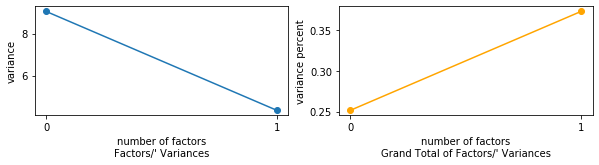

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


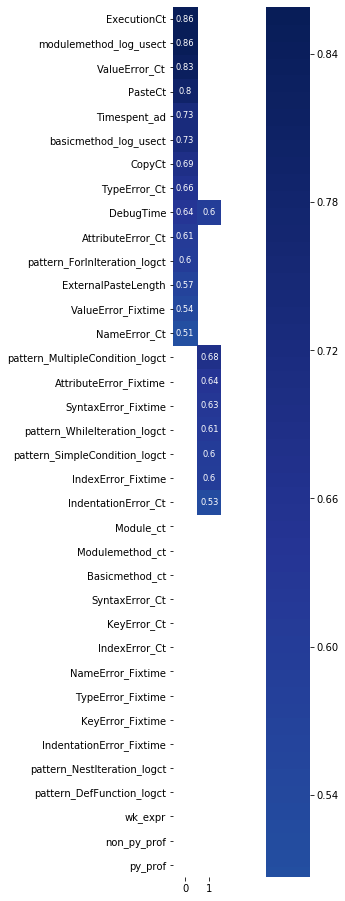

===因素數:3個 ===========================================
6.612 => 5.73 => 4.021
0.184 => 0.343 => 0.455


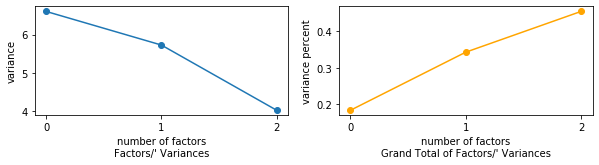

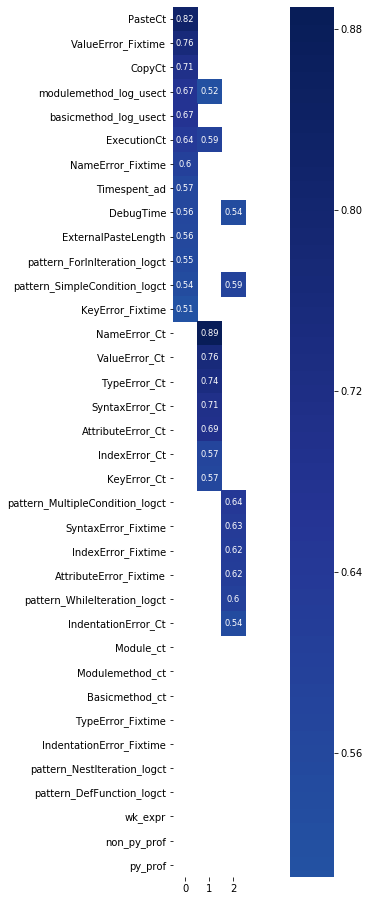

===因素數:4個 ===========================================
5.596 => 5.063 => 4.371 => 3.951
0.155 => 0.296 => 0.417 => 0.527


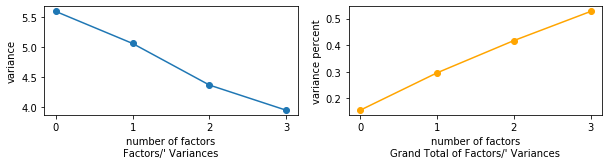

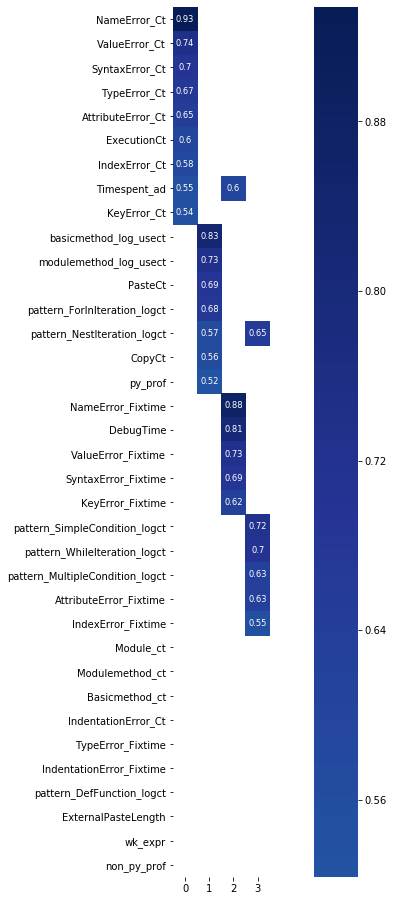

===因素數:5個 ===========================================
5.557 => 5.371 => 4.245 => 3.894 => 2.309
0.154 => 0.304 => 0.421 => 0.53 => 0.594


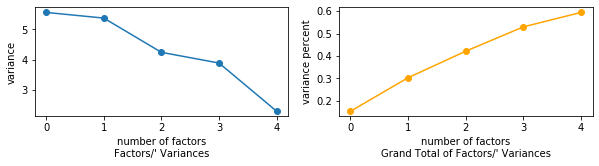

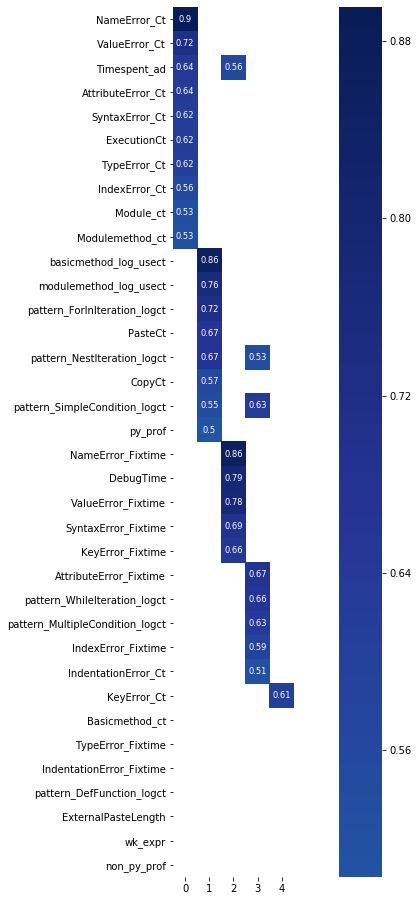

===因素數:6個 ===========================================
6.071 => 4.28 => 4.119 => 3.488 => 2.636 => 2.58
0.169 => 0.288 => 0.402 => 0.499 => 0.572 => 0.644


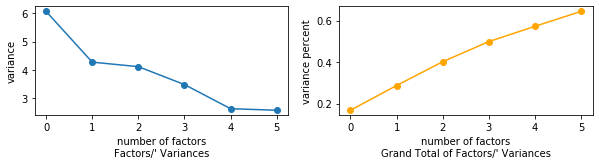

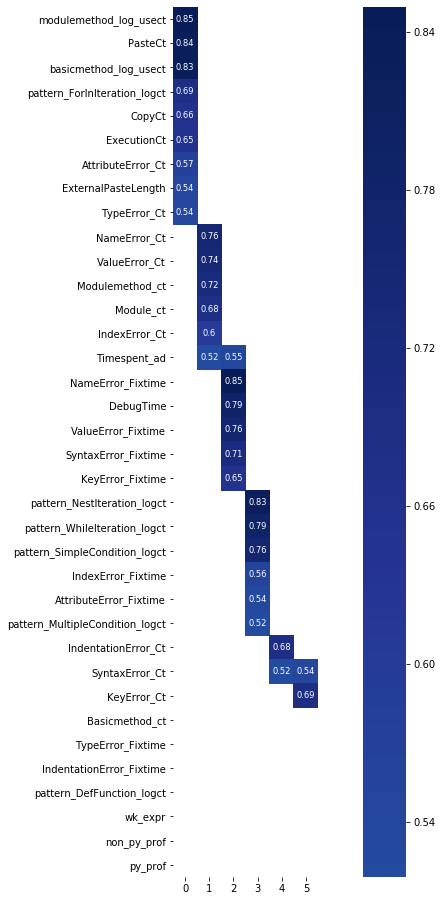

===因素數:7個 ===========================================
5.819 => 4.049 => 3.856 => 3.467 => 2.699 => 2.518 => 2.341
0.162 => 0.274 => 0.381 => 0.478 => 0.552 => 0.622 => 0.687


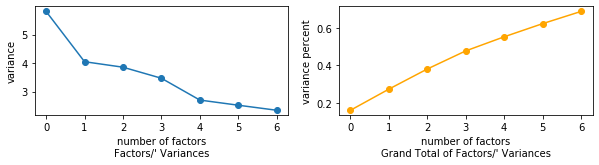

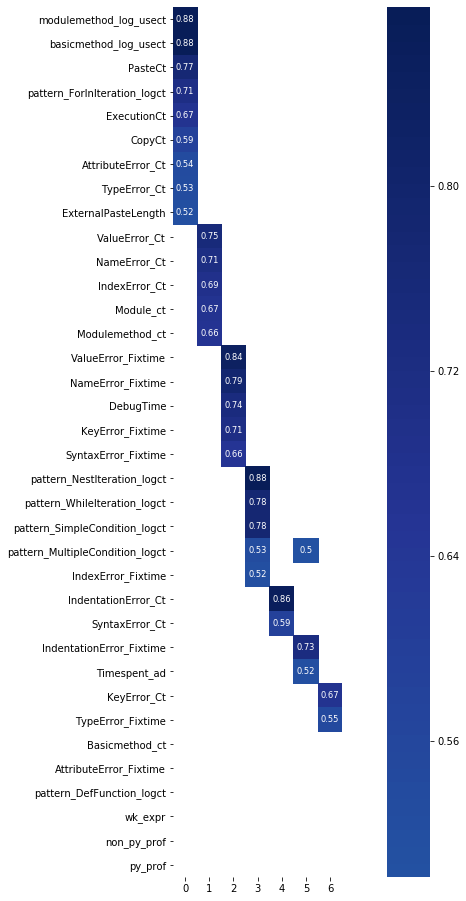

===因素數:8個 ===========================================
5.962 => 3.825 => 3.821 => 3.492 => 2.684 => 2.447 => 2.307 => 1.454
0.166 => 0.272 => 0.378 => 0.475 => 0.55 => 0.618 => 0.682 => 0.722


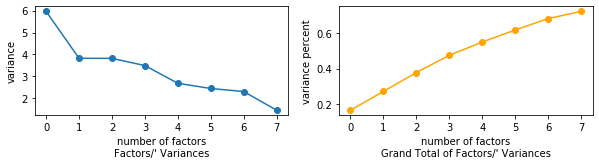

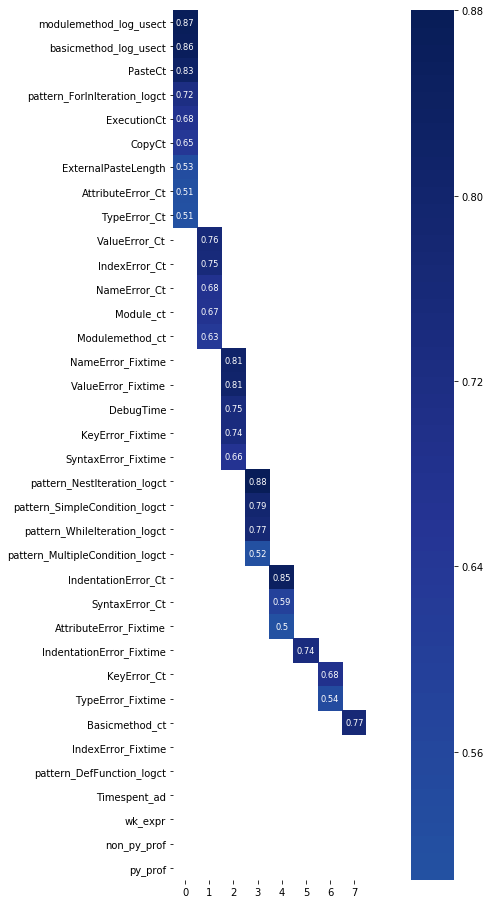

===因素數:9個 ===========================================
5.795 => 3.8 => 3.612 => 2.821 => 2.694 => 2.476 => 2.374 => 2.218 => 1.484
0.161 => 0.267 => 0.367 => 0.445 => 0.52 => 0.589 => 0.655 => 0.716 => 0.758


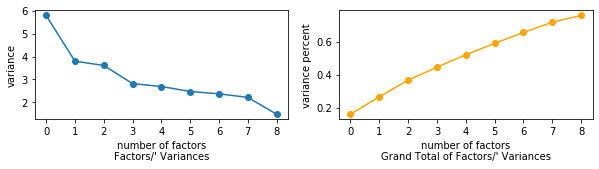

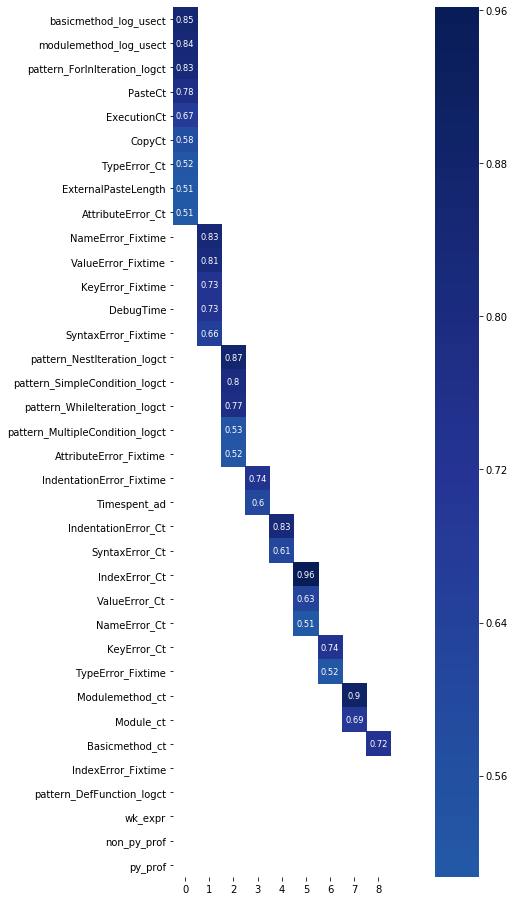

In [58]:
var_final=[]
for i in range(2,10):
    print("===因素數:"+str(i)+"個 ===========================================")
    fc=FactorAnalyzer(n_factors=i, rotation='varimax', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median')
    fc.fit(df_log_minmax3)
    var_list=list(map(lambda x: str(round(x, 3)), fc.get_factor_variance()[0]))
    var_perc_list=list(map(lambda x: str(round(x, 3)), fc.get_factor_variance()[2]))
    var_final.append(var_perc_list[-1])
    print(" => ".join(var_list))
    print(" => ".join(var_perc_list))
    plt.figure(figsize=(10,2))
    plt.subplot(121)
    plt.plot(range(len(fc.get_factor_variance()[0])), list(fc.get_factor_variance()[0]), marker="o")
    plt.xticks(np.arange(i, step=1))
    plt.xlabel("number of factors\nFactors/' Variances")
    plt.ylabel("variance")
    plt.subplot(122)
    plt.plot(range(len(fc.get_factor_variance()[0])), list(fc.get_factor_variance()[2]), marker="o", color="orange")
    plt.xticks(np.arange(i, step=1))
    plt.xlabel("number of factors\nGrand Total of Factors/' Variances")
    plt.ylabel("variance percent")
    plt.show()
    
    plt.figure(figsize=(16,16))
    df_log_fc=pd.DataFrame(fc.loadings_, index=df_log_minmax3.columns)
    df_log_fc=df_log_fc[df_log_fc>0.5].sort_values(list(range(i)), ascending=False)
    sns.heatmap(df_log_fc, center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", square=1)
    plt.show()

0.373 => 0.455 => 0.527 => 0.594 => 0.644 => 0.687 => 0.722 => 0.758


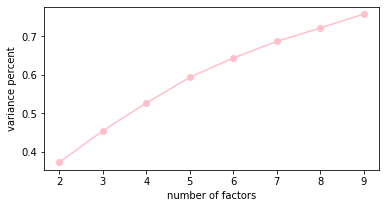

In [59]:
print(" => ".join(var_final))
var_final=list(map(lambda x: float(x), var_final))
plt.figure(figsize=(6,3))
plt.plot(range(2,10), var_final, marker="o", color="pink")
plt.xlabel("number of factors")
plt.ylabel("variance percent")
plt.show()

### factor number = 4

In [17]:
fc=FactorAnalyzer(n_factors=4, rotation='varimax', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median')
fc.fit(df_log_minmax3)
df_log_fc=pd.DataFrame(fc.loadings_, columns=list("ABCD"), index=df_log_minmax3.columns)
df_log_fc["共通性"]=fc.get_communalities()
df_log_fc["獨立性"]=fc.get_uniquenesses()
#df_log_fc

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


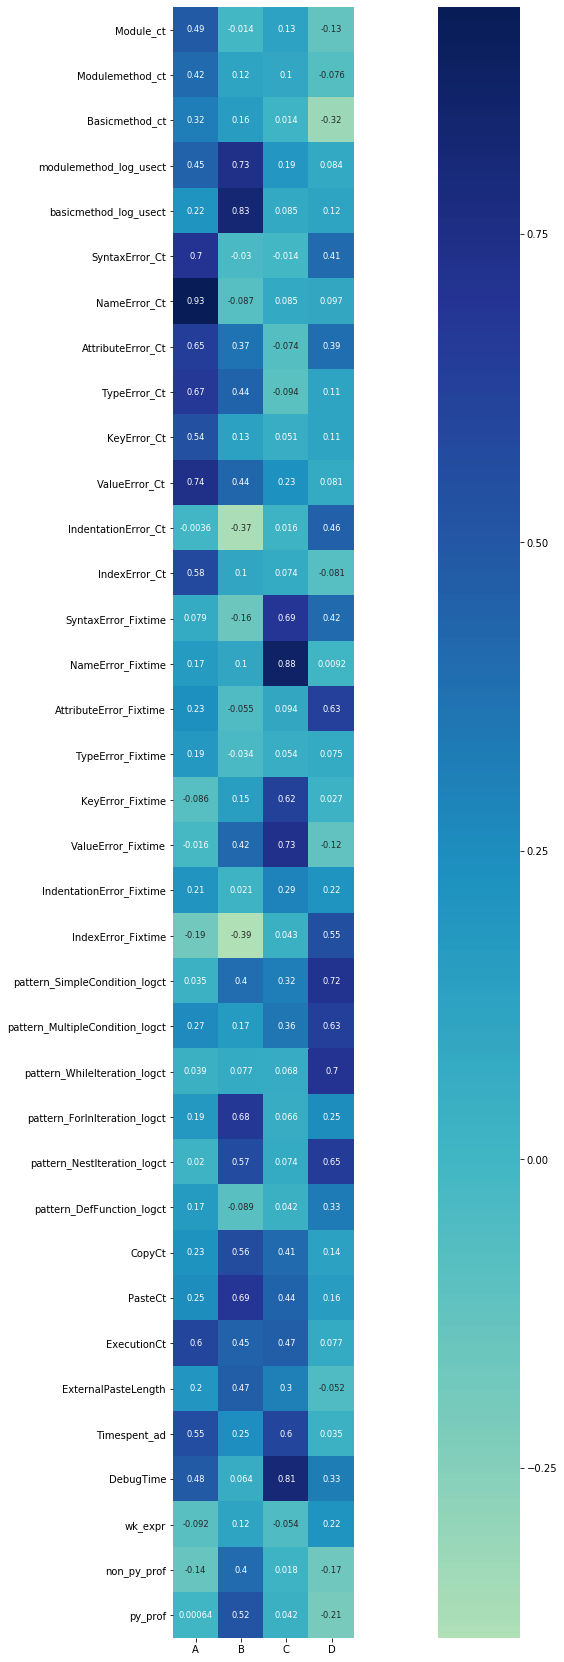

In [18]:
plt.figure(figsize=(30,30))

#df_log_fc.to_excel("semesterlog_factor_varimax4.xlsx")
sns.heatmap(df_log_fc.iloc[:,:-2], center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", square=1)
plt.show()

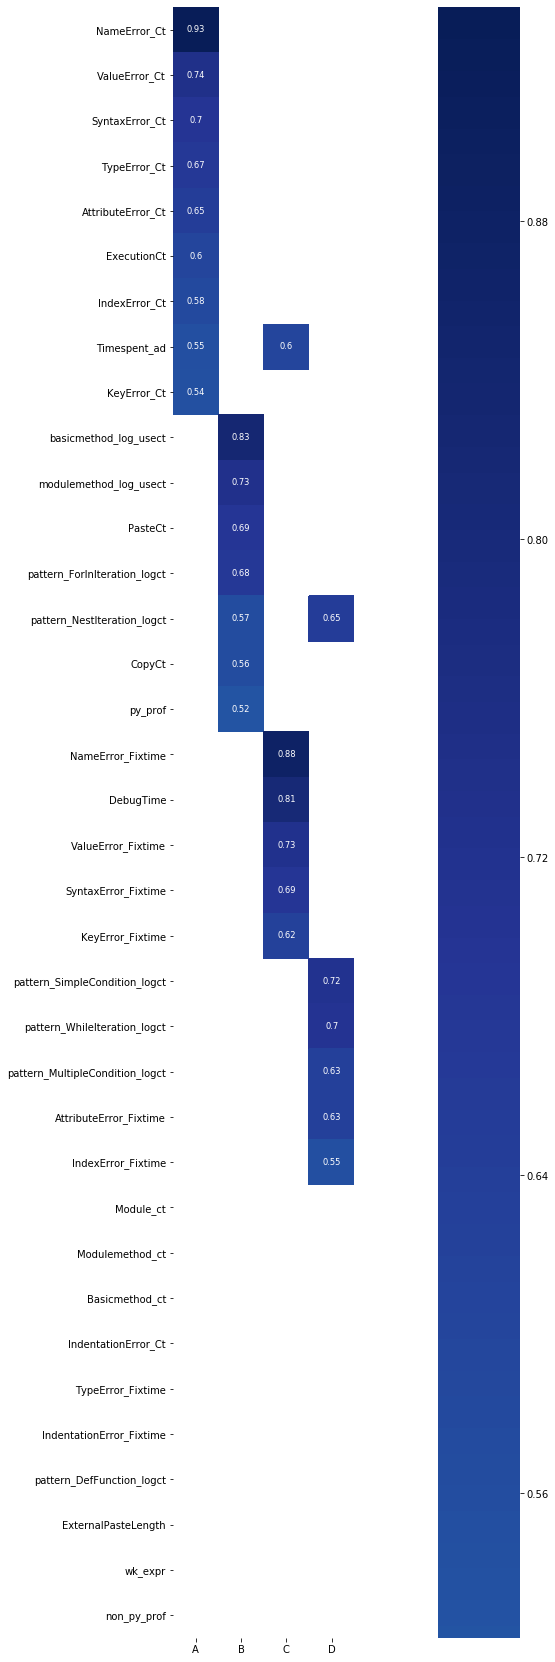

In [19]:
plt.figure(figsize=(30,30))
df_log_fcx=df_log_fc[df_log_fc>0.5].sort_values(list("ABCD"), ascending=False)
sns.heatmap(df_log_fcx.iloc[:,:-2], center=0, annot=True, annot_kws={"fontsize":"small"}, cmap="YlGnBu", square=1)

In [419]:
# fc5=FactorAnalyzer(n_factors=5, rotation='varimax', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median')
# fc5.fit(df_log_minmax3)
# df_log_fc5=pd.DataFrame(fc5.loadings_, columns=list("ABCDE"), index=df_log_minmax3.columns)
# df_log_fc5["共通性"]=fc5.get_communalities()
# df_log_fc5["獨立性"]=fc5.get_uniquenesses()
# #df_log_fc
# #df_log_fc=df_log_fc.sort_values("A", ascending=False)
# df_log_fc5.to_excel("semesterlog_factor_varimax5.xlsx")

# Classifier

In [69]:
#week_log=week_log.set_index("Username")
#week_log=week_log.reset_index(drop=False)
week_log.head(20)

Username  WeekNumber  SyntaxError_Ct  NameError_Ct  AttributeError_Ct  \
0   108385601           0               0             0                  0   
1   108385601           2               0             0                  0   
2   108385601           3              12             1                  1   
3   108385601           4               6             4                  1   
4   108385601           5               3             2                  0   
5   108385601           6               4             3                  2   
6   108385601           7               0             1                  2   
7   108385601           8               5             5                  0   
8   108385601           9               0             0                  0   
9   108385601          11               2             4                  2   
10  108385601          12               0             3                  2   
11  108385601          13               2             4                  5   
12  108385601          14               0             0                  0   
13  108385601          15               1             0                  0   
14  108385601          16               0             4                  0   
15  108524010           0               0             0                  0   
16  108524010           2               0             0                  0   
17  108524010           3               4             3                  0   
18  108524010           4               4             3                  0   
19  108524010           5               6             0                  0   

    TypeError_Ct  KeyError_Ct  ValueError_Ct  IndentationError_Ct  \
0              0            0              0                    0   
1              0            0              0                    0   
2              2            0              0                    2   
3              2            0              0                    0   
4              0            0              0                    0   
5              4            0              0                    0   
6              2            0              2                    0   
7              1            1              0                    0   
8              1            0              0                    0   
9              2            0              0                    0   
10             0            0              1                    0   
11             0            0              1                    1   
12             1            0              0                    0   
13             0            0              0                    0   
14             1            6              1                    0   
15             0            0              0                    0   
16             0            0              0                    0   
17             2            0              0                    1   
18             2            0              0                    0   
19             1            0              1                    4   

    IndexError_Ct  SyntaxError_Fixtime  NameError_Fixtime  \
0               0                  NaN                NaN   
1               0                  NaN                NaN   
2               0           194.166667          14.000000   
3               1           840.833333         564.750000   
4               0            66.000000          81.000000   
5               0           193.000000          16.666667   
6               0                  NaN          27.000000   
7               0            32.800000        1138.250000   
8               0                  NaN                NaN   
9               0           123.000000          25.750000   
10              0                  NaN          61.500000   
11              0            48.000000          29.333333   
12              0                  NaN                NaN   
13              0            37.000000                NaN   
1

In [ ]:
df_scorengroup.head()

## Week Data => final_hl

■■■■■■■■■■【week 1】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
0         1.0   F1_score  0.722222  0.731707    0.684211      0.666667   
1         1.0  Precision  0.650000  0.600000    0.590909      0.600000   
2         1.0     Recall  0.812500  0.937500    0.812500      0.750000   
3         1.0   Accuracy  0.687500  0.656250    0.625000      0.625000   

   RandomForest  
0      0.722222  
1      0.650000  
2      0.812500  
3      0.687500

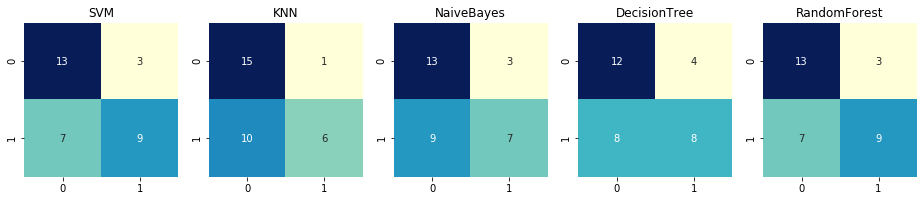

■■■■■■■■■■【week 2】■■■■■■■■■■


WeekNumber    Metrics       SVM     KNN  Naivebayes  DecisionTree  \
4         2.0   F1_score  0.705882  0.6875    0.702703      0.777778   
5         2.0  Precision  0.666667  0.6875    0.619048      0.700000   
6         2.0     Recall  0.750000  0.6875    0.812500      0.875000   
7         2.0   Accuracy  0.687500  0.6875    0.656250      0.750000   

   RandomForest  
4      0.823529  
5      0.777778  
6      0.875000  
7      0.812500

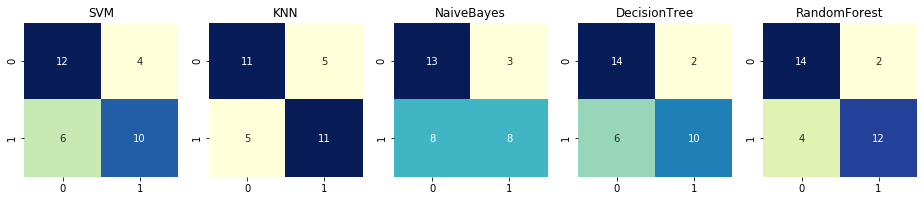

■■■■■■■■■■【week 3】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
8          3.0   F1_score  0.6875  0.648649    0.685714      0.714286   
9          3.0  Precision  0.6875  0.571429    0.631579      0.833333   
10         3.0     Recall  0.6875  0.750000    0.750000      0.625000   
11         3.0   Accuracy  0.6875  0.593750    0.656250      0.750000   

    RandomForest  
8       0.722222  
9       0.650000  
10      0.812500  
11      0.687500

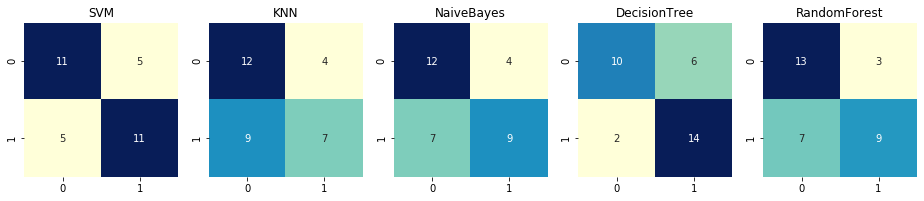

■■■■■■■■■■【week 4】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
12         4.0   F1_score  0.666667  0.666667    0.500000      0.600000   
13         4.0  Precision  0.647059  0.600000    0.583333      0.642857   
14         4.0     Recall  0.687500  0.750000    0.437500      0.562500   
15         4.0   Accuracy  0.656250  0.625000    0.562500      0.625000   

    RandomForest  
12      0.588235  
13      0.555556  
14      0.625000  
15      0.562500

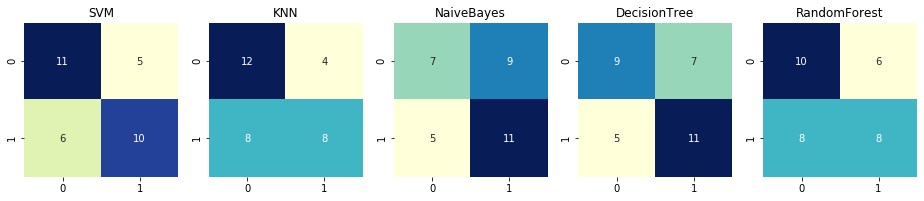

■■■■■■■■■■【week 5】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
16         5.0   F1_score  0.777778  0.628571    0.518519      0.551724   
17         5.0  Precision  0.700000  0.578947    0.636364      0.615385   
18         5.0     Recall  0.875000  0.687500    0.437500      0.500000   
19         5.0   Accuracy  0.750000  0.593750    0.593750      0.593750   

    RandomForest  
16      0.685714  
17      0.631579  
18      0.750000  
19      0.656250

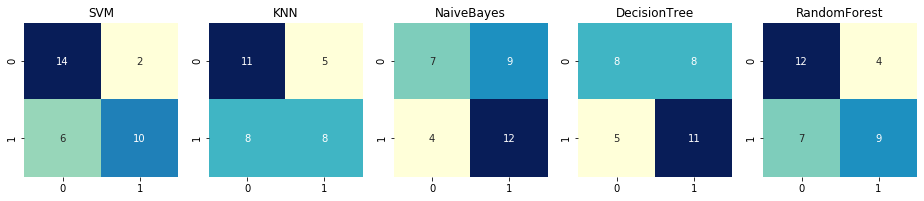

■■■■■■■■■■【week 6】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
20         6.0   F1_score  0.833333  0.736842    0.615385      0.645161   
21         6.0  Precision  0.750000  0.636364    0.800000      0.666667   
22         6.0     Recall  0.937500  0.875000    0.500000      0.625000   
23         6.0   Accuracy  0.812500  0.687500    0.687500      0.656250   

    RandomForest  
20      0.684211  
21      0.590909  
22      0.812500  
23      0.625000

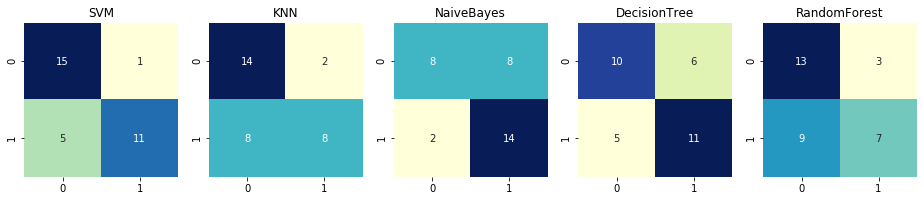

■■■■■■■■■■【week 7】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
24         7.0   F1_score  0.647059  0.700000    0.709677      0.742857   
25         7.0  Precision  0.611111  0.583333    0.733333      0.684211   
26         7.0     Recall  0.687500  0.875000    0.687500      0.812500   
27         7.0   Accuracy  0.625000  0.625000    0.718750      0.718750   

    RandomForest  
24      0.529412  
25      0.500000  
26      0.562500  
27      0.500000

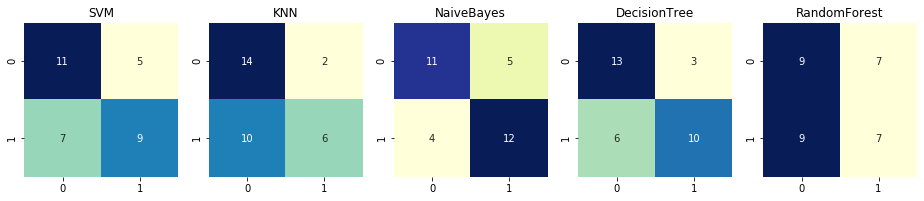

■■■■■■■■■■【week 8】■■■■■■■■■■


WeekNumber    Metrics   SVM       KNN  Naivebayes  DecisionTree  \
28         8.0   F1_score  0.75  0.700000    0.645161         0.625   
29         8.0  Precision  0.75  0.583333    0.666667         0.625   
30         8.0     Recall  0.75  0.875000    0.625000         0.625   
31         8.0   Accuracy  0.75  0.625000    0.656250         0.625   

    RandomForest  
28      0.756757  
29      0.666667  
30      0.875000  
31      0.718750

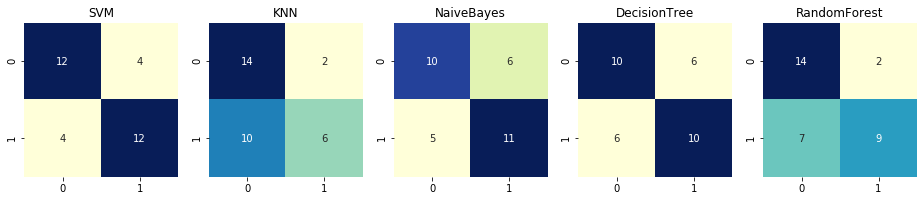

■■■■■■■■■■【week 9】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
32         9.0   F1_score  0.645161  0.615385       0.625           0.5   
33         9.0  Precision  0.666667  0.521739       0.625           0.5   
34         9.0     Recall  0.625000  0.750000       0.625           0.5   
35         9.0   Accuracy  0.656250  0.531250       0.625           0.5   

    RandomForest  
32      0.647059  
33      0.611111  
34      0.687500  
35      0.625000

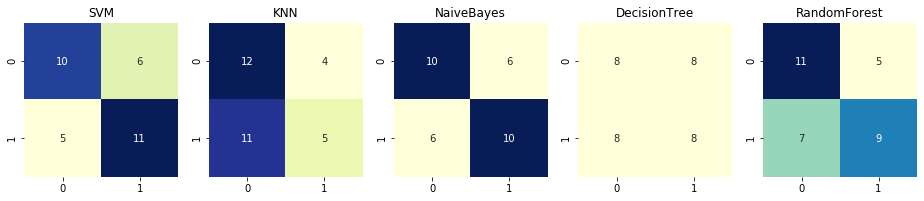

■■■■■■■■■■【week 11】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
36        11.0   F1_score  0.606061  0.650000    0.620690      0.533333   
37        11.0  Precision  0.588235  0.541667    0.692308      0.571429   
38        11.0     Recall  0.625000  0.812500    0.562500      0.500000   
39        11.0   Accuracy  0.593750  0.562500    0.656250      0.562500   

    RandomForest  
36        0.5625  
37        0.5625  
38        0.5625  
39        0.5625

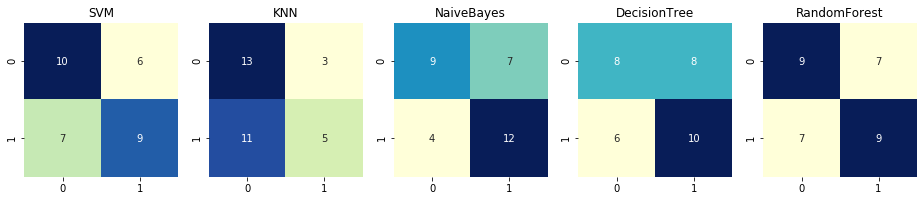

■■■■■■■■■■【week 12】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
40        12.0   F1_score  0.516129  0.666667      0.6875      0.666667   
41        12.0  Precision  0.533333  0.600000      0.6875      0.647059   
42        12.0     Recall  0.500000  0.750000      0.6875      0.687500   
43        12.0   Accuracy  0.531250  0.625000      0.6875      0.656250   

    RandomForest  
40      0.606061  
41      0.588235  
42      0.625000  
43      0.593750

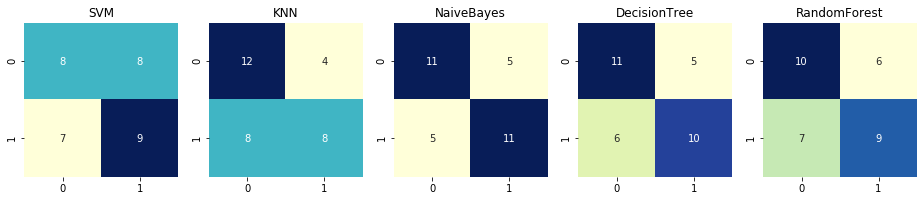

■■■■■■■■■■【week 13】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
44        13.0   F1_score  0.645161  0.666667       0.625      0.451613   
45        13.0  Precision  0.666667  0.600000       0.625      0.466667   
46        13.0     Recall  0.625000  0.750000       0.625      0.437500   
47        13.0   Accuracy  0.656250  0.625000       0.625      0.468750   

    RandomForest  
44      0.606061  
45      0.588235  
46      0.625000  
47      0.593750

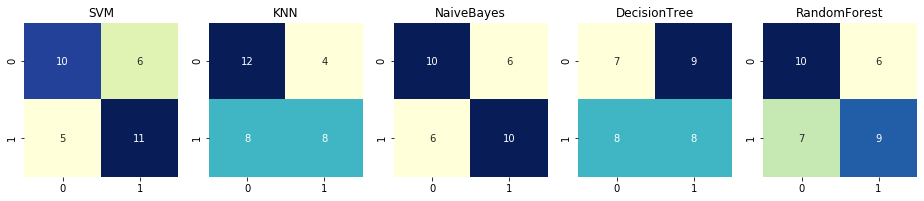

■■■■■■■■■■【week 14】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
48        14.0   F1_score  0.666667  0.631579    0.689655      0.620690   
49        14.0  Precision  0.647059  0.545455    0.769231      0.692308   
50        14.0     Recall  0.687500  0.750000    0.625000      0.562500   
51        14.0   Accuracy  0.656250  0.562500    0.718750      0.656250   

    RandomForest  
48         0.625  
49         0.625  
50         0.625  
51         0.625

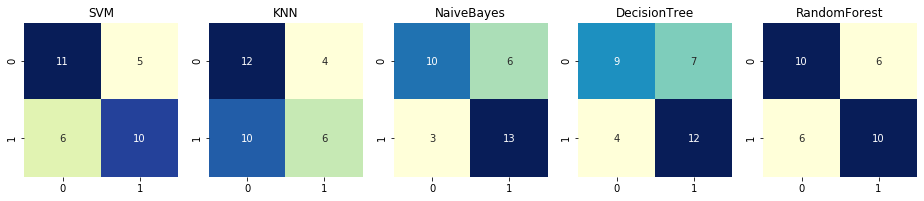

■■■■■■■■■■【week 15】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
52        15.0   F1_score  0.647059  0.685714    0.645161      0.600000   
53        15.0  Precision  0.611111  0.631579    0.666667      0.642857   
54        15.0     Recall  0.687500  0.750000    0.625000      0.562500   
55        15.0   Accuracy  0.625000  0.656250    0.656250      0.625000   

    RandomForest  
52      0.777778  
53      0.700000  
54      0.875000  
55      0.750000

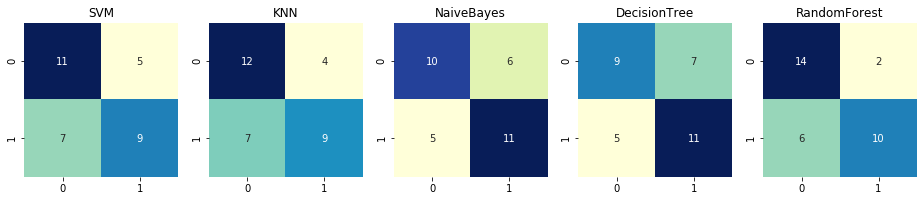

■■■■■■■■■■【week 16】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
56        16.0   F1_score  0.733333  0.628571    0.787879      0.428571   
57        16.0  Precision  0.785714  0.578947    0.764706      0.500000   
58        16.0     Recall  0.687500  0.687500    0.812500      0.375000   
59        16.0   Accuracy  0.750000  0.593750    0.781250      0.500000   

    RandomForest  
56      0.606061  
57      0.588235  
58      0.625000  
59      0.593750

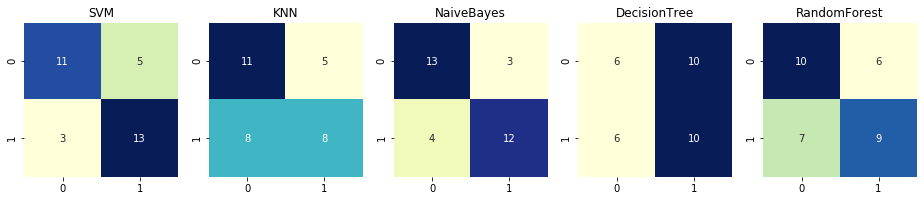

In [41]:
group_type="final_hl"
week_log=week_log.sort_values("WeekNumber")
df_wkgt_final_hl=pd.DataFrame()
n=0
for w in list(set(week_log["WeekNumber"])):
    print("■■■■■■■■■■【week "+str(w)+"】■■■■■■■■■■")
 
    weekly_grand_total=week_log[week_log["WeekNumber"]<=w]
    weekly_gt_1=weekly_grand_total[["Username",
        'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
        'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
        'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
        'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
        'modulemethod_log_usect', 'basicmethod_log_usect',
        'Timespent_ad', 'DebugTime']].groupby("Username").sum().reset_index(drop=False) 
    weekly_gt_2=weekly_grand_total[["Username",
        'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct']].drop_duplicates(["Username"], keep="last")
    weekly_gt_3=weekly_grand_total[["Username",
        'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime', 
        'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime']].groupby("Username").mean().reset_index(drop=False) 
    weekly_gt_2=weekly_gt_2.rename(columns={'Grand_Module_ct':"Module_ct", 'Grand_modulemethod_ct':"Modulemethod_ct", 'Grand_basicmethod_ct':'Basicmethod_ct'})
    weekly_grand_total=pd.merge(weekly_gt_1, weekly_gt_2, on="Username", how="left")
    weekly_grand_total=pd.merge(weekly_grand_total, weekly_gt_3, on="Username", how="left")    
    weekly_grand_total=pd.merge(weekly_grand_total, df_log_values[['wk_expr', 'non_py_prof', 'py_prof']], on="Username", how="left")
    od=["Username"]+list(df_log_minmax3.columns)
    weekly_grand_total=weekly_grand_total[od].set_index("Username")
    for cl in weekly_grand_total.columns:
        if len(weekly_grand_total[pd.isnull(weekly_grand_total[cl])])!=0:
            #print(cl)
            mm=np.nanmean(weekly_grand_total[cl])
            if pd.isnull(mm):
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(0)                
            else:
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(mm)
    
    minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
    weekly_gt_minmax=minmax.fit_transform(weekly_grand_total)
    weekly_gt_minmax=pd.DataFrame(data=weekly_gt_minmax, columns=list(weekly_grand_total.columns), index=weekly_grand_total.index)
    weekly_gt_minmax=pd.merge(weekly_gt_minmax, df_scorengroup[[group_type]], on="Username", how="left")
    
    #display(weekly_gt_minmax.head())
    
    kf=KFold(n_splits=10,shuffle=True)
    predicted1=[]; expected1=[]
    predicted2=[]; expected2=[]
    predicted3=[]; expected3=[]
    predicted4=[]; expected4=[]
    predicted5=[]; expected5=[]

    for i,j in kf.split(weekly_gt_minmax): ###
        classifier1=SVC(gamma="scale")
        classifier2=KNeighborsClassifier()
        classifier3=DecisionTreeClassifier()
        classifier4=GaussianNB()
        classifier5=RandomForestClassifier(n_estimators=20,random_state=0)

        tr_x=np.array(weekly_gt_minmax.iloc[:,:-1])[i]
        tr_y=np.array(list(weekly_gt_minmax.iloc[:,-1]))[i] 
        te_x=np.array(weekly_gt_minmax.iloc[:,:-1])[j] 
        te_y=np.array(list(weekly_gt_minmax.iloc[:,-1]))[j] 

        classifier1.fit(tr_x,tr_y)
        expected1.extend(te_y)
        predicted1.extend(classifier1.predict(te_x))

        classifier2.fit(tr_x,tr_y)
        expected2.extend(te_y)
        predicted2.extend(classifier2.predict(te_x))

        classifier3.fit(tr_x,tr_y)
        expected3.extend(te_y)
        predicted3.extend(classifier3.predict(te_x))

        classifier4.fit(tr_x,tr_y)
        expected4.extend(te_y)
        predicted4.extend(classifier4.predict(te_x))

        classifier5.fit(tr_x,tr_y)
        expected5.extend(te_y)
        predicted5.extend(classifier5.predict(te_x))

    df_wkgt_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl.loc[n,"Metrics"]= "F1_score"
    df_wkgt_final_hl.loc[n,"SVM"]=metrics.f1_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl.loc[n,"KNN"]=metrics.f1_score(expected2,predicted2, pos_label=0)    
    df_wkgt_final_hl.loc[n,"Naivebayes"]=metrics.f1_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl.loc[n,"DecisionTree"]=metrics.f1_score(expected3,predicted3, pos_label=0)    
    df_wkgt_final_hl.loc[n,"RandomForest"]=metrics.f1_score(expected5,predicted5, pos_label=0)    
    n+=1
    df_wkgt_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl.loc[n,"Metrics"]= "Precision"
    df_wkgt_final_hl.loc[n,"SVM"]=metrics.precision_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl.loc[n,"KNN"]=metrics.precision_score(expected2,predicted2, pos_label=0)
    df_wkgt_final_hl.loc[n,"Naivebayes"]=metrics.precision_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl.loc[n,"DecisionTree"]=metrics.precision_score(expected3,predicted3, pos_label=0)
    df_wkgt_final_hl.loc[n,"RandomForest"]=metrics.precision_score(expected5,predicted5, pos_label=0)
    n+=1
    df_wkgt_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl.loc[n,"Metrics"]= "Recall"    
    df_wkgt_final_hl.loc[n,"SVM"]=metrics.recall_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl.loc[n,"KNN"]=metrics.recall_score(expected2,predicted2, pos_label=0)
    df_wkgt_final_hl.loc[n,"Naivebayes"]=metrics.recall_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl.loc[n,"DecisionTree"]=metrics.recall_score(expected3,predicted3, pos_label=0)
    df_wkgt_final_hl.loc[n,"RandomForest"]=metrics.recall_score(expected5,predicted5, pos_label=0)
    n+=1
    df_wkgt_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl.loc[n,"Metrics"]= "Accuracy"    
    df_wkgt_final_hl.loc[n,"SVM"]=metrics.accuracy_score(expected1,predicted1)
    df_wkgt_final_hl.loc[n,"KNN"]=metrics.accuracy_score(expected2,predicted2)
    df_wkgt_final_hl.loc[n,"Naivebayes"]=metrics.accuracy_score(expected4,predicted4)
    df_wkgt_final_hl.loc[n,"DecisionTree"]=metrics.accuracy_score(expected3,predicted3)
    df_wkgt_final_hl.loc[n,"RandomForest"]=metrics.accuracy_score(expected5,predicted5)
    n+=1 
    df_wkgt_final_hl["WeekNumber"].astype("int32")
    display(df_wkgt_final_hl[df_wkgt_final_hl.WeekNumber==w])
    
    plt.figure(figsize=(16,3))
    plt.subplot(151)
    plt.xlabel="SVM"
    mat1=pd.DataFrame(confusion_matrix(expected1,predicted1))
    ax1=sns.heatmap(mat1,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax1.set(title="SVM")
    
    plt.subplot(152)
    plt.xlabel="KNN"
    mat2=pd.DataFrame(confusion_matrix(expected2,predicted2))
    ax2=sns.heatmap(mat2,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax2.set(title="KNN")
    
    plt.subplot(153)
    plt.xlabel="NaiveBayes"
    mat4=pd.DataFrame(confusion_matrix(expected4,predicted4))
    ax3=sns.heatmap(mat4,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax3.set(title="NaiveBayes")
    
    
    plt.subplot(154)
    plt.xlabel="DecisionTree"
    mat3=pd.DataFrame(confusion_matrix(expected3,predicted3))
    ax4=sns.heatmap(mat3,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax4.set(title="DecisionTree")
    
    plt.subplot(155)
    plt.xlabel="RandomForest"
    mat5=pd.DataFrame(confusion_matrix(expected5,predicted5))
    ax5=sns.heatmap(mat5,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="RandomForest")
    plt.show()

In [42]:
df_wkgt_final_hl.to_excel("Classifier_WeeklyAccumulated2FinalHL.xlsx")
# df_wkgt_final_hl=pd.read_excel("Classifier_WeeklyAccumulated2FinalHL.xlsx")
# if  "Unnamed: 0" in df_wkgt_final_hl.columns:
#     df_wkgt_final_hl=df_wkgt_final_hl.drop("Unnamed: 0", axis=1)

In [43]:
df_wkgt_final_hl_acc=df_wkgt_final_hl[df_wkgt_final_hl["Metrics"]=="Accuracy"]
df_wkgt_final_hl_acc=df_wkgt_final_hl_acc.set_index("WeekNumber").drop("Metrics", axis=1)

In [44]:
df_wkgt_final_hl_acc

SVM      KNN  Naivebayes  DecisionTree  RandomForest
WeekNumber                                                          
1.0         0.68750  0.65625     0.62500       0.62500       0.68750
2.0         0.68750  0.68750     0.65625       0.75000       0.81250
3.0         0.68750  0.59375     0.65625       0.75000       0.68750
4.0         0.65625  0.62500     0.56250       0.62500       0.56250
5.0         0.75000  0.59375     0.59375       0.59375       0.65625
6.0         0.81250  0.68750     0.68750       0.65625       0.62500
7.0         0.62500  0.62500     0.71875       0.71875       0.50000
8.0         0.75000  0.62500     0.65625       0.62500       0.71875
9.0         0.65625  0.53125     0.62500       0.50000       0.62500
11.0        0.59375  0.56250     0.65625       0.56250       0.56250
12.0        0.53125  0.62500     0.68750       0.65625       0.59375
13.0        0.65625  0.62500     0.62500       0.46875       0.59375
14.0        0.65625  0.56250     0.71875       0.65625       0.62500
15.0        0.62500  0.65625     0.65625       0.62500       0.75000
16.0        0.75000  0.59375     0.78125       0.50000       0.59375

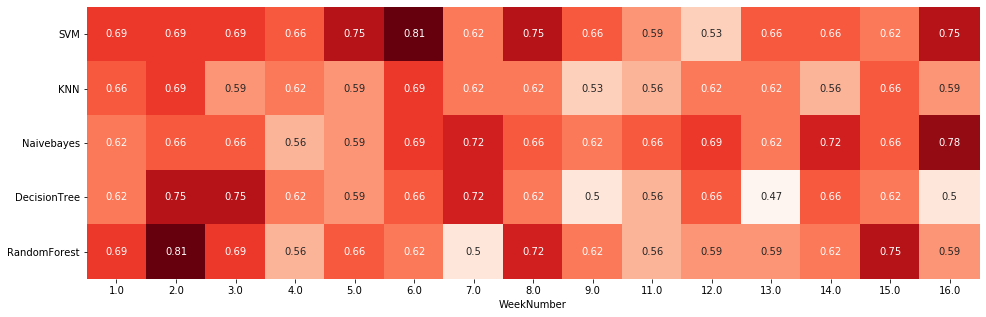

In [46]:
plt.figure(figsize=(16,5))
sns.heatmap(df_wkgt_final_hl_acc.T, annot=True, cbar=False, cmap="Reds")
plt.show()

## Week Factors => final_hl

■■■■■■■■■■【week 0】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
0         0.0   F1_score  0.756757  0.540541    0.777778      0.666667   
1         0.0  Precision  0.666667  0.476190    0.700000      0.600000   
2         0.0     Recall  0.875000  0.625000    0.875000      0.750000   
3         0.0   Accuracy  0.718750  0.468750    0.750000      0.625000   

   RandomForest  LogisticRegression  
0      0.702703            0.742857  
1      0.619048            0.684211  
2      0.812500            0.812500  
3      0.656250            0.718750

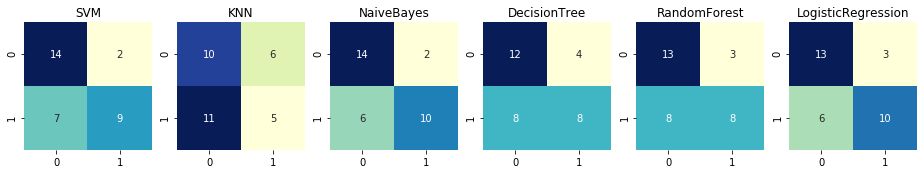

■■■■■■■■■■【week 2】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
4         2.0   F1_score  0.717949  0.615385    0.722222      0.457143   
5         2.0  Precision  0.608696  0.521739    0.650000      0.421053   
6         2.0     Recall  0.875000  0.750000    0.812500      0.500000   
7         2.0   Accuracy  0.656250  0.531250    0.687500      0.406250   

   RandomForest  LogisticRegression  
4      0.484848              0.5000  
5      0.470588              0.4500  
6      0.500000              0.5625  
7      0.468750              0.4375

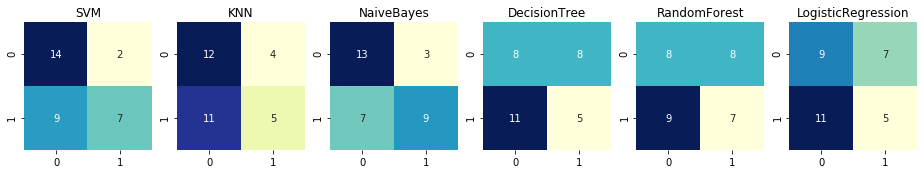

■■■■■■■■■■【week 3】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
8          3.0   F1_score  0.540541  0.529412    0.451613      0.647059   
9          3.0  Precision  0.476190  0.500000    0.466667      0.611111   
10         3.0     Recall  0.625000  0.562500    0.437500      0.687500   
11         3.0   Accuracy  0.468750  0.500000    0.468750      0.625000   

    RandomForest  LogisticRegression  
8       0.555556            0.564103  
9       0.500000            0.478261  
10      0.625000            0.687500  
11      0.500000            0.468750

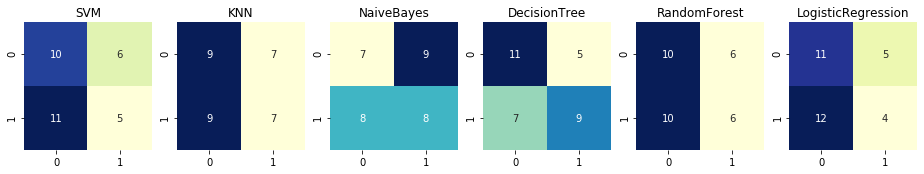

■■■■■■■■■■【week 4】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
12         4.0   F1_score  0.4375  0.742857    0.344828      0.571429   
13         4.0  Precision  0.4375  0.684211    0.384615      0.526316   
14         4.0     Recall  0.4375  0.812500    0.312500      0.625000   
15         4.0   Accuracy  0.4375  0.718750    0.406250      0.531250   

    RandomForest  LogisticRegression  
12        0.4375            0.551724  
13        0.4375            0.615385  
14        0.4375            0.500000  
15        0.4375            0.593750

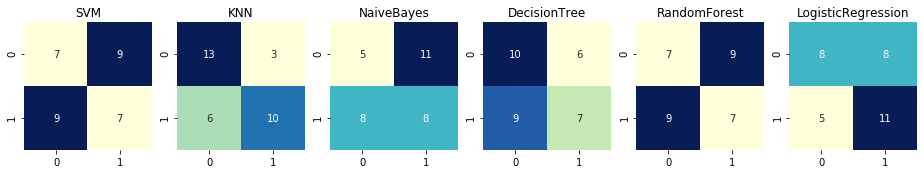

■■■■■■■■■■【week 5】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
16         5.0   F1_score  0.344828  0.606061    0.428571      0.466667   
17         5.0  Precision  0.384615  0.588235    0.500000      0.500000   
18         5.0     Recall  0.312500  0.625000    0.375000      0.437500   
19         5.0   Accuracy  0.406250  0.593750    0.500000      0.500000   

    RandomForest  LogisticRegression  
16         0.625            0.588235  
17         0.625            0.555556  
18         0.625            0.625000  
19         0.625            0.562500

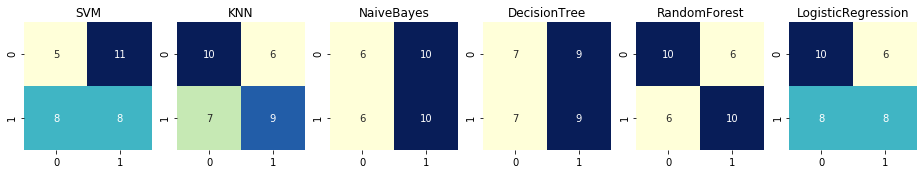

■■■■■■■■■■【week 6】■■■■■■■■■■


WeekNumber    Metrics       SVM  KNN  Naivebayes  DecisionTree  \
20         6.0   F1_score  0.322581  0.5    0.384615      0.466667   
21         6.0  Precision  0.333333  0.5    0.500000      0.500000   
22         6.0     Recall  0.312500  0.5    0.312500      0.437500   
23         6.0   Accuracy  0.343750  0.5    0.500000      0.500000   

    RandomForest  LogisticRegression  
20      0.285714               0.625  
21      0.333333               0.625  
22      0.250000               0.625  
23      0.375000               0.625

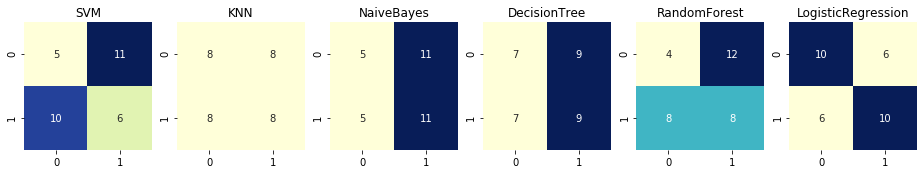

■■■■■■■■■■【week 7】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
24         7.0   F1_score  0.451613  0.451613    0.320000      0.606061   
25         7.0  Precision  0.466667  0.466667    0.444444      0.588235   
26         7.0     Recall  0.437500  0.437500    0.250000      0.625000   
27         7.0   Accuracy  0.468750  0.468750    0.468750      0.593750   

    RandomForest  LogisticRegression  
24      0.529412            0.666667  
25      0.500000            0.600000  
26      0.562500            0.750000  
27      0.500000            0.625000

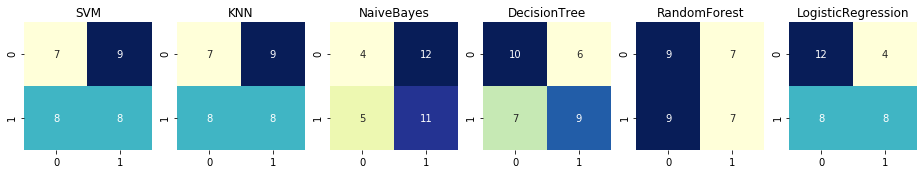

■■■■■■■■■■【week 8】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
28         8.0   F1_score  0.363636  0.357143    0.400000      0.357143   
29         8.0  Precision  0.352941  0.416667    0.555556      0.416667   
30         8.0     Recall  0.375000  0.312500    0.312500      0.312500   
31         8.0   Accuracy  0.343750  0.437500    0.531250      0.437500   

    RandomForest  LogisticRegression  
28      0.484848            0.545455  
29      0.470588            0.529412  
30      0.500000            0.562500  
31      0.468750            0.531250

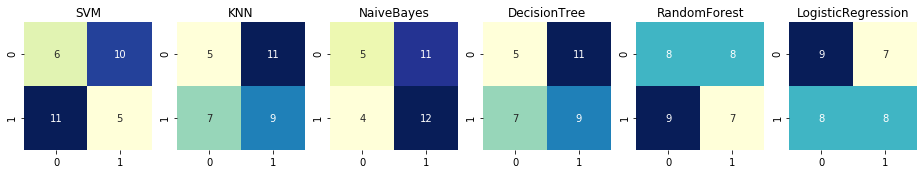

■■■■■■■■■■【week 9】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
32         9.0   F1_score  0.322581  0.387097    0.370370      0.428571   
33         9.0  Precision  0.333333  0.400000    0.454545      0.500000   
34         9.0     Recall  0.312500  0.375000    0.312500      0.375000   
35         9.0   Accuracy  0.343750  0.406250    0.468750      0.500000   

    RandomForest  LogisticRegression  
32      0.470588            0.666667  
33      0.444444            0.565217  
34      0.500000            0.812500  
35      0.437500            0.593750

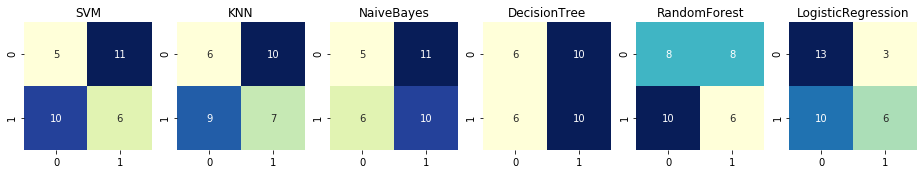

■■■■■■■■■■【week 11】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
36        11.0   F1_score  0.5625  0.533333    0.533333      0.647059   
37        11.0  Precision  0.5625  0.571429    0.571429      0.611111   
38        11.0     Recall  0.5625  0.500000    0.500000      0.687500   
39        11.0   Accuracy  0.5625  0.562500    0.562500      0.625000   

    RandomForest  LogisticRegression  
36      0.588235            0.606061  
37      0.555556            0.588235  
38      0.625000            0.625000  
39      0.562500            0.593750

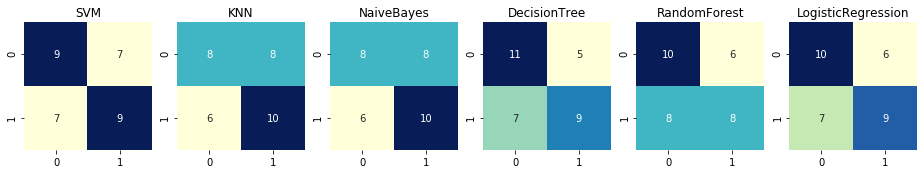

■■■■■■■■■■【week 12】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
40        12.0   F1_score  0.181818  0.294118    0.240000        0.4375   
41        12.0  Precision  0.176471  0.277778    0.333333        0.4375   
42        12.0     Recall  0.187500  0.312500    0.187500        0.4375   
43        12.0   Accuracy  0.156250  0.250000    0.406250        0.4375   

    RandomForest  LogisticRegression  
40      0.457143            0.451613  
41      0.421053            0.466667  
42      0.500000            0.437500  
43      0.406250            0.468750

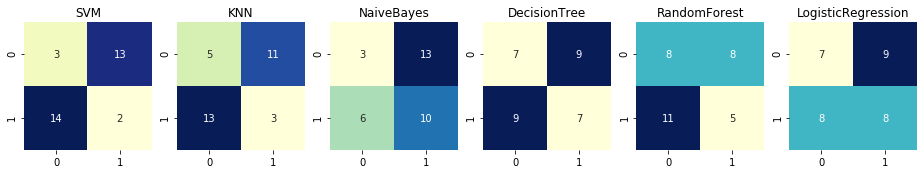

■■■■■■■■■■【week 13】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
44        13.0   F1_score  0.666667  0.606061    0.275862      0.484848   
45        13.0  Precision  0.565217  0.588235    0.307692      0.470588   
46        13.0     Recall  0.812500  0.625000    0.250000      0.500000   
47        13.0   Accuracy  0.593750  0.593750    0.343750      0.468750   

    RandomForest  LogisticRegression  
44      0.486486            0.333333  
45      0.428571            0.357143  
46      0.562500            0.312500  
47      0.406250            0.375000

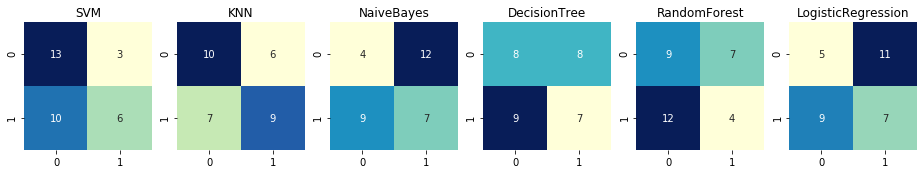

■■■■■■■■■■【week 14】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
48        14.0   F1_score  0.3125  0.387097      0.2500      0.451613   
49        14.0  Precision  0.3125  0.400000      0.3750      0.466667   
50        14.0     Recall  0.3125  0.375000      0.1875      0.437500   
51        14.0   Accuracy  0.3125  0.406250      0.4375      0.468750   

    RandomForest  LogisticRegression  
48           0.5            0.551724  
49           0.5            0.615385  
50           0.5            0.500000  
51           0.5            0.593750

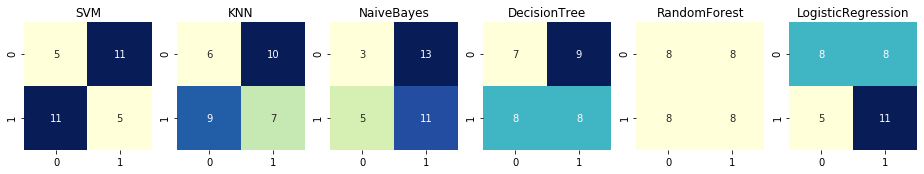

■■■■■■■■■■【week 15】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
52        15.0   F1_score  0.6875  0.516129    0.461538      0.606061   
53        15.0  Precision  0.6875  0.533333    0.600000      0.588235   
54        15.0     Recall  0.6875  0.500000    0.375000      0.625000   
55        15.0   Accuracy  0.6875  0.531250    0.562500      0.593750   

    RandomForest  LogisticRegression  
52      0.705882            0.482759  
53      0.666667            0.538462  
54      0.750000            0.437500  
55      0.687500            0.531250

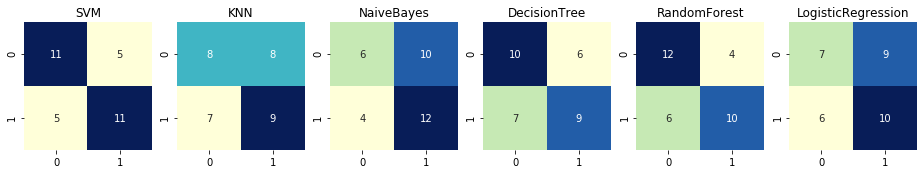

■■■■■■■■■■【week 16】■■■■■■■■■■


WeekNumber    Metrics       SVM       KNN  Naivebayes  DecisionTree  \
56        16.0   F1_score  0.428571  0.428571    0.666667        0.4375   
57        16.0  Precision  0.500000  0.500000    0.714286        0.4375   
58        16.0     Recall  0.375000  0.375000    0.625000        0.4375   
59        16.0   Accuracy  0.500000  0.500000    0.687500        0.4375   

    RandomForest  LogisticRegression  
56      0.533333              0.4375  
57      0.571429              0.4375  
58      0.500000              0.4375  
59      0.562500              0.4375

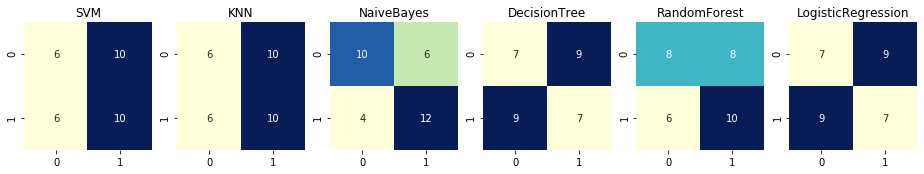

In [94]:
group_type="final_hl"
week_log=week_log.sort_values("WeekNumber")
df_wkgt_fc_final_hl=pd.DataFrame()
n=0
for w in list(set(week_log["WeekNumber"])):
    print("■■■■■■■■■■【week "+str(w)+"】■■■■■■■■■■")
 
    weekly_grand_total=week_log[week_log["WeekNumber"]<=w]
    weekly_gt_1=weekly_grand_total[["Username",
        'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
        'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
        'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
        'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
        'modulemethod_log_usect', 'basicmethod_log_usect',
        'Timespent_ad', 'DebugTime']].groupby("Username").sum().reset_index(drop=False)
    weekly_gt_2=weekly_grand_total[["Username",
        'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime', 
        'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime',
        'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct']].drop_duplicates(["Username"], keep="last")
    weekly_gt_2=weekly_gt_2.rename(columns={'Grand_Module_ct':"Module_ct", 'Grand_modulemethod_ct':"Modulemethod_ct", 'Grand_basicmethod_ct':'Basicmethod_ct'})
    weekly_grand_total=pd.merge(weekly_gt_1, weekly_gt_2, on="Username", how="left")
    weekly_grand_total=pd.merge(weekly_grand_total, df_log_values[['wk_expr', 'non_py_prof', 'py_prof']], on="Username", how="left")
    od=["Username"]+list(df_log_minmax3.columns)
    weekly_grand_total=weekly_grand_total[od].set_index("Username")
    for cl in weekly_grand_total.columns:
        if len(weekly_grand_total[pd.isnull(weekly_grand_total[cl])])!=0:
            #print(cl)
            mm=np.nanmean(weekly_grand_total[cl])
            if pd.isnull(mm):
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(0)                
            else:
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(mm)
    
    minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
    weekly_gt_minmax=minmax.fit_transform(weekly_grand_total)
    #data轉換
    weekly_gt_factor=fc.transform(weekly_gt_minmax)    
    weekly_gt_factor=pd.DataFrame(data=weekly_gt_factor, columns=list("ABCD"), index=weekly_grand_total.index)
    weekly_gt_factor=pd.merge(weekly_gt_factor, df_scorengroup[[group_type]], on="Username", how="left")
    
    #display(weekly_gt_minmax.head())
    
    kf=KFold(n_splits=10,shuffle=True)
    predicted1=[]; expected1=[]
    predicted2=[]; expected2=[]
    predicted3=[]; expected3=[]
    predicted4=[]; expected4=[]
    predicted5=[]; expected5=[]
    predicted6=[]; expected6=[]

    for i,j in kf.split(weekly_gt_factor): ###
        classifier1=SVC(gamma="scale")
        classifier2=KNeighborsClassifier()
        classifier3=DecisionTreeClassifier()
        classifier4=GaussianNB()
        classifier5=RandomForestClassifier(n_estimators=20,random_state=0)
        classifier6=LogisticRegression()

        tr_x=np.array(weekly_gt_factor.iloc[:,:-1])[i]
        tr_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[i] 
        te_x=np.array(weekly_gt_factor.iloc[:,:-1])[j] 
        te_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[j] 

        classifier1.fit(tr_x,tr_y)
        expected1.extend(te_y)
        predicted1.extend(classifier1.predict(te_x))

        classifier2.fit(tr_x,tr_y)
        expected2.extend(te_y)
        predicted2.extend(classifier2.predict(te_x))

        classifier3.fit(tr_x,tr_y)
        expected3.extend(te_y)
        predicted3.extend(classifier3.predict(te_x))

        classifier4.fit(tr_x,tr_y)
        expected4.extend(te_y)
        predicted4.extend(classifier4.predict(te_x))

        classifier5.fit(tr_x,tr_y)
        expected5.extend(te_y)
        predicted5.extend(classifier5.predict(te_x))

        classifier6.fit(tr_x,tr_y)
        expected6.extend(te_y)
        predicted6.extend(classifier6.predict(te_x))

    df_wkgt_fc_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_hl.loc[n,"Metrics"]= "F1_score"
    df_wkgt_fc_final_hl.loc[n,"SVM"]=metrics.f1_score(expected1,predicted1, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"KNN"]=metrics.f1_score(expected2,predicted2, pos_label=0)    
    df_wkgt_fc_final_hl.loc[n,"Naivebayes"]=metrics.f1_score(expected4,predicted4, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"DecisionTree"]=metrics.f1_score(expected3,predicted3, pos_label=0)    
    df_wkgt_fc_final_hl.loc[n,"RandomForest"]=metrics.f1_score(expected5,predicted5, pos_label=0)    
    df_wkgt_fc_final_hl.loc[n,"LogisticRegression"]=metrics.f1_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_fc_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_hl.loc[n,"Metrics"]= "Precision"
    df_wkgt_fc_final_hl.loc[n,"SVM"]=metrics.precision_score(expected1,predicted1, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"KNN"]=metrics.precision_score(expected2,predicted2, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"Naivebayes"]=metrics.precision_score(expected4,predicted4, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"DecisionTree"]=metrics.precision_score(expected3,predicted3, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"RandomForest"]=metrics.precision_score(expected5,predicted5, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"LogisticRegression"]=metrics.precision_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_fc_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_hl.loc[n,"Metrics"]= "Recall"    
    df_wkgt_fc_final_hl.loc[n,"SVM"]=metrics.recall_score(expected1,predicted1, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"KNN"]=metrics.recall_score(expected2,predicted2, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"Naivebayes"]=metrics.recall_score(expected4,predicted4, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"DecisionTree"]=metrics.recall_score(expected3,predicted3, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"RandomForest"]=metrics.recall_score(expected5,predicted5, pos_label=0)
    df_wkgt_fc_final_hl.loc[n,"LogisticRegression"]=metrics.recall_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_fc_final_hl.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_hl.loc[n,"Metrics"]= "Accuracy"    
    df_wkgt_fc_final_hl.loc[n,"SVM"]=metrics.accuracy_score(expected1,predicted1)
    df_wkgt_fc_final_hl.loc[n,"KNN"]=metrics.accuracy_score(expected2,predicted2)
    df_wkgt_fc_final_hl.loc[n,"Naivebayes"]=metrics.accuracy_score(expected4,predicted4)
    df_wkgt_fc_final_hl.loc[n,"DecisionTree"]=metrics.accuracy_score(expected3,predicted3)
    df_wkgt_fc_final_hl.loc[n,"RandomForest"]=metrics.accuracy_score(expected5,predicted5)
    df_wkgt_fc_final_hl.loc[n,"LogisticRegression"]=metrics.accuracy_score(expected6,predicted6)    
    n+=1 
    display(df_wkgt_fc_final_hl[df_wkgt_fc_final_hl.WeekNumber==w])
    
    plt.figure(figsize=(16,2.5))
    plt.subplot(161)
    plt.xlabel="SVM"
    mat1=pd.DataFrame(confusion_matrix(expected1,predicted1))
    ax1=sns.heatmap(mat1,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax1.set(title="SVM")
    
    plt.subplot(162)
    plt.xlabel="KNN"
    mat2=pd.DataFrame(confusion_matrix(expected2,predicted2))
    ax2=sns.heatmap(mat2,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax2.set(title="KNN")
    
    plt.subplot(163)
    plt.xlabel="NaiveBayes"
    mat4=pd.DataFrame(confusion_matrix(expected4,predicted4))
    ax3=sns.heatmap(mat4,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax3.set(title="NaiveBayes")
    
    plt.subplot(164)
    plt.xlabel="DecisionTree"
    mat3=pd.DataFrame(confusion_matrix(expected3,predicted3))
    ax4=sns.heatmap(mat3,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax4.set(title="DecisionTree")
    
    plt.subplot(165)
    plt.xlabel="RandomForest"
    mat5=pd.DataFrame(confusion_matrix(expected5,predicted5))
    ax5=sns.heatmap(mat5,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="RandomForest")
    
    plt.subplot(166)
    plt.xlabel="LogisticRegression"
    mat6=pd.DataFrame(confusion_matrix(expected6,predicted6))
    ax5=sns.heatmap(mat6,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="LogisticRegression")
    plt.show()

In [95]:
df_wkgt_fc_final_hl.to_excel("Classifier_WeeklyAccumulatedFactor2FinalHL.xlsx")
df_wkgt_fc_final_hl[df_wkgt_fc_final_hl["Metrics"]=="Accuracy"]

WeekNumber   Metrics      SVM      KNN  Naivebayes  DecisionTree  \
3          0.0  Accuracy  0.71875  0.46875     0.75000       0.62500   
7          2.0  Accuracy  0.65625  0.53125     0.68750       0.40625   
11         3.0  Accuracy  0.46875  0.50000     0.46875       0.62500   
15         4.0  Accuracy  0.43750  0.71875     0.40625       0.53125   
19         5.0  Accuracy  0.40625  0.59375     0.50000       0.50000   
23         6.0  Accuracy  0.34375  0.50000     0.50000       0.50000   
27         7.0  Accuracy  0.46875  0.46875     0.46875       0.59375   
31         8.0  Accuracy  0.34375  0.43750     0.53125       0.43750   
35         9.0  Accuracy  0.34375  0.40625     0.46875       0.50000   
39        11.0  Accuracy  0.56250  0.56250     0.56250       0.62500   
43        12.0  Accuracy  0.15625  0.25000     0.40625       0.43750   
47        13.0  Accuracy  0.59375  0.59375     0.34375       0.46875   
51        14.0  Accuracy  0.31250  0.40625     0.43750       0.46875   
55        15.0  Accuracy  0.68750  0.53125     0.56250       0.59375   
59        16.0  Accuracy  0.50000  0.50000     0.68750       0.43750   

    RandomForest  LogisticRegression  
3        0.65625             0.71875  
7        0.46875             0.43750  
11       0.50000             0.46875  
15       0.43750             0.59375  
19       0.62500             0.56250  
23       0.37500             0.62500  
27       0.50000             0.62500  
31       0.46875             0.53125  
35       0.43750             0.59375  
39       0.56250             0.59375  
43       0.40625             0.46875  
47       0.40625             0.37500  
51       0.50000             0.59375  
55       0.68750             0.53125  
59       0.56250             0.43750

## Week Data => final_fail

■■■■■■■■■■【week 1】■■■■■■■■■■


WeekNumber    Metrics     SVM       KNN  Naivebayes  DecisionTree  \
0         1.0   F1_score  0.0000  0.235294    0.500000      0.222222   
1         1.0  Precision  0.0000  0.250000    0.368421      0.222222   
2         1.0     Recall  0.0000  0.222222    0.777778      0.222222   
3         1.0   Accuracy  0.6875  0.593750    0.562500      0.562500   

   RandomForest  
0       0.00000  
1       0.00000  
2       0.00000  
3       0.65625

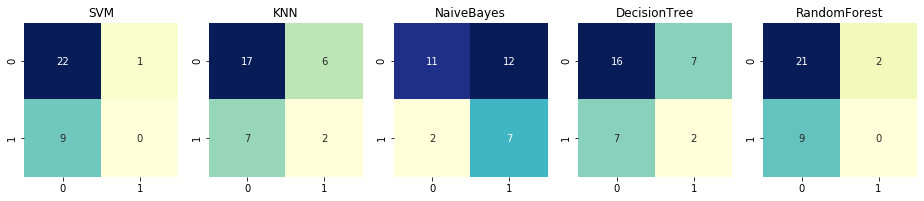

■■■■■■■■■■【week 2】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
4         2.0   F1_score  0.00000  0.133333    0.500000      0.315789   
5         2.0  Precision  0.00000  0.166667    0.368421      0.300000   
6         2.0     Recall  0.00000  0.111111    0.777778      0.333333   
7         2.0   Accuracy  0.71875  0.593750    0.562500      0.593750   

   RandomForest  
4      0.166667  
5      0.333333  
6      0.111111  
7      0.687500

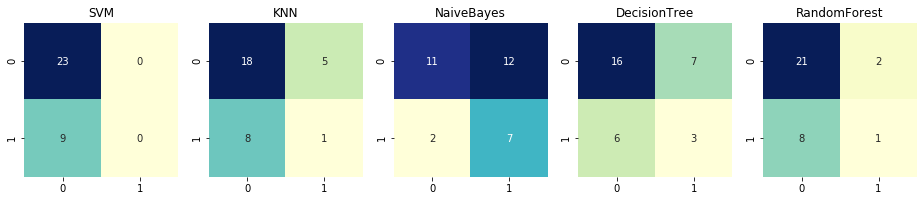

■■■■■■■■■■【week 3】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
8          3.0   F1_score  0.00000  0.181818    0.518519      0.111111   
9          3.0  Precision  0.00000  0.500000    0.388889      0.111111   
10         3.0     Recall  0.00000  0.111111    0.777778      0.111111   
11         3.0   Accuracy  0.71875  0.718750    0.593750      0.500000   

    RandomForest  
8       0.285714  
9       0.400000  
10      0.222222  
11      0.687500

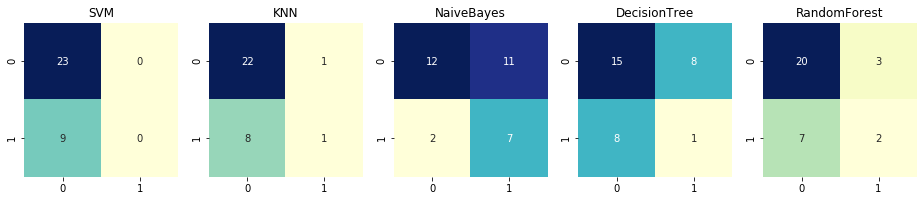

■■■■■■■■■■【week 4】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
12         4.0   F1_score  0.00000  0.153846    0.235294      0.210526   
13         4.0  Precision  0.00000  0.250000    0.250000      0.200000   
14         4.0     Recall  0.00000  0.111111    0.222222      0.222222   
15         4.0   Accuracy  0.71875  0.656250    0.593750      0.531250   

    RandomForest  
12      0.166667  
13      0.333333  
14      0.111111  
15      0.687500

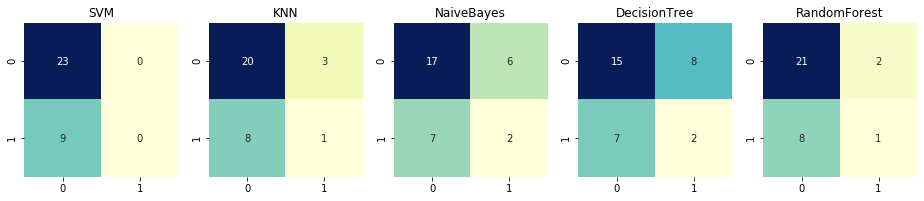

■■■■■■■■■■【week 5】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
16         5.0   F1_score  0.00000  0.333333    0.352941      0.777778   
17         5.0  Precision  0.00000  0.666667    0.375000      0.777778   
18         5.0     Recall  0.00000  0.222222    0.333333      0.777778   
19         5.0   Accuracy  0.71875  0.750000    0.656250      0.875000   

    RandomForest  
16      0.615385  
17      1.000000  
18      0.444444  
19      0.843750

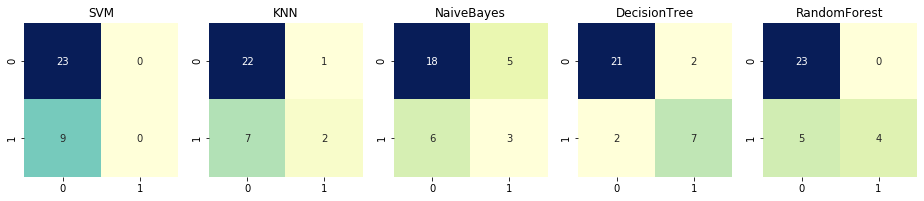

■■■■■■■■■■【week 6】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
20         6.0   F1_score  0.00000  0.181818    0.444444      0.823529   
21         6.0  Precision  0.00000  0.500000    0.444444      0.875000   
22         6.0     Recall  0.00000  0.111111    0.444444      0.777778   
23         6.0   Accuracy  0.71875  0.718750    0.687500      0.906250   

    RandomForest  
20      0.307692  
21      0.500000  
22      0.222222  
23      0.718750

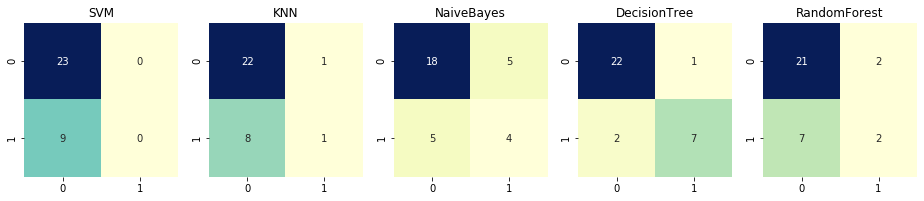

■■■■■■■■■■【week 7】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
24         7.0   F1_score  0.00000  0.363636    0.375000      0.631579   
25         7.0  Precision  0.00000  1.000000    0.428571      0.600000   
26         7.0     Recall  0.00000  0.222222    0.333333      0.666667   
27         7.0   Accuracy  0.71875  0.781250    0.687500      0.781250   

    RandomForest  
24      0.666667  
25      0.833333  
26      0.555556  
27      0.843750

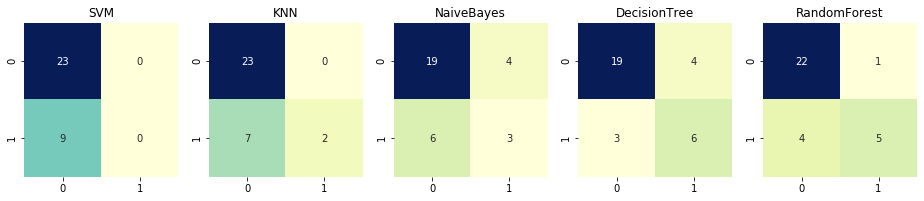

■■■■■■■■■■【week 8】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
28         8.0   F1_score  0.00000  0.307692    0.444444      0.400000   
29         8.0  Precision  0.00000  0.500000    0.444444      0.500000   
30         8.0     Recall  0.00000  0.222222    0.444444      0.333333   
31         8.0   Accuracy  0.71875  0.718750    0.687500      0.718750   

    RandomForest  
28      0.615385  
29      1.000000  
30      0.444444  
31      0.843750

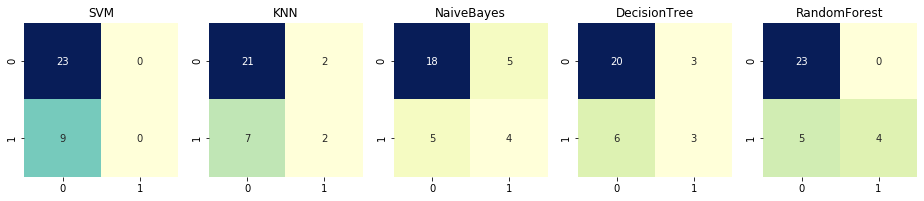

■■■■■■■■■■【week 9】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
32         9.0   F1_score  0.00000  0.333333    0.428571      0.428571   
33         9.0  Precision  0.00000  0.666667    0.600000      0.600000   
34         9.0     Recall  0.00000  0.222222    0.333333      0.333333   
35         9.0   Accuracy  0.71875  0.750000    0.750000      0.750000   

    RandomForest  
32      0.285714  
33      0.400000  
34      0.222222  
35      0.687500

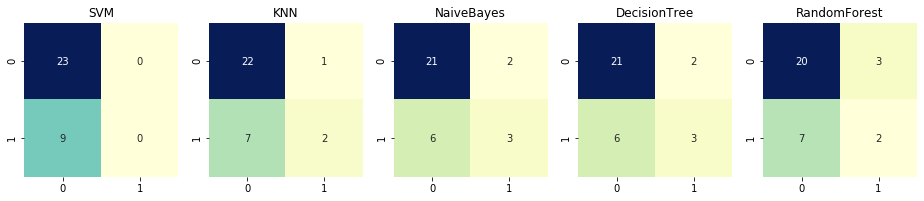

■■■■■■■■■■【week 11】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
36        11.0   F1_score  0.00000  0.363636    0.588235      0.235294   
37        11.0  Precision  0.00000  1.000000    0.625000      0.250000   
38        11.0     Recall  0.00000  0.222222    0.555556      0.222222   
39        11.0   Accuracy  0.71875  0.781250    0.781250      0.593750   

    RandomForest  
36      0.363636  
37      1.000000  
38      0.222222  
39      0.781250

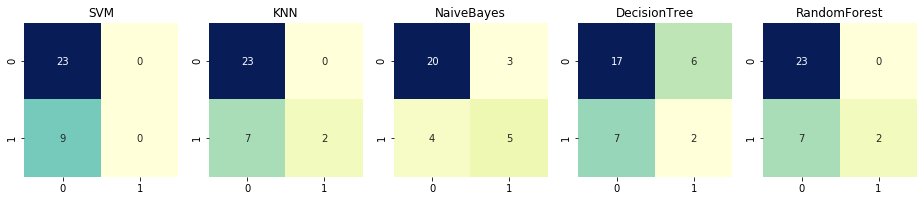

■■■■■■■■■■【week 12】■■■■■■■■■■


WeekNumber    Metrics      SVM      KNN  Naivebayes  DecisionTree  \
40        12.0   F1_score  0.00000  0.00000    0.533333      0.500000   
41        12.0  Precision  0.00000  0.00000    0.666667      0.571429   
42        12.0     Recall  0.00000  0.00000    0.444444      0.444444   
43        12.0   Accuracy  0.71875  0.71875    0.781250      0.750000   

    RandomForest  
40      0.363636  
41      1.000000  
42      0.222222  
43      0.781250

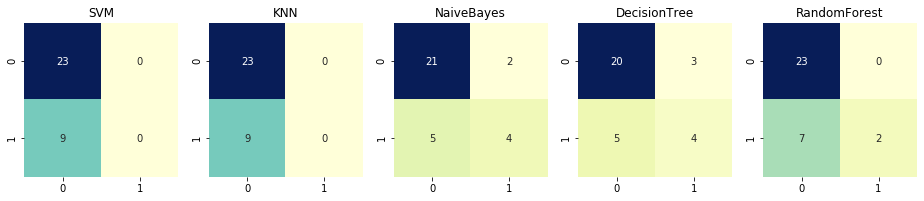

■■■■■■■■■■【week 13】■■■■■■■■■■


WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
44        13.0   F1_score  0.00000  0.200000    0.615385      0.266667   
45        13.0  Precision  0.00000  1.000000    1.000000      0.333333   
46        13.0     Recall  0.00000  0.111111    0.444444      0.222222   
47        13.0   Accuracy  0.71875  0.750000    0.843750      0.656250   

    RandomForest  
44      0.571429  
45      0.800000  
46      0.444444  
47      0.812500

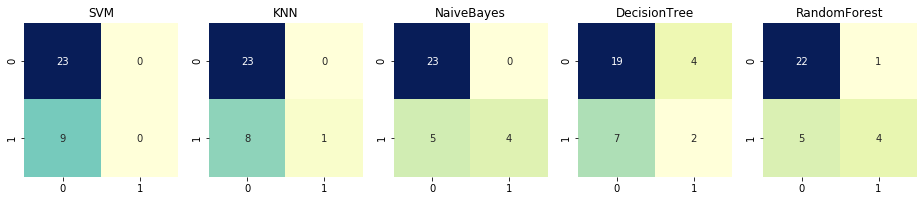

■■■■■■■■■■【week 14】■■■■■■■■■■


WeekNumber    Metrics      SVM     KNN  Naivebayes  DecisionTree  \
48        14.0   F1_score  0.00000  0.0000    0.571429      0.500000   
49        14.0  Precision  0.00000  0.0000    0.800000      0.454545   
50        14.0     Recall  0.00000  0.0000    0.444444      0.555556   
51        14.0   Accuracy  0.71875  0.6875    0.812500      0.687500   

    RandomForest  
48      0.363636  
49      1.000000  
50      0.222222  
51      0.781250

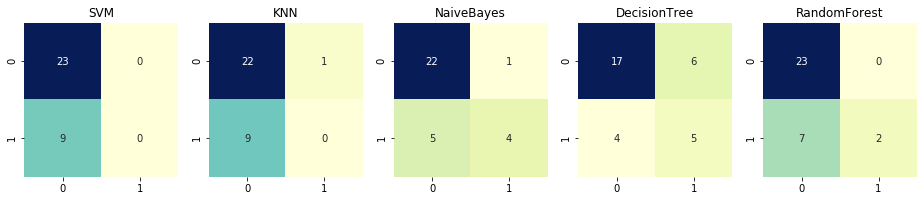

■■■■■■■■■■【week 15】■■■■■■■■■■


WeekNumber    Metrics      SVM      KNN  Naivebayes  DecisionTree  \
52        15.0   F1_score  0.00000  0.00000    0.375000      0.444444   
53        15.0  Precision  0.00000  0.00000    0.428571      0.444444   
54        15.0     Recall  0.00000  0.00000    0.333333      0.444444   
55        15.0   Accuracy  0.71875  0.71875    0.687500      0.687500   

    RandomForest  
52      0.400000  
53      0.500000  
54      0.333333  
55      0.718750

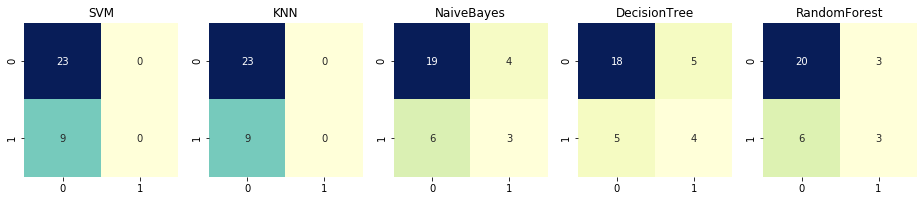

■■■■■■■■■■【week 16】■■■■■■■■■■


WeekNumber    Metrics      SVM      KNN  Naivebayes  DecisionTree  \
56        16.0   F1_score  0.00000  0.00000    0.352941      0.842105   
57        16.0  Precision  0.00000  0.00000    0.375000      0.800000   
58        16.0     Recall  0.00000  0.00000    0.333333      0.888889   
59        16.0   Accuracy  0.71875  0.65625    0.656250      0.906250   

    RandomForest  
56      0.166667  
57      0.333333  
58      0.111111  
59      0.687500

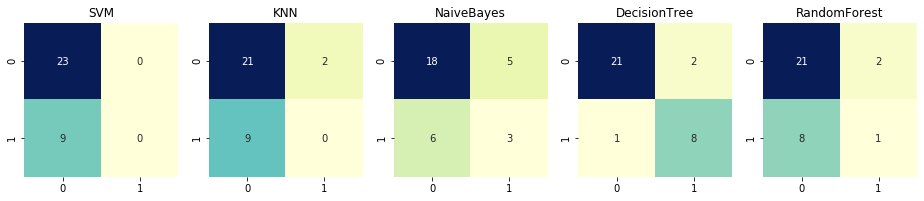

In [49]:
group_type="final_fail"
week_log=week_log.sort_values("WeekNumber")
df_wkgt_final_fail=pd.DataFrame()
n=0
for w in list(set(week_log["WeekNumber"])):
    print("■■■■■■■■■■【week "+str(w)+"】■■■■■■■■■■")
 
    weekly_grand_total=week_log[week_log["WeekNumber"]<=w]
    weekly_gt_1=weekly_grand_total[["Username",
        'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
        'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
        'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
        'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
        'modulemethod_log_usect', 'basicmethod_log_usect',
        'Timespent_ad', 'DebugTime']].groupby("Username").sum().reset_index(drop=False) 
    weekly_gt_2=weekly_grand_total[["Username",
        'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct']].drop_duplicates(["Username"], keep="last")
    weekly_gt_3=weekly_grand_total[["Username",
        'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime', 
        'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime']].groupby("Username").mean().reset_index(drop=False) 
    weekly_gt_2=weekly_gt_2.rename(columns={'Grand_Module_ct':"Module_ct", 'Grand_modulemethod_ct':"Modulemethod_ct", 'Grand_basicmethod_ct':'Basicmethod_ct'})
    weekly_grand_total=pd.merge(weekly_gt_1, weekly_gt_2, on="Username", how="left")
    weekly_grand_total=pd.merge(weekly_grand_total, weekly_gt_3, on="Username", how="left")    
    weekly_grand_total=pd.merge(weekly_grand_total, df_log_values[['wk_expr', 'non_py_prof', 'py_prof']], on="Username", how="left")
    od=["Username"]+list(df_log_minmax3.columns)
    weekly_grand_total=weekly_grand_total[od].set_index("Username")
    for cl in weekly_grand_total.columns:
        if len(weekly_grand_total[pd.isnull(weekly_grand_total[cl])])!=0:
            #print(cl)
            mm=np.nanmean(weekly_grand_total[cl])
            if pd.isnull(mm):
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(0)                
            else:
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(mm)
    
    minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
    weekly_gt_minmax=minmax.fit_transform(weekly_grand_total)
    weekly_gt_minmax=pd.DataFrame(data=weekly_gt_minmax, columns=list(weekly_grand_total.columns), index=weekly_grand_total.index)
    weekly_gt_minmax=pd.merge(weekly_gt_minmax, df_scorengroup[[group_type]], on="Username", how="left")
    
    #display(weekly_gt_minmax.head())
    
    kf=KFold(n_splits=10,shuffle=True)
    predicted1=[]; expected1=[]
    predicted2=[]; expected2=[]
    predicted3=[]; expected3=[]
    predicted4=[]; expected4=[]
    predicted5=[]; expected5=[]

    for i,j in kf.split(weekly_gt_minmax): ###
        classifier1=SVC(gamma="scale")
        classifier2=KNeighborsClassifier()
        classifier3=DecisionTreeClassifier()
        classifier4=GaussianNB()
        classifier5=RandomForestClassifier(n_estimators=20,random_state=0)

        tr_x=np.array(weekly_gt_minmax.iloc[:,:-1])[i]
        tr_y=np.array(list(weekly_gt_minmax.iloc[:,-1]))[i] 
        te_x=np.array(weekly_gt_minmax.iloc[:,:-1])[j] 
        te_y=np.array(list(weekly_gt_minmax.iloc[:,-1]))[j] 

        classifier1.fit(tr_x,tr_y)
        expected1.extend(te_y)
        predicted1.extend(classifier1.predict(te_x))

        classifier2.fit(tr_x,tr_y)
        expected2.extend(te_y)
        predicted2.extend(classifier2.predict(te_x))

        classifier3.fit(tr_x,tr_y)
        expected3.extend(te_y)
        predicted3.extend(classifier3.predict(te_x))

        classifier4.fit(tr_x,tr_y)
        expected4.extend(te_y)
        predicted4.extend(classifier4.predict(te_x))

        classifier5.fit(tr_x,tr_y)
        expected5.extend(te_y)
        predicted5.extend(classifier5.predict(te_x))

    df_wkgt_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_fail.loc[n,"Metrics"]= "F1_score"
    df_wkgt_final_fail.loc[n,"SVM"]=metrics.f1_score(expected1,predicted1, pos_label=1)
    df_wkgt_final_fail.loc[n,"KNN"]=metrics.f1_score(expected2,predicted2, pos_label=1)    
    df_wkgt_final_fail.loc[n,"Naivebayes"]=metrics.f1_score(expected4,predicted4, pos_label=1)
    df_wkgt_final_fail.loc[n,"DecisionTree"]=metrics.f1_score(expected3,predicted3, pos_label=1)    
    df_wkgt_final_fail.loc[n,"RandomForest"]=metrics.f1_score(expected5,predicted5, pos_label=1)    
    n+=1
    df_wkgt_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_fail.loc[n,"Metrics"]= "Precision"
    df_wkgt_final_fail.loc[n,"SVM"]=metrics.precision_score(expected1,predicted1, pos_label=1)
    df_wkgt_final_fail.loc[n,"KNN"]=metrics.precision_score(expected2,predicted2, pos_label=1)
    df_wkgt_final_fail.loc[n,"Naivebayes"]=metrics.precision_score(expected4,predicted4, pos_label=1)
    df_wkgt_final_fail.loc[n,"DecisionTree"]=metrics.precision_score(expected3,predicted3, pos_label=1)
    df_wkgt_final_fail.loc[n,"RandomForest"]=metrics.precision_score(expected5,predicted5, pos_label=1)
    n+=1
    df_wkgt_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_fail.loc[n,"Metrics"]= "Recall"    
    df_wkgt_final_fail.loc[n,"SVM"]=metrics.recall_score(expected1,predicted1, pos_label=1)
    df_wkgt_final_fail.loc[n,"KNN"]=metrics.recall_score(expected2,predicted2, pos_label=1)
    df_wkgt_final_fail.loc[n,"Naivebayes"]=metrics.recall_score(expected4,predicted4, pos_label=1)
    df_wkgt_final_fail.loc[n,"DecisionTree"]=metrics.recall_score(expected3,predicted3, pos_label=1)
    df_wkgt_final_fail.loc[n,"RandomForest"]=metrics.recall_score(expected5,predicted5, pos_label=1)
    n+=1
    df_wkgt_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_fail.loc[n,"Metrics"]= "Accuracy"    
    df_wkgt_final_fail.loc[n,"SVM"]=metrics.accuracy_score(expected1,predicted1)
    df_wkgt_final_fail.loc[n,"KNN"]=metrics.accuracy_score(expected2,predicted2)
    df_wkgt_final_fail.loc[n,"Naivebayes"]=metrics.accuracy_score(expected4,predicted4)
    df_wkgt_final_fail.loc[n,"DecisionTree"]=metrics.accuracy_score(expected3,predicted3)
    df_wkgt_final_fail.loc[n,"RandomForest"]=metrics.accuracy_score(expected5,predicted5)
    n+=1 
    display(df_wkgt_final_fail[df_wkgt_final_fail.WeekNumber==w])
    
    plt.figure(figsize=(16,3))
    plt.subplot(151)
    plt.xlabel="SVM"
    mat1=pd.DataFrame(confusion_matrix(expected1,predicted1))
    ax1=sns.heatmap(mat1,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax1.set(title="SVM")
    
    plt.subplot(152)
    plt.xlabel="KNN"
    mat2=pd.DataFrame(confusion_matrix(expected2,predicted2))
    ax2=sns.heatmap(mat2,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax2.set(title="KNN")
    
    plt.subplot(153)
    plt.xlabel="NaiveBayes"
    mat4=pd.DataFrame(confusion_matrix(expected4,predicted4))
    ax3=sns.heatmap(mat4,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax3.set(title="NaiveBayes")
    
    plt.subplot(154)
    plt.xlabel="DecisionTree"
    mat3=pd.DataFrame(confusion_matrix(expected3,predicted3))
    ax4=sns.heatmap(mat3,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax4.set(title="DecisionTree")
    
    plt.subplot(155)
    plt.xlabel="RandomForest"
    mat5=pd.DataFrame(confusion_matrix(expected5,predicted5))
    ax5=sns.heatmap(mat5,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="RandomForest")
    plt.show()

In [50]:
df_wkgt_final_fail.to_excel("Classifier_WeeklyAccumulated2FinalFail.xlsx")
# df_wkgt_final_fail=pd.read_excel("Classifier_WeeklyAccumulated2FinalFail.xlsx")
# if  "Unnamed: 0" in df_wkgt_final_fail.columns:
#     df_wkgt_final_fail=df_wkgt_final_fail.drop("Unnamed: 0", axis=1)
df_wkgt_final_fail

WeekNumber    Metrics      SVM       KNN  Naivebayes  DecisionTree  \
0          1.0   F1_score  0.00000  0.235294    0.500000      0.222222   
1          1.0  Precision  0.00000  0.250000    0.368421      0.222222   
2          1.0     Recall  0.00000  0.222222    0.777778      0.222222   
3          1.0   Accuracy  0.68750  0.593750    0.562500      0.562500   
4          2.0   F1_score  0.00000  0.133333    0.500000      0.315789   
5          2.0  Precision  0.00000  0.166667    0.368421      0.300000   
6          2.0     Recall  0.00000  0.111111    0.777778      0.333333   
7          2.0   Accuracy  0.71875  0.593750    0.562500      0.593750   
8          3.0   F1_score  0.00000  0.181818    0.518519      0.111111   
9          3.0  Precision  0.00000  0.500000    0.388889      0.111111   
10         3.0     Recall  0.00000  0.111111    0.777778      0.111111   
11         3.0   Accuracy  0.71875  0.718750    0.593750      0.500000   
12         4.0   F1_score  0.00000  0.153846    0.235294      0.210526   
13         4.0  Precision  0.00000  0.250000    0.250000      0.200000   
14         4.0     Recall  0.00000  0.111111    0.222222      0.222222   
15         4.0   Accuracy  0.71875  0.656250    0.593750      0.531250   
16         5.0   F1_score  0.00000  0.333333    0.352941      0.777778   
17         5.0  Precision  0.00000  0.666667    0.375000      0.777778   
18         5.0     Recall  0.00000  0.222222    0.333333      0.777778   
19         5.0   Accuracy  0.71875  0.750000    0.656250      0.875000   
20         6.0   F1_score  0.00000  0.181818    0.444444      0.823529   
21         6.0  Precision  0.00000  0.500000    0.444444      0.875000   
22         6.0     Recall  0.00000  0.111111    0.444444      0.777778   
23         6.0   Accuracy  0.71875  0.718750    0.687500      0.906250   
24         7.0   F1_score  0.00000  0.363636    0.375000      0.631579   
25         7.0  Precision  0.00000  1.000000    0.428571      0.600000   
26         7.0     Recall  0.00000  0.222222    0.333333      0.666667   
27         7.0   Accuracy  0.71875  0.781250    0.687500      0.781250   
28         8.0   F1_score  0.00000  0.307692    0.444444      0.400000   
29         8.0  Precision  0.00000  0.500000    0.444444      0.500000   
30         8.0     Recall  0.00000  0.222222    0.444444      0.333333   
31         8.0   Accuracy  0.71875  0.718750    0.687500      0.718750   
32         9.0   F1_score  0.00000  0.333333    0.428571      0.428571   
33         9.0  Precision  0.00000  0.666667    0.600000      0.600000   
34         9.0     Recall  0.00000  0.222222    0.333333      0.333333   
35         9.0   Accuracy  0.71875  0.750000    0.750000      0.750000   
36        11.0   F1_score  0.00000  0.363636    0.588235      0.235294   
37        11.0  Precision  0.00000  1.000000    0.625000      0.250000   
38        11.0     Recall  0.00000  0.222222    0.555556      0.222222   
39        11.0   Accuracy  0.71875  0.781250    0.781250      0.593750   
40        12.0   F1_score  0.00000  0.000000    0.533333      0.500000   
41        12.0  Precision  0.00000  0.000000    0.666667      0.571429   
42        12.0     Recall  0.00000  0.000000    0.444444      0.444444   
43        12.0   Accuracy  0.71875  0.718750    0.781250      0.750000   
44        13.0   F1_score  0.00000  0.200000    0.615385      0.266667   
45        13.0  Precision  0.00000  1.000000    1.000000      0.333333   
46        13.0     Recall  0.00000  0.111111    0.444444      0.222222   
47        13.0   Accuracy  0.71875  0.750000    0.843750      0.656250   
48        14.0   F1_score  0.00000  0.000000    0.571429      0.500000   
49        14.0  Precision  0.00000  0.000000    0.800000      0.454545   
50        14.0     Recall  0.00000  0.000000    0.444444      0.555556   
51        14.0   Accuracy  0.71875  0.687500    0.812500      0.687500   
52        15.0   F1_score  0.00000  0.000000    0.375000      0.444444   
53      

In [51]:
df_wkgt_final_fail_f1=df_wkgt_final_fail[df_wkgt_final_fail["Metrics"]=="F1_score"]
df_wkgt_final_fail_f1=df_wkgt_final_fail_f1.set_index("WeekNumber").drop("Metrics", axis=1)

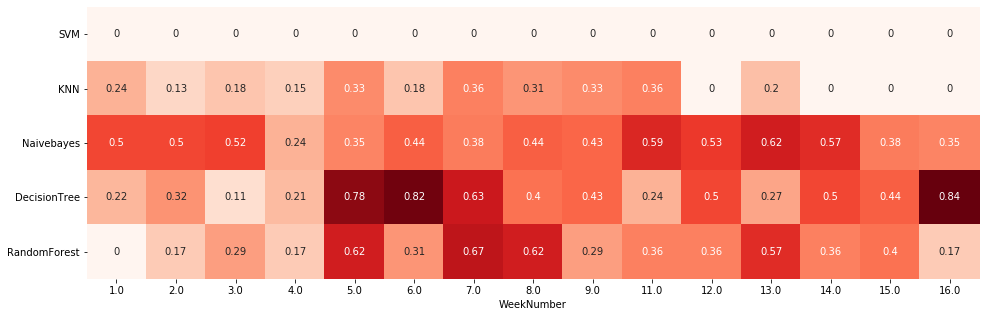

In [53]:
plt.figure(figsize=(16,5))
sns.heatmap(df_wkgt_final_fail_f1.T, annot=True, cbar=False, cmap="Reds")
plt.show()

## Week Factors => final_fail

In [47]:
group_type="final_fail"
week_log=week_log.sort_values("WeekNumber")
df_wkgt_fc_final_fail=pd.DataFrame()
n=0
for w in list(set(week_log["WeekNumber"])):
    print("■■■■■■■■■■【week "+str(w)+"】■■■■■■■■■■")
 
    weekly_grand_total=week_log[week_log["WeekNumber"]<=w]
    weekly_gt_1=weekly_grand_total[["Username",
        'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
        'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
        'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
        'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
        'modulemethod_log_usect', 'basicmethod_log_usect',
        'Timespent_ad', 'DebugTime']].groupby("Username").sum().reset_index(drop=False)
    weekly_gt_2=weekly_grand_total[["Username",
        'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime', 
        'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime',
        'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct']].drop_duplicates(["Username"], keep="last")
    weekly_gt_2=weekly_gt_2.rename(columns={'Grand_Module_ct':"Module_ct", 'Grand_modulemethod_ct':"Modulemethod_ct", 'Grand_basicmethod_ct':'Basicmethod_ct'})
    weekly_grand_total=pd.merge(weekly_gt_1, weekly_gt_2, on="Username", how="left")
    weekly_grand_total=pd.merge(weekly_grand_total, df_log_values[['wk_expr', 'non_py_prof', 'py_prof']], on="Username", how="left")
    od=["Username"]+list(df_log_minmax3.columns)
    weekly_grand_total=weekly_grand_total[od].set_index("Username")
    for cl in weekly_grand_total.columns:
        if len(weekly_grand_total[pd.isnull(weekly_grand_total[cl])])!=0:
            #print(cl)
            mm=np.nanmean(weekly_grand_total[cl])
            if pd.isnull(mm):
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(0)                
            else:
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(mm)
    
    minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
    weekly_gt_minmax=minmax.fit_transform(weekly_grand_total)
    #data轉換
    weekly_gt_factor=fc.transform(weekly_gt_minmax)    
    weekly_gt_factor=pd.DataFrame(data=weekly_gt_factor, columns=list("ABCD"), index=weekly_grand_total.index)
    weekly_gt_factor=pd.merge(weekly_gt_factor, df_scorengroup[[group_type]], on="Username", how="left")
    
    #display(weekly_gt_minmax.head())
    
    kf=KFold(n_splits=10,shuffle=True)
    predicted1=[]; expected1=[]
    predicted2=[]; expected2=[]
    predicted3=[]; expected3=[]
    predicted4=[]; expected4=[]
    predicted5=[]; expected5=[]
    predicted6=[]; expected6=[]

    for i,j in kf.split(weekly_gt_factor): ###
        classifier1=SVC(gamma="scale")
        classifier2=KNeighborsClassifier()
        classifier3=DecisionTreeClassifier()
        classifier4=GaussianNB()
        classifier5=RandomForestClassifier(n_estimators=20,random_state=0)
        classifier6=LogisticRegression()

        tr_x=np.array(weekly_gt_factor.iloc[:,:-1])[i]
        tr_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[i] 
        te_x=np.array(weekly_gt_factor.iloc[:,:-1])[j] 
        te_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[j] 

        classifier1.fit(tr_x,tr_y)
        expected1.extend(te_y)
        predicted1.extend(classifier1.predict(te_x))

        classifier2.fit(tr_x,tr_y)
        expected2.extend(te_y)
        predicted2.extend(classifier2.predict(te_x))

        classifier3.fit(tr_x,tr_y)
        expected3.extend(te_y)
        predicted3.extend(classifier3.predict(te_x))

        classifier4.fit(tr_x,tr_y)
        expected4.extend(te_y)
        predicted4.extend(classifier4.predict(te_x))

        classifier5.fit(tr_x,tr_y)
        expected5.extend(te_y)
        predicted5.extend(classifier5.predict(te_x))

        classifier6.fit(tr_x,tr_y)
        expected6.extend(te_y)
        predicted6.extend(classifier6.predict(te_x))

    df_wkgt_fc_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_fail.loc[n,"Metrics"]= "F1_score"
    df_wkgt_fc_final_fail.loc[n,"SVM"]=metrics.f1_score(expected1,predicted1, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"KNN"]=metrics.f1_score(expected2,predicted2, pos_label=1)    
    df_wkgt_fc_final_fail.loc[n,"Naivebayes"]=metrics.f1_score(expected4,predicted4, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"DecisionTree"]=metrics.f1_score(expected3,predicted3, pos_label=1)    
    df_wkgt_fc_final_fail.loc[n,"RandomForest"]=metrics.f1_score(expected5,predicted5, pos_label=1)    
    df_wkgt_fc_final_fail.loc[n,"LogisticRegression"]=metrics.f1_score(expected6,predicted6, pos_label=1)    
    n+=1
    df_wkgt_fc_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_fail.loc[n,"Metrics"]= "Precision"
    df_wkgt_fc_final_fail.loc[n,"SVM"]=metrics.precision_score(expected1,predicted1, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"KNN"]=metrics.precision_score(expected2,predicted2, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"Naivebayes"]=metrics.precision_score(expected4,predicted4, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"DecisionTree"]=metrics.precision_score(expected3,predicted3, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"RandomForest"]=metrics.precision_score(expected5,predicted5, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"LogisticRegression"]=metrics.precision_score(expected6,predicted6, pos_label=1)    
    n+=1
    df_wkgt_fc_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_fail.loc[n,"Metrics"]= "Recall"    
    df_wkgt_fc_final_fail.loc[n,"SVM"]=metrics.recall_score(expected1,predicted1, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"KNN"]=metrics.recall_score(expected2,predicted2, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"Naivebayes"]=metrics.recall_score(expected4,predicted4, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"DecisionTree"]=metrics.recall_score(expected3,predicted3, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"RandomForest"]=metrics.recall_score(expected5,predicted5, pos_label=1)
    df_wkgt_fc_final_fail.loc[n,"LogisticRegression"]=metrics.recall_score(expected6,predicted6, pos_label=1)    
    n+=1
    df_wkgt_fc_final_fail.loc[n,"WeekNumber"]=int(w)
    df_wkgt_fc_final_fail.loc[n,"Metrics"]= "Accuracy"    
    df_wkgt_fc_final_fail.loc[n,"SVM"]=metrics.accuracy_score(expected1,predicted1)
    df_wkgt_fc_final_fail.loc[n,"KNN"]=metrics.accuracy_score(expected2,predicted2)
    df_wkgt_fc_final_fail.loc[n,"Naivebayes"]=metrics.accuracy_score(expected4,predicted4)
    df_wkgt_fc_final_fail.loc[n,"DecisionTree"]=metrics.accuracy_score(expected3,predicted3)
    df_wkgt_fc_final_fail.loc[n,"RandomForest"]=metrics.accuracy_score(expected5,predicted5)
    df_wkgt_fc_final_fail.loc[n,"LogisticRegression"]=metrics.accuracy_score(expected6,predicted6)    
    n+=1 
    display(df_wkgt_fc_final_fail[df_wkgt_fc_final_fail.WeekNumber==w])
    
    plt.figure(figsize=(16,2.5))
    plt.subplot(161)
    plt.xlabel="SVM"
    mat1=pd.DataFrame(confusion_matrix(expected1,predicted1))
    ax1=sns.heatmap(mat1,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax1.set(title="SVM")
    
    plt.subplot(162)
    plt.xlabel="KNN"
    mat2=pd.DataFrame(confusion_matrix(expected2,predicted2))
    ax2=sns.heatmap(mat2,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax2.set(title="KNN")
    
    plt.subplot(163)
    plt.xlabel="NaiveBayes"
    mat4=pd.DataFrame(confusion_matrix(expected4,predicted4))
    ax3=sns.heatmap(mat4,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax3.set(title="NaiveBayes")
    
    plt.subplot(164)
    plt.xlabel="DecisionTree"
    mat3=pd.DataFrame(confusion_matrix(expected3,predicted3))
    ax4=sns.heatmap(mat3,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax4.set(title="DecisionTree")
    
    plt.subplot(165)
    plt.xlabel="RandomForest"
    mat5=pd.DataFrame(confusion_matrix(expected5,predicted5))
    ax5=sns.heatmap(mat5,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="RandomForest")
    
    plt.subplot(166)
    plt.xlabel="LogisticRegression"
    mat6=pd.DataFrame(confusion_matrix(expected6,predicted6))
    ax5=sns.heatmap(mat6,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="LogisticRegression")
    plt.show()

■■■■■■■■■■【week 1】■■■■■■■■■■


NameError: name 'fc' is not defined

In [100]:
df_wkgt_fc_final_fail.to_excel("Classifier_WeeklyAccumulatedFactor2FinalFail.xlsx")

In [101]:
df_wkgt_fc_final_fail[df_wkgt_fc_final_fail["Metrics"]=="Recall"]

WeekNumber Metrics       SVM       KNN  Naivebayes  DecisionTree  \
2          0.0  Recall  0.000000  0.333333    0.666667      0.222222   
6          2.0  Recall  0.000000  0.000000    0.555556      0.111111   
10         3.0  Recall  0.000000  0.000000    0.333333      0.222222   
14         4.0  Recall  0.000000  0.000000    0.111111      0.333333   
18         5.0  Recall  0.000000  0.000000    0.444444      0.666667   
22         6.0  Recall  0.000000  0.111111    0.222222      0.555556   
26         7.0  Recall  0.000000  0.333333    0.333333      0.333333   
30         8.0  Recall  0.000000  0.111111    0.222222      0.333333   
34         9.0  Recall  0.000000  0.333333    0.444444      0.333333   
38        11.0  Recall  0.000000  0.333333    0.222222      0.555556   
42        12.0  Recall  0.000000  0.000000    0.333333      0.444444   
46        13.0  Recall  0.222222  0.222222    0.333333      0.555556   
50        14.0  Recall  0.000000  0.444444    0.333333      0.444444   
54        15.0  Recall  0.000000  0.111111    0.333333      0.111111   
58        16.0  Recall  0.000000  0.000000    0.444444      0.111111   

    RandomForest  LogisticRegression  
2       0.333333            0.555556  
6       0.000000            0.000000  
10      0.000000            0.222222  
14      0.333333            0.666667  
18      0.444444            0.222222  
22      0.111111            0.777778  
26      0.444444            0.222222  
30      0.111111            0.222222  
34      0.333333            0.555556  
38      0.444444            0.666667  
42      0.333333            0.555556  
46      0.555556            0.333333  
50      0.333333            0.222222  
54      0.111111            0.000000  
58      0.111111            0.222222

## try

In [110]:
df_wkgt_final_hl_try=pd.DataFrame()
n=0

■■■■■■■■■■【week 0】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
0             4.0         0.0   F1_score  0.722222  0.600000    0.800000   
1             4.0         0.0  Precision  0.650000  0.500000    0.736842   
2             4.0         0.0     Recall  0.812500  0.750000    0.875000   
3             4.0         0.0   Accuracy  0.687500  0.500000    0.781250   
60            5.0         0.0   F1_score  0.717949  0.650000    0.722222   
61            5.0         0.0  Precision  0.608696  0.541667    0.650000   
62            5.0         0.0     Recall  0.875000  0.812500    0.812500   
63            5.0         0.0   Accuracy  0.656250  0.562500    0.687500   
120           6.0         0.0   F1_score  0.717949  0.611111    0.756757   
121           6.0         0.0  Precision  0.608696  0.550000    0.666667   
122           6.0         0.0     Recall  0.875000  0.687500    0.875000   
123           6.0         0.0   Accuracy  0.656250  0.562500    0.718750   
180           7.0         0.0   F1_score  0.666667  0.578947    0.789474   
181           7.0         0.0  Precision  0.600000  0.500000    0.681818   
182           7.0         0.0     Recall  0.750000  0.687500    0.937500   
183           7.0         0.0   Accuracy  0.625000  0.500000    0.750000   
240           8.0         0.0   F1_score  0.736842  0.628571    0.777778   
241           8.0         0.0  Precision  0.636364  0.578947    0.700000   
242           8.0         0.0     Recall  0.875000  0.687500    0.875000   
243           8.0         0.0   Accuracy  0.687500  0.593750    0.750000   
300           9.0         0.0   F1_score  0.648649  0.615385    0.722222   
301           9.0         0.0  Precision  0.571429  0.521739    0.650000   
302           9.0         0.0     Recall  0.750000  0.750000    0.812500   
303           9.0         0.0   Accuracy  0.593750  0.531250    0.687500   
360          10.0         0.0   F1_score  0.666667  0.648649    0.777778   
361          10.0         0.0  Precision  0.600000  0.571429    0.700000   
362          10.0         0.0     Recall  0.750000  0.750000    0.875000   
363          10.0         0.0   Accuracy  0.625000  0.593750    0.750000   

     DecisionTree  RandomForest  LogisticRegression  
0        0.611111      0.666667            0.742857  
1        0.550000      0.600000            0.684211  
2        0.687500      0.750000            0.812500  
3        0.562500      0.625000            0.718750  
60       0.685714      0.606061            0.742857  
61       0.631579      0.588235            0.684211  
62       0.750000      0.625000            0.812500  
63       0.656250      0.593750            0.718750  
120      0.562500      0.588235            0.742857  
121      0.562500      0.555556            0.684211  
122      0.562500      0.625000            0.812500  
123      0.562500      0.562500            0.718750  
180      0.533333      0.562500            0.764706  
181      0.571429      0.562500            0.722222  
182      0.500000      0.562500            0.812500  
183      0.562500      0.562500            0.750000  
240      0.666667      0.628571            0.722222  
241      0.600000      0.578947            0.650000  
242      0.750000      0.687500            0.812500  
243      0.625000      0.593750            0.687500  
300      0.500000      0.606061            0.764706  
301      0.583333      0.588235            0.722222  
302      0.437500      0.625000            0.812500  
303      0.562500      0.593750            0.750000  
360      0.580645      0.588235            0.764706  
361      0.600000      0.555556            0.722222  
362      0.562500      0.625000            0.812500  
363      0.593750      0.562500            0.750000

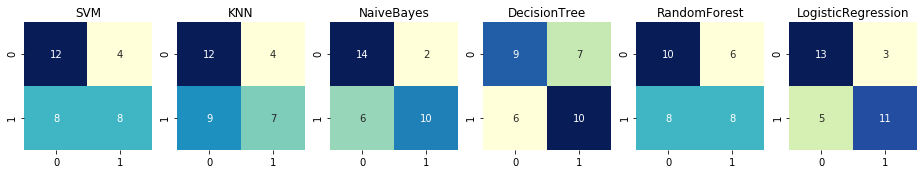

■■■■■■■■■■【week 2】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
4             4.0         2.0   F1_score  0.631579  0.594595    0.702703   
5             4.0         2.0  Precision  0.545455  0.523810    0.619048   
6             4.0         2.0     Recall  0.750000  0.687500    0.812500   
7             4.0         2.0   Accuracy  0.562500  0.531250    0.656250   
64            5.0         2.0   F1_score  0.717949  0.631579    0.736842   
65            5.0         2.0  Precision  0.608696  0.545455    0.636364   
66            5.0         2.0     Recall  0.875000  0.750000    0.875000   
67            5.0         2.0   Accuracy  0.656250  0.562500    0.687500   
124           6.0         2.0   F1_score  0.702703  0.648649    0.756757   
125           6.0         2.0  Precision  0.619048  0.571429    0.666667   
126           6.0         2.0     Recall  0.812500  0.750000    0.875000   
127           6.0         2.0   Accuracy  0.656250  0.593750    0.718750   
184           7.0         2.0   F1_score  0.736842  0.555556    0.736842   
185           7.0         2.0  Precision  0.636364  0.500000    0.636364   
186           7.0         2.0     Recall  0.875000  0.625000    0.875000   
187           7.0         2.0   Accuracy  0.687500  0.500000    0.687500   
244           8.0         2.0   F1_score  0.722222  0.514286    0.736842   
245           8.0         2.0  Precision  0.650000  0.473684    0.636364   
246           8.0         2.0     Recall  0.812500  0.562500    0.875000   
247           8.0         2.0   Accuracy  0.687500  0.468750    0.687500   
304           9.0         2.0   F1_score  0.736842  0.540541    0.756757   
305           9.0         2.0  Precision  0.636364  0.476190    0.666667   
306           9.0         2.0     Recall  0.875000  0.625000    0.875000   
307           9.0         2.0   Accuracy  0.687500  0.468750    0.718750   
364          10.0         2.0   F1_score  0.717949  0.594595    0.722222   
365          10.0         2.0  Precision  0.608696  0.523810    0.650000   
366          10.0         2.0     Recall  0.875000  0.687500    0.812500   
367          10.0         2.0   Accuracy  0.656250  0.531250    0.687500   

     DecisionTree  RandomForest  LogisticRegression  
4        0.470588      0.388889            0.457143  
5        0.444444      0.350000            0.421053  
6        0.500000      0.437500            0.500000  
7        0.437500      0.312500            0.406250  
64       0.526316      0.611111            0.578947  
65       0.454545      0.550000            0.500000  
66       0.625000      0.687500            0.687500  
67       0.437500      0.562500            0.500000  
124      0.628571      0.705882            0.564103  
125      0.578947      0.666667            0.478261  
126      0.687500      0.750000            0.687500  
127      0.593750      0.687500            0.468750  
184      0.645161      0.666667            0.651163  
185      0.666667      0.647059            0.518519  
186      0.625000      0.687500            0.875000  
187      0.656250      0.656250            0.531250  
244      0.500000      0.600000            0.564103  
245      0.500000      0.642857            0.478261  
246      0.500000      0.562500            0.687500  
247      0.500000      0.625000            0.468750  
304      0.444444      0.647059            0.700000  
305      0.400000      0.611111            0.583333  
306      0.500000      0.687500            0.875000  
307      0.375000      0.625000            0.625000  
364      0.484848      0.628571            0.600000  
365      0.470588      0.578947            0.500000  
366      0.500000      0.687500            0.750000  
367      0.468750      0.593750            0.500000

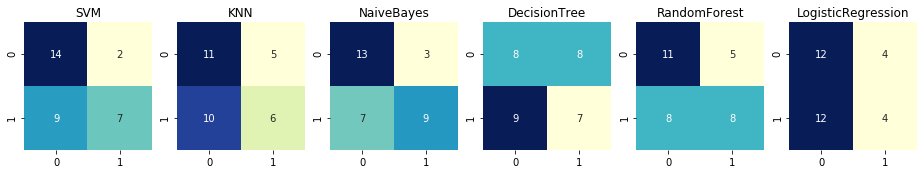

■■■■■■■■■■【week 3】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
8             4.0         3.0   F1_score  0.424242  0.457143    0.484848   
9             4.0         3.0  Precision  0.411765  0.421053    0.470588   
10            4.0         3.0     Recall  0.437500  0.500000    0.500000   
11            4.0         3.0   Accuracy  0.406250  0.406250    0.468750   
68            5.0         3.0   F1_score  0.571429  0.540541    0.594595   
69            5.0         3.0  Precision  0.461538  0.476190    0.523810   
70            5.0         3.0     Recall  0.750000  0.625000    0.687500   
71            5.0         3.0   Accuracy  0.437500  0.468750    0.531250   
128           6.0         3.0   F1_score  0.514286  0.628571    0.428571   
129           6.0         3.0  Precision  0.473684  0.578947    0.500000   
130           6.0         3.0     Recall  0.562500  0.687500    0.375000   
131           6.0         3.0   Accuracy  0.468750  0.593750    0.500000   
188           7.0         3.0   F1_score  0.285714  0.564103    0.214286   
189           7.0         3.0  Precision  0.263158  0.478261    0.250000   
190           7.0         3.0     Recall  0.312500  0.687500    0.187500   
191           7.0         3.0   Accuracy  0.218750  0.468750    0.312500   
248           8.0         3.0   F1_score  0.421053  0.529412    0.384615   
249           8.0         3.0  Precision  0.363636  0.500000    0.500000   
250           8.0         3.0     Recall  0.500000  0.562500    0.312500   
251           8.0         3.0   Accuracy  0.312500  0.500000    0.500000   
308           9.0         3.0   F1_score  0.411765  0.387097    0.538462   
309           9.0         3.0  Precision  0.388889  0.400000    0.700000   
310           9.0         3.0     Recall  0.437500  0.375000    0.437500   
311           9.0         3.0   Accuracy  0.375000  0.406250    0.625000   
368          10.0         3.0   F1_score  0.352941  0.514286    0.437500   
369          10.0         3.0  Precision  0.333333  0.473684    0.437500   
370          10.0         3.0     Recall  0.375000  0.562500    0.437500   
371          10.0         3.0   Accuracy  0.312500  0.468750    0.437500   

     DecisionTree  RandomForest  LogisticRegression  
8        0.500000      0.594595            0.487805  
9        0.583333      0.523810            0.400000  
10       0.437500      0.687500            0.625000  
11       0.562500      0.531250            0.343750  
68       0.562500      0.529412            0.500000  
69       0.562500      0.500000            0.450000  
70       0.562500      0.562500            0.562500  
71       0.562500      0.500000            0.437500  
128      0.529412      0.606061            0.540541  
129      0.500000      0.588235            0.476190  
130      0.562500      0.625000            0.625000  
131      0.500000      0.593750            0.468750  
188      0.529412      0.529412            0.444444  
189      0.500000      0.500000            0.400000  
190      0.562500      0.562500            0.500000  
191      0.500000      0.500000            0.375000  
248      0.470588      0.482759            0.473684  
249      0.444444      0.538462            0.409091  
250      0.500000      0.437500            0.562500  
251      0.437500      0.531250            0.375000  
308      0.500000      0.529412            0.444444  
309      0.500000      0.500000            0.400000  
310      0.500000      0.562500            0.500000  
311      0.500000      0.500000            0.375000  
368      0.344828      0.529412            0.363636  
369      0.384615      0.500000            0.352941  
370      0.312500      0.562500            0.375000  
371      0.406250      0.500000            0.343750

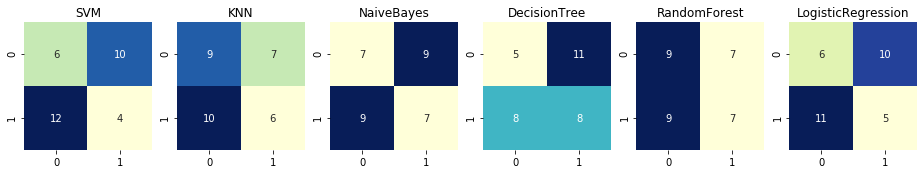

■■■■■■■■■■【week 4】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
12            4.0         4.0   F1_score  0.352941  0.628571    0.285714   
13            4.0         4.0  Precision  0.333333  0.578947    0.333333   
14            4.0         4.0     Recall  0.375000  0.687500    0.250000   
15            4.0         4.0   Accuracy  0.312500  0.593750    0.375000   
72            5.0         4.0   F1_score  0.512821  0.594595    0.470588   
73            5.0         4.0  Precision  0.434783  0.523810    0.444444   
74            5.0         4.0     Recall  0.625000  0.687500    0.500000   
75            5.0         4.0   Accuracy  0.406250  0.531250    0.437500   
132           6.0         4.0   F1_score  0.550000  0.484848    0.540541   
133           6.0         4.0  Precision  0.458333  0.470588    0.476190   
134           6.0         4.0     Recall  0.687500  0.500000    0.625000   
135           6.0         4.0   Accuracy  0.437500  0.468750    0.468750   
192           7.0         4.0   F1_score  0.550000  0.580645    0.500000   
193           7.0         4.0  Precision  0.458333  0.600000    0.450000   
194           7.0         4.0     Recall  0.687500  0.562500    0.562500   
195           7.0         4.0   Accuracy  0.437500  0.593750    0.437500   
252           8.0         4.0   F1_score  0.400000  0.562500    0.411765   
253           8.0         4.0  Precision  0.368421  0.562500    0.388889   
254           8.0         4.0     Recall  0.437500  0.562500    0.437500   
255           8.0         4.0   Accuracy  0.343750  0.562500    0.375000   
312           9.0         4.0   F1_score  0.285714  0.437500    0.148148   
313           9.0         4.0  Precision  0.263158  0.437500    0.181818   
314           9.0         4.0     Recall  0.312500  0.437500    0.125000   
315           9.0         4.0   Accuracy  0.218750  0.437500    0.281250   
372          10.0         4.0   F1_score  0.457143  0.466667    0.333333   
373          10.0         4.0  Precision  0.421053  0.500000    0.357143   
374          10.0         4.0     Recall  0.500000  0.437500    0.312500   
375          10.0         4.0   Accuracy  0.406250  0.500000    0.375000   

     DecisionTree  RandomForest  LogisticRegression  
12       0.500000      0.645161            0.518519  
13       0.500000      0.666667            0.636364  
14       0.500000      0.625000            0.437500  
15       0.500000      0.656250            0.593750  
72       0.484848      0.500000            0.413793  
73       0.470588      0.450000            0.461538  
74       0.500000      0.562500            0.375000  
75       0.468750      0.437500            0.468750  
132      0.451613      0.514286            0.500000  
133      0.466667      0.473684            0.583333  
134      0.437500      0.562500            0.437500  
135      0.468750      0.468750            0.562500  
192      0.451613      0.470588            0.370370  
193      0.466667      0.444444            0.454545  
194      0.437500      0.500000            0.312500  
195      0.468750      0.437500            0.468750  
252      0.322581      0.387097            0.500000  
253      0.333333      0.400000            0.583333  
254      0.312500      0.375000            0.437500  
255      0.343750      0.406250            0.562500  
312      0.387097      0.451613            0.370370  
313      0.400000      0.466667            0.454545  
314      0.375000      0.437500            0.312500  
315      0.406250      0.468750            0.468750  
372      0.551724      0.451613            0.400000  
373      0.615385      0.466667            0.555556  
374      0.500000      0.437500            0.312500  
375      0.593750      0.468750            0.531250

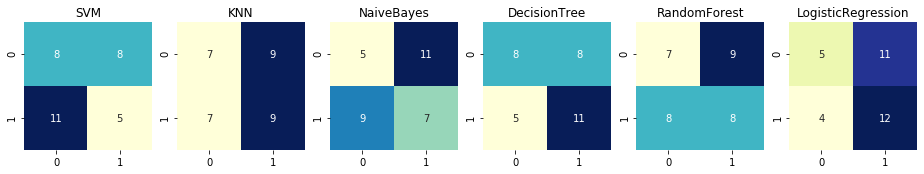

■■■■■■■■■■【week 5】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
16            4.0         5.0   F1_score  0.411765  0.514286    0.428571   
17            4.0         5.0  Precision  0.388889  0.473684    0.500000   
18            4.0         5.0     Recall  0.437500  0.562500    0.375000   
19            4.0         5.0   Accuracy  0.375000  0.468750    0.500000   
76            5.0         5.0   F1_score  0.240000  0.545455    0.384615   
77            5.0         5.0  Precision  0.333333  0.529412    0.500000   
78            5.0         5.0     Recall  0.187500  0.562500    0.312500   
79            5.0         5.0   Accuracy  0.406250  0.531250    0.500000   
136           6.0         5.0   F1_score  0.133333  0.516129    0.307692   
137           6.0         5.0  Precision  0.142857  0.533333    0.400000   
138           6.0         5.0     Recall  0.125000  0.500000    0.250000   
139           6.0         5.0   Accuracy  0.187500  0.531250    0.437500   
196           7.0         5.0   F1_score  0.333333  0.606061    0.285714   
197           7.0         5.0  Precision  0.357143  0.588235    0.333333   
198           7.0         5.0     Recall  0.312500  0.625000    0.250000   
199           7.0         5.0   Accuracy  0.375000  0.593750    0.375000   
256           8.0         5.0   F1_score  0.375000  0.600000    0.400000   
257           8.0         5.0  Precision  0.375000  0.642857    0.428571   
258           8.0         5.0     Recall  0.375000  0.562500    0.375000   
259           8.0         5.0   Accuracy  0.375000  0.625000    0.437500   
316           9.0         5.0   F1_score  0.200000  0.555556    0.480000   
317           9.0         5.0  Precision  0.214286  0.500000    0.666667   
318           9.0         5.0     Recall  0.187500  0.625000    0.375000   
319           9.0         5.0   Accuracy  0.250000  0.500000    0.593750   
376          10.0         5.0   F1_score  0.133333  0.545455    0.333333   
377          10.0         5.0  Precision  0.142857  0.529412    0.500000   
378          10.0         5.0     Recall  0.125000  0.562500    0.250000   
379          10.0         5.0   Accuracy  0.187500  0.531250    0.500000   

     DecisionTree  RandomForest  LogisticRegression  
16       0.428571      0.545455            0.606061  
17       0.500000      0.529412            0.588235  
18       0.375000      0.562500            0.625000  
19       0.500000      0.531250            0.593750  
76       0.647059      0.551724            0.687500  
77       0.611111      0.615385            0.687500  
78       0.687500      0.500000            0.687500  
79       0.625000      0.593750            0.687500  
136      0.344828      0.411765            0.571429  
137      0.384615      0.388889            0.526316  
138      0.312500      0.437500            0.625000  
139      0.406250      0.375000            0.531250  
196      0.275862      0.387097            0.625000  
197      0.307692      0.400000            0.625000  
198      0.250000      0.375000            0.625000  
199      0.343750      0.406250            0.625000  
256      0.562500      0.742857            0.628571  
257      0.562500      0.684211            0.578947  
258      0.562500      0.812500            0.687500  
259      0.562500      0.718750            0.593750  
316      0.685714      0.562500            0.666667  
317      0.631579      0.562500            0.647059  
318      0.750000      0.562500            0.687500  
319      0.656250      0.562500            0.656250  
376      0.702703      0.580645            0.666667  
377      0.619048      0.600000            0.647059  
378      0.812500      0.562500            0.687500  
379      0.656250      0.593750            0.656250

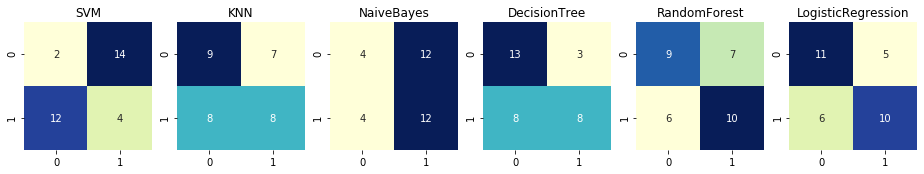

■■■■■■■■■■【week 6】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
20            4.0         6.0   F1_score  0.342857  0.500000    0.444444   
21            4.0         6.0  Precision  0.315789  0.500000    0.545455   
22            4.0         6.0     Recall  0.375000  0.500000    0.375000   
23            4.0         6.0   Accuracy  0.281250  0.500000    0.531250   
80            5.0         6.0   F1_score  0.514286  0.451613    0.413793   
81            5.0         6.0  Precision  0.473684  0.466667    0.461538   
82            5.0         6.0     Recall  0.562500  0.437500    0.375000   
83            5.0         6.0   Accuracy  0.468750  0.468750    0.468750   
140           6.0         6.0   F1_score  0.457143  0.484848    0.571429   
141           6.0         6.0  Precision  0.421053  0.470588    0.526316   
142           6.0         6.0     Recall  0.500000  0.500000    0.625000   
143           6.0         6.0   Accuracy  0.406250  0.468750    0.531250   
200           7.0         6.0   F1_score  0.484848  0.466667    0.296296   
201           7.0         6.0  Precision  0.470588  0.500000    0.363636   
202           7.0         6.0     Recall  0.500000  0.437500    0.250000   
203           7.0         6.0   Accuracy  0.468750  0.500000    0.406250   
260           8.0         6.0   F1_score  0.545455  0.451613    0.296296   
261           8.0         6.0  Precision  0.529412  0.466667    0.363636   
262           8.0         6.0     Recall  0.562500  0.437500    0.250000   
263           8.0         6.0   Accuracy  0.531250  0.468750    0.406250   
320           9.0         6.0   F1_score  0.363636  0.322581    0.357143   
321           9.0         6.0  Precision  0.352941  0.333333    0.416667   
322           9.0         6.0     Recall  0.375000  0.312500    0.312500   
323           9.0         6.0   Accuracy  0.343750  0.343750    0.437500   
380          10.0         6.0   F1_score  0.529412  0.437500    0.344828   
381          10.0         6.0  Precision  0.500000  0.437500    0.384615   
382          10.0         6.0     Recall  0.562500  0.437500    0.312500   
383          10.0         6.0   Accuracy  0.500000  0.437500    0.406250   

     DecisionTree  RandomForest  LogisticRegression  
20       0.500000      0.375000            0.606061  
21       0.500000      0.375000            0.588235  
22       0.500000      0.375000            0.625000  
23       0.500000      0.375000            0.593750  
80       0.500000      0.413793            0.555556  
81       0.500000      0.461538            0.500000  
82       0.500000      0.375000            0.625000  
83       0.500000      0.468750            0.500000  
140      0.424242      0.437500            0.529412  
141      0.411765      0.437500            0.500000  
142      0.437500      0.437500            0.562500  
143      0.406250      0.437500            0.500000  
200      0.571429      0.466667            0.529412  
201      0.526316      0.500000            0.500000  
202      0.625000      0.437500            0.562500  
203      0.531250      0.500000            0.500000  
260      0.413793      0.545455            0.545455  
261      0.461538      0.529412            0.529412  
262      0.375000      0.562500            0.562500  
263      0.468750      0.531250            0.531250  
320      0.526316      0.451613            0.571429  
321      0.454545      0.466667            0.526316  
322      0.625000      0.437500            0.625000  
323      0.437500      0.468750            0.531250  
380      0.451613      0.484848            0.555556  
381      0.466667      0.470588            0.500000  
382      0.437500      0.500000            0.625000  
383      0.468750      0.468750            0.500000

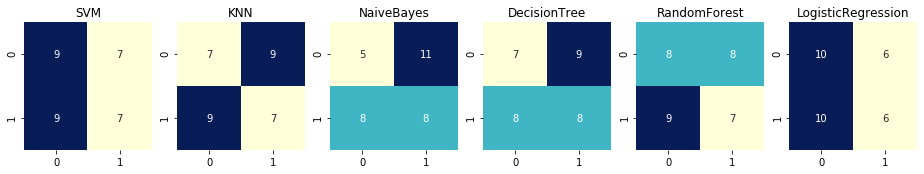

■■■■■■■■■■【week 7】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
24            4.0         7.0   F1_score  0.451613  0.451613    0.416667   
25            4.0         7.0  Precision  0.466667  0.466667    0.625000   
26            4.0         7.0     Recall  0.437500  0.437500    0.312500   
27            4.0         7.0   Accuracy  0.468750  0.468750    0.562500   
84            5.0         7.0   F1_score  0.470588  0.320000    0.461538   
85            5.0         7.0  Precision  0.444444  0.444444    0.600000   
86            5.0         7.0     Recall  0.500000  0.250000    0.375000   
87            5.0         7.0   Accuracy  0.437500  0.468750    0.562500   
144           6.0         7.0   F1_score  0.387097  0.400000    0.500000   
145           6.0         7.0  Precision  0.400000  0.428571    0.583333   
146           6.0         7.0     Recall  0.375000  0.375000    0.437500   
147           6.0         7.0   Accuracy  0.406250  0.437500    0.562500   
204           7.0         7.0   F1_score  0.206897  0.357143    0.444444   
205           7.0         7.0  Precision  0.230769  0.416667    0.545455   
206           7.0         7.0     Recall  0.187500  0.312500    0.375000   
207           7.0         7.0   Accuracy  0.281250  0.437500    0.531250   
264           8.0         7.0   F1_score  0.206897  0.400000    0.416667   
265           8.0         7.0  Precision  0.230769  0.555556    0.625000   
266           8.0         7.0     Recall  0.187500  0.312500    0.312500   
267           8.0         7.0   Accuracy  0.281250  0.531250    0.562500   
324           9.0         7.0   F1_score  0.206897  0.153846    0.518519   
325           9.0         7.0  Precision  0.230769  0.200000    0.636364   
326           9.0         7.0     Recall  0.187500  0.125000    0.437500   
327           9.0         7.0   Accuracy  0.281250  0.312500    0.593750   
384          10.0         7.0   F1_score  0.000000  0.222222    0.320000   
385          10.0         7.0  Precision  0.000000  0.272727    0.444444   
386          10.0         7.0     Recall  0.000000  0.187500    0.250000   
387          10.0         7.0   Accuracy  0.156250  0.343750    0.468750   

     DecisionTree  RandomForest  LogisticRegression  
24       0.611111      0.545455            0.611111  
25       0.550000      0.529412            0.550000  
26       0.687500      0.562500            0.687500  
27       0.562500      0.531250            0.562500  
84       0.344828      0.516129            0.645161  
85       0.384615      0.533333            0.666667  
86       0.312500      0.500000            0.625000  
87       0.406250      0.531250            0.656250  
144      0.533333      0.606061            0.687500  
145      0.571429      0.588235            0.687500  
146      0.500000      0.625000            0.687500  
147      0.562500      0.593750            0.687500  
204      0.500000      0.516129            0.687500  
205      0.500000      0.533333            0.687500  
206      0.500000      0.500000            0.687500  
207      0.500000      0.531250            0.687500  
264      0.592593      0.413793            0.687500  
265      0.727273      0.461538            0.687500  
266      0.500000      0.375000            0.687500  
267      0.656250      0.468750            0.687500  
324      0.625000      0.555556            0.687500  
325      0.625000      0.500000            0.687500  
326      0.625000      0.625000            0.687500  
327      0.625000      0.500000            0.687500  
384      0.514286      0.451613            0.687500  
385      0.473684      0.466667            0.687500  
386      0.562500      0.437500            0.687500  
387      0.468750      0.468750            0.687500

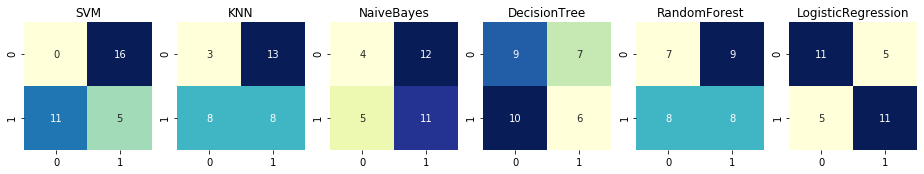

■■■■■■■■■■【week 8】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
28            4.0         8.0   F1_score  0.230769  0.230769    0.333333   
29            4.0         8.0  Precision  0.300000  0.300000    0.500000   
30            4.0         8.0     Recall  0.187500  0.187500    0.250000   
31            4.0         8.0   Accuracy  0.375000  0.375000    0.500000   
88            5.0         8.0   F1_score  0.285714  0.266667    0.444444   
89            5.0         8.0  Precision  0.333333  0.285714    0.545455   
90            5.0         8.0     Recall  0.250000  0.250000    0.375000   
91            5.0         8.0   Accuracy  0.375000  0.312500    0.531250   
148           6.0         8.0   F1_score  0.214286  0.153846    0.384615   
149           6.0         8.0  Precision  0.250000  0.200000    0.500000   
150           6.0         8.0     Recall  0.187500  0.125000    0.312500   
151           6.0         8.0   Accuracy  0.312500  0.312500    0.500000   
208           7.0         8.0   F1_score  0.200000  0.333333    0.357143   
209           7.0         8.0  Precision  0.214286  0.357143    0.416667   
210           7.0         8.0     Recall  0.187500  0.312500    0.312500   
211           7.0         8.0   Accuracy  0.250000  0.375000    0.437500   
268           8.0         8.0   F1_score  0.000000  0.129032    0.166667   
269           8.0         8.0  Precision  0.000000  0.133333    0.250000   
270           8.0         8.0     Recall  0.000000  0.125000    0.125000   
271           8.0         8.0   Accuracy  0.156250  0.156250    0.375000   
328           9.0         8.0   F1_score  0.074074  0.258065    0.320000   
329           9.0         8.0  Precision  0.090909  0.266667    0.444444   
330           9.0         8.0     Recall  0.062500  0.250000    0.250000   
331           9.0         8.0   Accuracy  0.218750  0.281250    0.468750   
388          10.0         8.0   F1_score  0.200000  0.250000    0.240000   
389          10.0         8.0  Precision  0.214286  0.250000    0.333333   
390          10.0         8.0     Recall  0.187500  0.250000    0.187500   
391          10.0         8.0   Accuracy  0.250000  0.250000    0.406250   

     DecisionTree  RandomForest  LogisticRegression  
28       0.357143      0.387097            0.484848  
29       0.416667      0.400000            0.470588  
30       0.312500      0.375000            0.500000  
31       0.437500      0.406250            0.468750  
88       0.258065      0.214286            0.470588  
89       0.266667      0.250000            0.444444  
90       0.250000      0.187500            0.500000  
91       0.281250      0.312500            0.437500  
148      0.375000      0.400000            0.466667  
149      0.375000      0.428571            0.500000  
150      0.375000      0.375000            0.437500  
151      0.375000      0.437500            0.500000  
208      0.400000      0.312500            0.529412  
209      0.428571      0.312500            0.500000  
210      0.375000      0.312500            0.562500  
211      0.437500      0.312500            0.500000  
268      0.400000      0.413793            0.484848  
269      0.555556      0.461538            0.470588  
270      0.312500      0.375000            0.500000  
271      0.531250      0.468750            0.468750  
328      0.352941      0.315789            0.411765  
329      0.333333      0.272727            0.388889  
330      0.375000      0.375000            0.437500  
331      0.312500      0.187500            0.375000  
388      0.400000      0.294118            0.540541  
389      0.368421      0.277778            0.476190  
390      0.437500      0.312500            0.625000  
391      0.343750      0.250000            0.468750

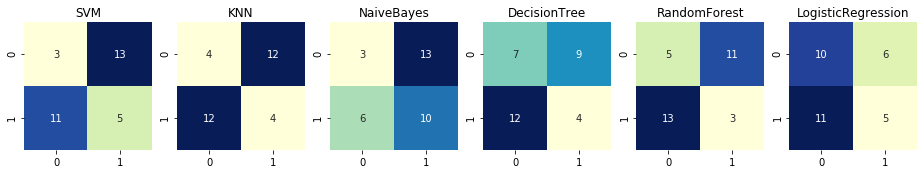

■■■■■■■■■■【week 9】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
32            4.0         9.0   F1_score  0.285714  0.466667    0.500000   
33            4.0         9.0  Precision  0.333333  0.500000    0.583333   
34            4.0         9.0     Recall  0.250000  0.437500    0.437500   
35            4.0         9.0   Accuracy  0.375000  0.500000    0.562500   
92            5.0         9.0   F1_score  0.133333  0.428571    0.482759   
93            5.0         9.0  Precision  0.142857  0.500000    0.538462   
94            5.0         9.0     Recall  0.125000  0.375000    0.437500   
95            5.0         9.0   Accuracy  0.187500  0.500000    0.531250   
152           6.0         9.0   F1_score  0.187500  0.333333    0.500000   
153           6.0         9.0  Precision  0.187500  0.357143    0.583333   
154           6.0         9.0     Recall  0.187500  0.312500    0.437500   
155           6.0         9.0   Accuracy  0.187500  0.375000    0.562500   
212           7.0         9.0   F1_score  0.000000  0.344828    0.444444   
213           7.0         9.0  Precision  0.000000  0.384615    0.545455   
214           7.0         9.0     Recall  0.000000  0.312500    0.375000   
215           7.0         9.0   Accuracy  0.156250  0.406250    0.531250   
272           8.0         9.0   F1_score  0.064516  0.303030    0.384615   
273           8.0         9.0  Precision  0.066667  0.294118    0.500000   
274           8.0         9.0     Recall  0.062500  0.312500    0.312500   
275           8.0         9.0   Accuracy  0.093750  0.281250    0.500000   
332           9.0         9.0   F1_score  0.153846  0.307692    0.461538   
333           9.0         9.0  Precision  0.200000  0.400000    0.600000   
334           9.0         9.0     Recall  0.125000  0.250000    0.375000   
335           9.0         9.0   Accuracy  0.312500  0.437500    0.562500   
392          10.0         9.0   F1_score  0.181818  0.322581    0.250000   
393          10.0         9.0  Precision  0.176471  0.333333    0.375000   
394          10.0         9.0     Recall  0.187500  0.312500    0.187500   
395          10.0         9.0   Accuracy  0.156250  0.343750    0.437500   

     DecisionTree  RandomForest  LogisticRegression  
32       0.551724      0.451613            0.714286  
33       0.615385      0.466667            0.576923  
34       0.500000      0.437500            0.937500  
35       0.593750      0.468750            0.625000  
92       0.645161      0.685714            0.615385  
93       0.666667      0.631579            0.521739  
94       0.625000      0.750000            0.750000  
95       0.656250      0.656250            0.531250  
152      0.500000      0.516129            0.650000  
153      0.500000      0.533333            0.541667  
154      0.500000      0.500000            0.812500  
155      0.500000      0.531250            0.562500  
212      0.466667      0.545455            0.666667  
213      0.500000      0.529412            0.565217  
214      0.437500      0.562500            0.812500  
215      0.500000      0.531250            0.593750  
272      0.647059      0.500000            0.615385  
273      0.611111      0.500000            0.521739  
274      0.687500      0.500000            0.750000  
275      0.625000      0.500000            0.531250  
332      0.687500      0.628571            0.631579  
333      0.687500      0.578947            0.545455  
334      0.687500      0.687500            0.750000  
335      0.687500      0.593750            0.562500  
392      0.357143      0.457143            0.628571  
393      0.416667      0.421053            0.578947  
394      0.312500      0.500000            0.687500  
395      0.437500      0.406250            0.593750

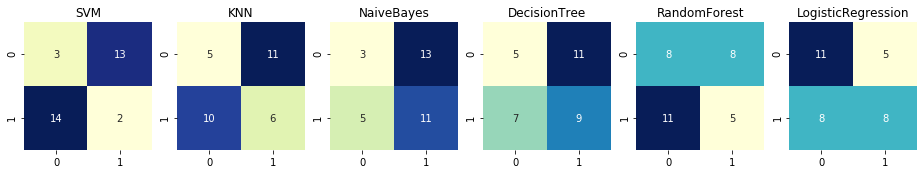

■■■■■■■■■■【week 11】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
36            4.0        11.0   F1_score  0.533333  0.500000    0.551724   
37            4.0        11.0  Precision  0.571429  0.583333    0.615385   
38            4.0        11.0     Recall  0.500000  0.437500    0.500000   
39            4.0        11.0   Accuracy  0.562500  0.562500    0.593750   
96            5.0        11.0   F1_score  0.645161  0.600000    0.687500   
97            5.0        11.0  Precision  0.666667  0.642857    0.687500   
98            5.0        11.0     Recall  0.625000  0.562500    0.687500   
99            5.0        11.0   Accuracy  0.656250  0.625000    0.687500   
156           6.0        11.0   F1_score  0.580645  0.533333    0.562500   
157           6.0        11.0  Precision  0.600000  0.571429    0.562500   
158           6.0        11.0     Recall  0.562500  0.500000    0.562500   
159           6.0        11.0   Accuracy  0.593750  0.562500    0.562500   
216           7.0        11.0   F1_score  0.645161  0.625000    0.562500   
217           7.0        11.0  Precision  0.666667  0.625000    0.562500   
218           7.0        11.0     Recall  0.625000  0.625000    0.562500   
219           7.0        11.0   Accuracy  0.656250  0.625000    0.562500   
276           8.0        11.0   F1_score  0.709677  0.580645    0.647059   
277           8.0        11.0  Precision  0.733333  0.600000    0.611111   
278           8.0        11.0     Recall  0.687500  0.562500    0.687500   
279           8.0        11.0   Accuracy  0.718750  0.593750    0.625000   
336           9.0        11.0   F1_score  0.500000  0.533333    0.416667   
337           9.0        11.0  Precision  0.500000  0.571429    0.625000   
338           9.0        11.0     Recall  0.500000  0.500000    0.312500   
339           9.0        11.0   Accuracy  0.500000  0.562500    0.562500   
396          10.0        11.0   F1_score  0.606061  0.625000    0.571429   
397          10.0        11.0  Precision  0.588235  0.625000    0.666667   
398          10.0        11.0     Recall  0.625000  0.625000    0.500000   
399          10.0        11.0   Accuracy  0.593750  0.625000    0.625000   

     DecisionTree  RandomForest  LogisticRegression  
36       0.727273      0.625000            0.606061  
37       0.705882      0.625000            0.588235  
38       0.750000      0.625000            0.625000  
39       0.718750      0.625000            0.593750  
96       0.764706      0.687500            0.705882  
97       0.722222      0.687500            0.666667  
98       0.812500      0.687500            0.750000  
99       0.750000      0.687500            0.687500  
156      0.588235      0.628571            0.606061  
157      0.555556      0.578947            0.588235  
158      0.625000      0.687500            0.625000  
159      0.562500      0.593750            0.593750  
216      0.611111      0.689655            0.606061  
217      0.550000      0.769231            0.588235  
218      0.687500      0.625000            0.625000  
219      0.562500      0.718750            0.593750  
276      0.625000      0.625000            0.606061  
277      0.625000      0.625000            0.588235  
278      0.625000      0.625000            0.625000  
279      0.625000      0.625000            0.593750  
336      0.620690      0.687500            0.702703  
337      0.692308      0.687500            0.619048  
338      0.562500      0.687500            0.812500  
339      0.656250      0.687500            0.656250  
396      0.500000      0.685714            0.606061  
397      0.500000      0.631579            0.588235  
398      0.500000      0.750000            0.625000  
399      0.500000      0.656250            0.593750

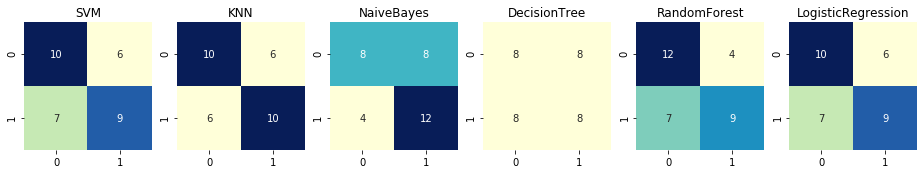

■■■■■■■■■■【week 12】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
40            4.0        12.0   F1_score  0.333333  0.258065    0.320000   
41            4.0        12.0  Precision  0.300000  0.266667    0.444444   
42            4.0        12.0     Recall  0.375000  0.250000    0.250000   
43            4.0        12.0   Accuracy  0.250000  0.281250    0.468750   
100           5.0        12.0   F1_score  0.352941  0.555556    0.181818   
101           5.0        12.0  Precision  0.333333  0.500000    0.333333   
102           5.0        12.0     Recall  0.375000  0.625000    0.125000   
103           5.0        12.0   Accuracy  0.312500  0.500000    0.437500   
160           6.0        12.0   F1_score  0.133333  0.484848    0.240000   
161           6.0        12.0  Precision  0.142857  0.470588    0.333333   
162           6.0        12.0     Recall  0.125000  0.500000    0.187500   
163           6.0        12.0   Accuracy  0.187500  0.468750    0.406250   
220           7.0        12.0   F1_score  0.200000  0.312500    0.173913   
221           7.0        12.0  Precision  0.214286  0.312500    0.285714   
222           7.0        12.0     Recall  0.187500  0.312500    0.125000   
223           7.0        12.0   Accuracy  0.250000  0.312500    0.406250   
280           8.0        12.0   F1_score  0.294118  0.333333    0.307692   
281           8.0        12.0  Precision  0.277778  0.357143    0.400000   
282           8.0        12.0     Recall  0.312500  0.312500    0.250000   
283           8.0        12.0   Accuracy  0.250000  0.375000    0.437500   
340           9.0        12.0   F1_score  0.266667  0.484848    0.320000   
341           9.0        12.0  Precision  0.285714  0.470588    0.444444   
342           9.0        12.0     Recall  0.250000  0.500000    0.250000   
343           9.0        12.0   Accuracy  0.312500  0.468750    0.468750   
400          10.0        12.0   F1_score  0.250000  0.437500    0.250000   
401          10.0        12.0  Precision  0.250000  0.437500    0.375000   
402          10.0        12.0     Recall  0.250000  0.437500    0.187500   
403          10.0        12.0   Accuracy  0.250000  0.437500    0.437500   

     DecisionTree  RandomForest  LogisticRegression  
40       0.387097      0.363636            0.500000  
41       0.400000      0.352941            0.500000  
42       0.375000      0.375000            0.500000  
43       0.406250      0.343750            0.500000  
100      0.451613      0.303030            0.466667  
101      0.466667      0.294118            0.500000  
102      0.437500      0.312500            0.437500  
103      0.468750      0.281250            0.500000  
160      0.444444      0.466667            0.466667  
161      0.545455      0.500000            0.500000  
162      0.375000      0.437500            0.437500  
163      0.531250      0.500000            0.500000  
220      0.333333      0.424242            0.482759  
221      0.357143      0.411765            0.538462  
222      0.312500      0.437500            0.437500  
223      0.375000      0.406250            0.531250  
280      0.466667      0.400000            0.428571  
281      0.500000      0.428571            0.500000  
282      0.437500      0.375000            0.375000  
283      0.500000      0.437500            0.500000  
340      0.400000      0.387097            0.482759  
341      0.428571      0.400000            0.538462  
342      0.375000      0.375000            0.437500  
343      0.437500      0.406250            0.531250  
400      0.400000      0.484848            0.344828  
401      0.428571      0.470588            0.384615  
402      0.375000      0.500000            0.312500  
403      0.437500      0.468750            0.406250

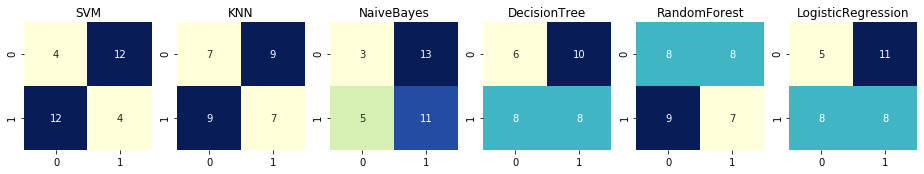

■■■■■■■■■■【week 13】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
44            4.0        13.0   F1_score  0.514286  0.529412    0.230769   
45            4.0        13.0  Precision  0.473684  0.500000    0.300000   
46            4.0        13.0     Recall  0.562500  0.562500    0.187500   
47            4.0        13.0   Accuracy  0.468750  0.500000    0.375000   
104           5.0        13.0   F1_score  0.388889  0.514286    0.230769   
105           5.0        13.0  Precision  0.350000  0.473684    0.300000   
106           5.0        13.0     Recall  0.437500  0.562500    0.187500   
107           5.0        13.0   Accuracy  0.312500  0.468750    0.375000   
164           6.0        13.0   F1_score  0.444444  0.500000    0.296296   
165           6.0        13.0  Precision  0.400000  0.450000    0.363636   
166           6.0        13.0     Recall  0.500000  0.562500    0.250000   
167           6.0        13.0   Accuracy  0.375000  0.437500    0.406250   
224           7.0        13.0   F1_score  0.000000  0.500000    0.230769   
225           7.0        13.0  Precision  0.000000  0.450000    0.300000   
226           7.0        13.0     Recall  0.000000  0.562500    0.187500   
227           7.0        13.0   Accuracy  0.062500  0.437500    0.375000   
284           8.0        13.0   F1_score  0.444444  0.555556    0.384615   
285           8.0        13.0  Precision  0.400000  0.500000    0.500000   
286           8.0        13.0     Recall  0.500000  0.625000    0.312500   
287           8.0        13.0   Accuracy  0.375000  0.500000    0.500000   
344           9.0        13.0   F1_score  0.470588  0.615385    0.333333   
345           9.0        13.0  Precision  0.444444  0.521739    0.357143   
346           9.0        13.0     Recall  0.500000  0.750000    0.312500   
347           9.0        13.0   Accuracy  0.437500  0.531250    0.375000   
404          10.0        13.0   F1_score  0.424242  0.526316    0.357143   
405          10.0        13.0  Precision  0.411765  0.454545    0.416667   
406          10.0        13.0     Recall  0.437500  0.625000    0.312500   
407          10.0        13.0   Accuracy  0.406250  0.437500    0.437500   

     DecisionTree  RandomForest  LogisticRegression  
44       0.344828      0.424242            0.400000  
45       0.384615      0.411765            0.428571  
46       0.312500      0.437500            0.375000  
47       0.406250      0.406250            0.437500  
104      0.594595      0.666667            0.428571  
105      0.523810      0.600000            0.500000  
106      0.687500      0.750000            0.375000  
107      0.531250      0.625000            0.500000  
164      0.470588      0.588235            0.444444  
165      0.444444      0.555556            0.545455  
166      0.500000      0.625000            0.375000  
167      0.437500      0.562500            0.531250  
224      0.357143      0.588235            0.466667  
225      0.416667      0.555556            0.500000  
226      0.312500      0.625000            0.437500  
227      0.437500      0.562500            0.500000  
284      0.545455      0.606061            0.516129  
285      0.529412      0.588235            0.533333  
286      0.562500      0.625000            0.500000  
287      0.531250      0.593750            0.531250  
344      0.545455      0.457143            0.533333  
345      0.529412      0.421053            0.571429  
346      0.562500      0.500000            0.500000  
347      0.531250      0.406250            0.562500  
404      0.428571      0.437500            0.357143  
405      0.500000      0.437500            0.416667  
406      0.375000      0.437500            0.312500  
407      0.500000      0.437500            0.437500

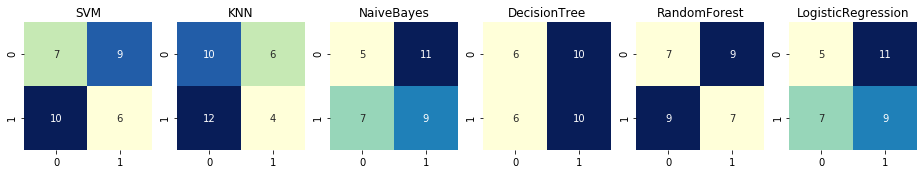

■■■■■■■■■■【week 14】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
48            4.0        14.0   F1_score  0.500000  0.357143    0.090909   
49            4.0        14.0  Precision  0.500000  0.416667    0.166667   
50            4.0        14.0     Recall  0.500000  0.312500    0.062500   
51            4.0        14.0   Accuracy  0.500000  0.437500    0.375000   
108           5.0        14.0   F1_score  0.193548  0.387097    0.370370   
109           5.0        14.0  Precision  0.200000  0.400000    0.454545   
110           5.0        14.0     Recall  0.187500  0.375000    0.312500   
111           5.0        14.0   Accuracy  0.218750  0.406250    0.468750   
168           6.0        14.0   F1_score  0.200000  0.333333    0.296296   
169           6.0        14.0  Precision  0.214286  0.357143    0.363636   
170           6.0        14.0     Recall  0.187500  0.312500    0.250000   
171           6.0        14.0   Accuracy  0.250000  0.375000    0.406250   
228           7.0        14.0   F1_score  0.285714  0.550000    0.080000   
229           7.0        14.0  Precision  0.263158  0.458333    0.111111   
230           7.0        14.0     Recall  0.312500  0.687500    0.062500   
231           7.0        14.0   Accuracy  0.218750  0.437500    0.281250   
288           8.0        14.0   F1_score  0.142857  0.352941    0.275862   
289           8.0        14.0  Precision  0.166667  0.333333    0.307692   
290           8.0        14.0     Recall  0.125000  0.375000    0.250000   
291           8.0        14.0   Accuracy  0.250000  0.312500    0.343750   
348           9.0        14.0   F1_score  0.142857  0.424242    0.296296   
349           9.0        14.0  Precision  0.166667  0.411765    0.363636   
350           9.0        14.0     Recall  0.125000  0.437500    0.250000   
351           9.0        14.0   Accuracy  0.250000  0.406250    0.406250   
408          10.0        14.0   F1_score  0.363636  0.413793    0.153846   
409          10.0        14.0  Precision  0.352941  0.461538    0.200000   
410          10.0        14.0     Recall  0.375000  0.375000    0.125000   
411          10.0        14.0   Accuracy  0.343750  0.468750    0.312500   

     DecisionTree  RandomForest  LogisticRegression  
48       0.466667      0.580645            0.482759  
49       0.500000      0.600000            0.538462  
50       0.437500      0.562500            0.437500  
51       0.500000      0.593750            0.531250  
108      0.645161      0.647059            0.357143  
109      0.666667      0.611111            0.416667  
110      0.625000      0.687500            0.312500  
111      0.656250      0.625000            0.437500  
168      0.466667      0.322581            0.428571  
169      0.500000      0.333333            0.500000  
170      0.437500      0.312500            0.375000  
171      0.500000      0.343750            0.500000  
228      0.357143      0.222222            0.357143  
229      0.416667      0.272727            0.416667  
230      0.312500      0.187500            0.312500  
231      0.437500      0.343750            0.437500  
288      0.516129      0.451613            0.370370  
289      0.533333      0.466667            0.454545  
290      0.500000      0.437500            0.312500  
291      0.531250      0.468750            0.468750  
348      0.428571      0.375000            0.413793  
349      0.500000      0.375000            0.461538  
350      0.375000      0.375000            0.375000  
351      0.500000      0.375000            0.468750  
408      0.529412      0.482759            0.444444  
409      0.500000      0.538462            0.545455  
410      0.562500      0.437500            0.375000  
411      0.500000      0.531250            0.531250

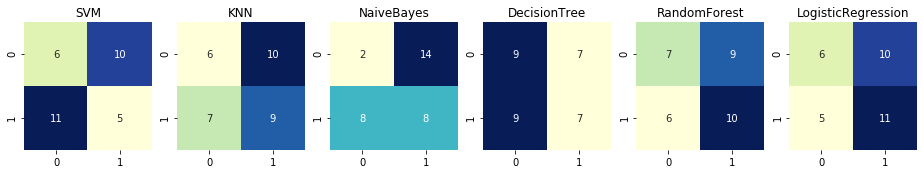

■■■■■■■■■■【week 15】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
52            4.0        15.0   F1_score  0.533333  0.482759    0.384615   
53            4.0        15.0  Precision  0.571429  0.538462    0.500000   
54            4.0        15.0     Recall  0.500000  0.437500    0.312500   
55            4.0        15.0   Accuracy  0.562500  0.531250    0.500000   
112           5.0        15.0   F1_score  0.482759  0.451613    0.307692   
113           5.0        15.0  Precision  0.538462  0.466667    0.400000   
114           5.0        15.0     Recall  0.437500  0.437500    0.250000   
115           5.0        15.0   Accuracy  0.531250  0.468750    0.437500   
172           6.0        15.0   F1_score  0.437500  0.400000    0.461538   
173           6.0        15.0  Precision  0.437500  0.428571    0.600000   
174           6.0        15.0     Recall  0.437500  0.375000    0.375000   
175           6.0        15.0   Accuracy  0.437500  0.437500    0.562500   
232           7.0        15.0   F1_score  0.500000  0.451613    0.518519   
233           7.0        15.0  Precision  0.500000  0.466667    0.636364   
234           7.0        15.0     Recall  0.500000  0.437500    0.437500   
235           7.0        15.0   Accuracy  0.500000  0.468750    0.593750   
292           8.0        15.0   F1_score  0.514286  0.413793    0.333333   
293           8.0        15.0  Precision  0.473684  0.461538    0.500000   
294           8.0        15.0     Recall  0.562500  0.375000    0.250000   
295           8.0        15.0   Accuracy  0.468750  0.468750    0.500000   
352           9.0        15.0   F1_score  0.625000  0.424242    0.320000   
353           9.0        15.0  Precision  0.625000  0.411765    0.444444   
354           9.0        15.0     Recall  0.625000  0.437500    0.250000   
355           9.0        15.0   Accuracy  0.625000  0.406250    0.468750   
412          10.0        15.0   F1_score  0.500000  0.470588    0.333333   
413          10.0        15.0  Precision  0.450000  0.444444    0.500000   
414          10.0        15.0     Recall  0.562500  0.500000    0.250000   
415          10.0        15.0   Accuracy  0.437500  0.437500    0.500000   

     DecisionTree  RandomForest  LogisticRegression  
52       0.562500      0.625000            0.444444  
53       0.562500      0.625000            0.545455  
54       0.562500      0.625000            0.375000  
55       0.562500      0.625000            0.531250  
112      0.500000      0.482759            0.451613  
113      0.500000      0.538462            0.466667  
114      0.500000      0.437500            0.437500  
115      0.500000      0.531250            0.468750  
172      0.516129      0.387097            0.516129  
173      0.533333      0.400000            0.533333  
174      0.500000      0.375000            0.500000  
175      0.531250      0.406250            0.531250  
232      0.344828      0.514286            0.551724  
233      0.384615      0.473684            0.615385  
234      0.312500      0.562500            0.500000  
235      0.406250      0.468750            0.593750  
292      0.451613      0.628571            0.466667  
293      0.466667      0.578947            0.500000  
294      0.437500      0.687500            0.437500  
295      0.468750      0.593750            0.500000  
352      0.484848      0.529412            0.466667  
353      0.470588      0.500000            0.500000  
354      0.500000      0.562500            0.437500  
355      0.468750      0.500000            0.500000  
412      0.457143      0.571429            0.428571  
413      0.421053      0.526316            0.500000  
414      0.500000      0.625000            0.375000  
415      0.406250      0.531250            0.500000

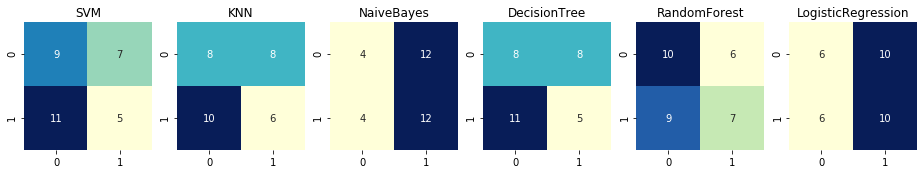

■■■■■■■■■■【week 16】■■■■■■■■■■


FactorNumber  WeekNumber    Metrics       SVM       KNN  Naivebayes  \
56            4.0        16.0   F1_score  0.571429  0.516129    0.666667   
57            4.0        16.0  Precision  0.666667  0.533333    0.714286   
58            4.0        16.0     Recall  0.500000  0.500000    0.625000   
59            4.0        16.0   Accuracy  0.625000  0.531250    0.687500   
116           5.0        16.0   F1_score  0.571429  0.428571    0.571429   
117           5.0        16.0  Precision  0.666667  0.500000    0.666667   
118           5.0        16.0     Recall  0.500000  0.375000    0.500000   
119           5.0        16.0   Accuracy  0.625000  0.500000    0.625000   
176           6.0        16.0   F1_score  0.571429  0.461538    0.333333   
177           6.0        16.0  Precision  0.666667  0.600000    0.500000   
178           6.0        16.0     Recall  0.500000  0.375000    0.250000   
179           6.0        16.0   Accuracy  0.625000  0.562500    0.500000   
236           7.0        16.0   F1_score  0.518519  0.461538    0.370370   
237           7.0        16.0  Precision  0.636364  0.600000    0.454545   
238           7.0        16.0     Recall  0.437500  0.375000    0.312500   
239           7.0        16.0   Accuracy  0.593750  0.562500    0.468750   
296           8.0        16.0   F1_score  0.518519  0.500000    0.461538   
297           8.0        16.0  Precision  0.636364  0.583333    0.600000   
298           8.0        16.0     Recall  0.437500  0.437500    0.375000   
299           8.0        16.0   Accuracy  0.593750  0.562500    0.562500   
356           9.0        16.0   F1_score  0.571429  0.551724    0.400000   
357           9.0        16.0  Precision  0.666667  0.615385    0.555556   
358           9.0        16.0     Recall  0.500000  0.500000    0.312500   
359           9.0        16.0   Accuracy  0.625000  0.593750    0.531250   
416          10.0        16.0   F1_score  0.571429  0.551724    0.461538   
417          10.0        16.0  Precision  0.666667  0.615385    0.600000   
418          10.0        16.0     Recall  0.500000  0.500000    0.375000   
419          10.0        16.0   Accuracy  0.625000  0.593750    0.562500   

     DecisionTree  RandomForest  LogisticRegression  
56       0.648649      0.628571            0.500000  
57       0.571429      0.578947            0.500000  
58       0.750000      0.687500            0.500000  
59       0.593750      0.593750            0.500000  
116      0.588235      0.444444            0.451613  
117      0.555556      0.545455            0.466667  
118      0.625000      0.375000            0.437500  
119      0.562500      0.531250            0.468750  
176      0.451613      0.370370            0.400000  
177      0.466667      0.454545            0.428571  
178      0.437500      0.312500            0.375000  
179      0.468750      0.468750            0.437500  
236      0.580645      0.533333            0.545455  
237      0.600000      0.571429            0.529412  
238      0.562500      0.500000            0.562500  
239      0.593750      0.562500            0.531250  
296      0.466667      0.444444            0.500000  
297      0.500000      0.545455            0.583333  
298      0.437500      0.375000            0.437500  
299      0.500000      0.531250            0.562500  
356      0.466667      0.666667            0.484848  
357      0.500000      0.647059            0.470588  
358      0.437500      0.687500            0.500000  
359      0.500000      0.656250            0.468750  
416      0.705882      0.764706            0.482759  
417      0.666667      0.722222            0.538462  
418      0.750000      0.812500            0.437500  
419      0.687500      0.750000            0.531250

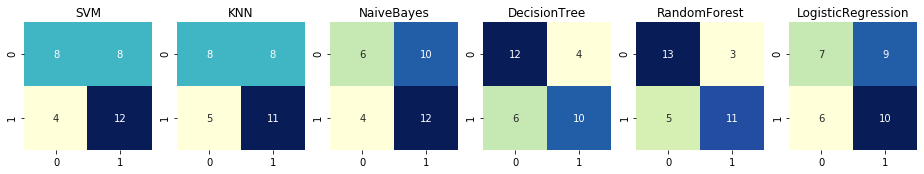

In [117]:
ff=10

group_type="final_hl"
fc1=FactorAnalyzer(n_factors=ff, rotation='varimax', use_smc=True, is_corr_matrix=False, bounds=(0.005, 1), impute='median')
fc1.fit(df_log_minmax3)
week_log=week_log.sort_values("WeekNumber")

for w in list(set(week_log["WeekNumber"])):
    print("■■■■■■■■■■【week "+str(w)+"】■■■■■■■■■■") 
    weekly_grand_total=week_log[week_log["WeekNumber"]<=w]
    weekly_gt_1=weekly_grand_total[["Username",
        'SyntaxError_Ct', 'NameError_Ct', 'AttributeError_Ct', 'TypeError_Ct', 'KeyError_Ct', 'ValueError_Ct', 'IndentationError_Ct', 'IndexError_Ct',
        'pattern_SimpleCondition_logct', 'pattern_MultipleCondition_logct', 'pattern_WhileIteration_logct',
        'pattern_ForInIteration_logct', 'pattern_NestIteration_logct', 'pattern_DefFunction_logct',
        'CopyCt', 'PasteCt', 'ExecutionCt', 'ExternalPasteLength',
        'modulemethod_log_usect', 'basicmethod_log_usect',
        'Timespent_ad', 'DebugTime']].groupby("Username").sum().reset_index(drop=False)
    weekly_gt_2=weekly_grand_total[["Username",
        'SyntaxError_Fixtime', 'NameError_Fixtime', 'AttributeError_Fixtime', 'TypeError_Fixtime', 
        'KeyError_Fixtime', 'ValueError_Fixtime', 'IndentationError_Fixtime', 'IndexError_Fixtime',
        'Grand_Module_ct', 'Grand_modulemethod_ct', 'Grand_basicmethod_ct']].drop_duplicates(["Username"], keep="last")
    weekly_gt_2=weekly_gt_2.rename(columns={'Grand_Module_ct':"Module_ct", 'Grand_modulemethod_ct':"Modulemethod_ct", 'Grand_basicmethod_ct':'Basicmethod_ct'})
    weekly_grand_total=pd.merge(weekly_gt_1, weekly_gt_2, on="Username", how="left")
    weekly_grand_total=pd.merge(weekly_grand_total, df_log_values[['wk_expr', 'non_py_prof', 'py_prof']], on="Username", how="left")
    od=["Username"]+list(df_log_minmax3.columns)
    weekly_grand_total=weekly_grand_total[od].set_index("Username")
    for cl in weekly_grand_total.columns:
        if len(weekly_grand_total[pd.isnull(weekly_grand_total[cl])])!=0:
            #print(cl)
            mm=np.nanmean(weekly_grand_total[cl])
            if pd.isnull(mm):
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(0)                
            else:
                weekly_grand_total[cl]=weekly_grand_total[cl].fillna(mm)
    
    minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
    weekly_gt_minmax=minmax.fit_transform(weekly_grand_total)
    #data轉換
    weekly_gt_factor=fc1.transform(weekly_gt_minmax)    
    weekly_gt_factor=pd.DataFrame(data=weekly_gt_factor, columns=list("ABCDEFGHIJ")[:ff], index=weekly_grand_total.index)
    weekly_gt_factor=pd.merge(weekly_gt_factor, df_scorengroup[[group_type]], on="Username", how="left")
    
    #display(weekly_gt_minmax.head())
    
    kf=KFold(n_splits=10,shuffle=True)
    predicted1=[]; expected1=[]
    predicted2=[]; expected2=[]
    predicted3=[]; expected3=[]
    predicted4=[]; expected4=[]
    predicted5=[]; expected5=[]
    predicted6=[]; expected6=[]

    for i,j in kf.split(weekly_gt_factor): ###
        classifier1=SVC(gamma="scale")
        classifier2=KNeighborsClassifier()
        classifier3=DecisionTreeClassifier()
        classifier4=GaussianNB()
        classifier5=RandomForestClassifier(n_estimators=20,random_state=0)
        classifier6=LogisticRegression()

        tr_x=np.array(weekly_gt_factor.iloc[:,:-1])[i]
        tr_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[i] 
        te_x=np.array(weekly_gt_factor.iloc[:,:-1])[j] 
        te_y=np.array(list(weekly_gt_factor.iloc[:,-1]))[j] 

        classifier1.fit(tr_x,tr_y)
        expected1.extend(te_y)
        predicted1.extend(classifier1.predict(te_x))

        classifier2.fit(tr_x,tr_y)
        expected2.extend(te_y)
        predicted2.extend(classifier2.predict(te_x))

        classifier3.fit(tr_x,tr_y)
        expected3.extend(te_y)
        predicted3.extend(classifier3.predict(te_x))

        classifier4.fit(tr_x,tr_y)
        expected4.extend(te_y)
        predicted4.extend(classifier4.predict(te_x))

        classifier5.fit(tr_x,tr_y)
        expected5.extend(te_y)
        predicted5.extend(classifier5.predict(te_x))

        classifier6.fit(tr_x,tr_y)
        expected6.extend(te_y)
        predicted6.extend(classifier6.predict(te_x))

    df_wkgt_final_hl_try.loc[n,"FactorNumber"]=ff
    df_wkgt_final_hl_try.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl_try.loc[n,"Metrics"]= "F1_score"
    df_wkgt_final_hl_try.loc[n,"SVM"]=metrics.f1_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"KNN"]=metrics.f1_score(expected2,predicted2, pos_label=0)    
    df_wkgt_final_hl_try.loc[n,"Naivebayes"]=metrics.f1_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"DecisionTree"]=metrics.f1_score(expected3,predicted3, pos_label=0)    
    df_wkgt_final_hl_try.loc[n,"RandomForest"]=metrics.f1_score(expected5,predicted5, pos_label=0)    
    df_wkgt_final_hl_try.loc[n,"LogisticRegression"]=metrics.f1_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_final_hl_try.loc[n,"FactorNumber"]=ff
    df_wkgt_final_hl_try.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl_try.loc[n,"Metrics"]= "Precision"
    df_wkgt_final_hl_try.loc[n,"SVM"]=metrics.precision_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"KNN"]=metrics.precision_score(expected2,predicted2, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"Naivebayes"]=metrics.precision_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"DecisionTree"]=metrics.precision_score(expected3,predicted3, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"RandomForest"]=metrics.precision_score(expected5,predicted5, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"LogisticRegression"]=metrics.precision_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_final_hl_try.loc[n,"FactorNumber"]=ff
    df_wkgt_final_hl_try.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl_try.loc[n,"Metrics"]= "Recall"    
    df_wkgt_final_hl_try.loc[n,"SVM"]=metrics.recall_score(expected1,predicted1, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"KNN"]=metrics.recall_score(expected2,predicted2, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"Naivebayes"]=metrics.recall_score(expected4,predicted4, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"DecisionTree"]=metrics.recall_score(expected3,predicted3, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"RandomForest"]=metrics.recall_score(expected5,predicted5, pos_label=0)
    df_wkgt_final_hl_try.loc[n,"LogisticRegression"]=metrics.recall_score(expected6,predicted6, pos_label=0)    
    n+=1
    df_wkgt_final_hl_try.loc[n,"FactorNumber"]=ff
    df_wkgt_final_hl_try.loc[n,"WeekNumber"]=int(w)
    df_wkgt_final_hl_try.loc[n,"Metrics"]= "Accuracy"    
    df_wkgt_final_hl_try.loc[n,"SVM"]=metrics.accuracy_score(expected1,predicted1)
    df_wkgt_final_hl_try.loc[n,"KNN"]=metrics.accuracy_score(expected2,predicted2)
    df_wkgt_final_hl_try.loc[n,"Naivebayes"]=metrics.accuracy_score(expected4,predicted4)
    df_wkgt_final_hl_try.loc[n,"DecisionTree"]=metrics.accuracy_score(expected3,predicted3)
    df_wkgt_final_hl_try.loc[n,"RandomForest"]=metrics.accuracy_score(expected5,predicted5)
    df_wkgt_final_hl_try.loc[n,"LogisticRegression"]=metrics.accuracy_score(expected6,predicted6)    
    n+=1 
    display(df_wkgt_final_hl_try[df_wkgt_final_hl_try.WeekNumber==w])
    
    plt.figure(figsize=(16,2.5))
    plt.subplot(161)
    plt.xlabel="SVM"
    mat1=pd.DataFrame(confusion_matrix(expected1,predicted1))
    ax1=sns.heatmap(mat1,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax1.set(title="SVM")
    
    plt.subplot(162)
    plt.xlabel="KNN"
    mat2=pd.DataFrame(confusion_matrix(expected2,predicted2))
    ax2=sns.heatmap(mat2,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax2.set(title="KNN")
    
    plt.subplot(163)
    plt.xlabel="NaiveBayes"
    mat4=pd.DataFrame(confusion_matrix(expected4,predicted4))
    ax3=sns.heatmap(mat4,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax3.set(title="NaiveBayes")
    
    plt.subplot(164)
    plt.xlabel="DecisionTree"
    mat3=pd.DataFrame(confusion_matrix(expected3,predicted3))
    ax4=sns.heatmap(mat3,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax4.set(title="DecisionTree")
    
    plt.subplot(165)
    plt.xlabel="RandomForest"
    mat5=pd.DataFrame(confusion_matrix(expected5,predicted5))
    ax5=sns.heatmap(mat5,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="RandomForest")
    
    plt.subplot(166)
    plt.xlabel="LogisticRegression"
    mat6=pd.DataFrame(confusion_matrix(expected6,predicted6))
    ax5=sns.heatmap(mat6,square=True,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
    ax5.set(title="LogisticRegression")
    plt.show()

In [123]:
df_wkgt_final_hl_try[(df_wkgt_final_hl_try["Metrics"]=="Accuracy")&(df_wkgt_final_hl_try["WeekNumber"]==8)]

FactorNumber  WeekNumber   Metrics      SVM      KNN  Naivebayes  \
31            4.0         8.0  Accuracy  0.37500  0.37500     0.50000   
91            5.0         8.0  Accuracy  0.37500  0.31250     0.53125   
151           6.0         8.0  Accuracy  0.31250  0.31250     0.50000   
211           7.0         8.0  Accuracy  0.25000  0.37500     0.43750   
271           8.0         8.0  Accuracy  0.15625  0.15625     0.37500   
331           9.0         8.0  Accuracy  0.21875  0.28125     0.46875   
391          10.0         8.0  Accuracy  0.25000  0.25000     0.40625   

     DecisionTree  RandomForest  LogisticRegression  
31        0.43750       0.40625             0.46875  
91        0.28125       0.31250             0.43750  
151       0.37500       0.43750             0.50000  
211       0.43750       0.31250             0.50000  
271       0.53125       0.46875             0.46875  
331       0.31250       0.18750             0.37500  
391       0.34375       0.25000             0.46875

In [125]:
df_wkgt_final_hl_try[(df_wkgt_final_hl_try["Metrics"]=="Accuracy")&(df_wkgt_final_hl_try["FactorNumber"]==8)]

FactorNumber  WeekNumber   Metrics      SVM      KNN  Naivebayes  \
243           8.0         0.0  Accuracy  0.68750  0.59375     0.75000   
247           8.0         2.0  Accuracy  0.68750  0.46875     0.68750   
251           8.0         3.0  Accuracy  0.31250  0.50000     0.50000   
255           8.0         4.0  Accuracy  0.34375  0.56250     0.37500   
259           8.0         5.0  Accuracy  0.37500  0.62500     0.43750   
263           8.0         6.0  Accuracy  0.53125  0.46875     0.40625   
267           8.0         7.0  Accuracy  0.28125  0.53125     0.56250   
271           8.0         8.0  Accuracy  0.15625  0.15625     0.37500   
275           8.0         9.0  Accuracy  0.09375  0.28125     0.50000   
279           8.0        11.0  Accuracy  0.71875  0.59375     0.62500   
283           8.0        12.0  Accuracy  0.25000  0.37500     0.43750   
287           8.0        13.0  Accuracy  0.37500  0.50000     0.50000   
291           8.0        14.0  Accuracy  0.25000  0.31250     0.34375   
295           8.0        15.0  Accuracy  0.46875  0.46875     0.50000   
299           8.0        16.0  Accuracy  0.59375  0.56250     0.56250   

     DecisionTree  RandomForest  LogisticRegression  
243       0.62500       0.59375             0.68750  
247       0.50000       0.62500             0.46875  
251       0.43750       0.53125             0.37500  
255       0.34375       0.40625             0.56250  
259       0.56250       0.71875             0.59375  
263       0.46875       0.53125             0.53125  
267       0.65625       0.46875             0.68750  
271       0.53125       0.46875             0.46875  
275       0.62500       0.50000             0.53125  
279       0.62500       0.62500             0.59375  
283       0.50000       0.43750             0.50000  
287       0.53125       0.59375             0.53125  
291       0.53125       0.46875             0.46875  
295       0.46875       0.59375             0.50000  
299       0.50000       0.53125             0.56250

In [126]:
df_wkgt_final_hl_try.to_excel("Classifier_WeeklyAccumulatedFactor2FinalHL_try.xlsx")

# Factor compare

In [32]:
df_log_factor0=fc.transform(df_log_minmax3)
df_log_factor0=pd.DataFrame(data=df_log_factor0, columns=list("ABCD"), index=df_log_minmax3.index)
df_log_factor0

A         B         C         D
Username                                         
108385601  0.656250 -1.437500  1.625000 -1.125000
108524010 -0.746094 -0.281250 -1.312500 -0.875000
108524012  1.085938  0.312500  0.625000 -0.750000
108524013  0.125000  0.312500 -1.328125 -1.890625
108582604 -0.125000  0.468750  0.437500 -3.125000
108892602  2.000000  0.187500  2.937500  1.250000
109322070  0.312500  1.750000 -1.812500 -2.531250
109385601 -0.609375 -1.875000  0.812500  3.781250
109521027  0.281250  0.671875 -3.250000 -0.828125
109521031 -0.671875 -1.734375  4.437500  2.656250
109522011 -0.203125  1.312500  0.125000  1.750000
109522095 -0.875000  2.375000  0.000000 -0.437500
109524001 -0.273438 -0.312500  0.437500  1.921875
109524002 -0.648438 -0.437500 -0.187500 -0.125000
109524003 -0.906250  1.562500  3.750000  0.234375
109524005  0.171875  1.437500 -1.625000 -0.464844
109524006  1.250000 -0.757812 -1.328125 -1.921875
109524007 -0.234375 -0.187500 -1.687500  0.531250
109524009  0.859375 -1.703125  1.554688 -1.062500
109524010  0.558594 -1.570312 -0.281250 -0.203125
109524011 -1.492188  0.312500 -2.062500 -2.000000
109524013  0.859375  0.062500  1.500000  1.625000
109524014 -1.093750 -0.437500  0.625000  0.687500
109524015  0.296875 -2.031250  2.062500  0.906250
109524016 -0.679688  0.181641 -2.570312 -0.296875
109524017  0.285156 -0.062500 -0.250000  0.062500
109524018  1.671875  1.500000 -3.250000  0.250000
109524019  3.109375  0.250000 -0.875000 -1.843750
109524022 -1.023438 -0.359375  1.078125  1.218750
109524023 -0.227539 -1.968750  4.250000  1.406250
109582006 -1.046875  1.562500 -1.156250  1.992188
109584003 -2.343750  0.281250 -2.062500 -0.265625

In [33]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
df_log_factor=minmax.fit_transform(df_log_factor0)
df_log_factor=pd.DataFrame(data=df_log_factor, columns=df_log_factor0.columns, index=df_log_factor0.index)


=====language_expr=====


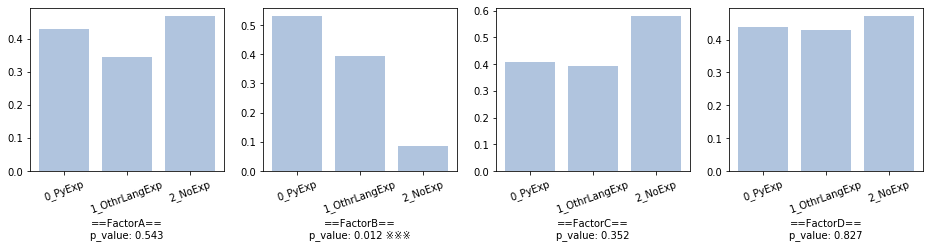

0_PyExp  1_OthrLangExp   2_NoExp    p_value
A  0.429799       0.345272  0.469108      0.543
B  0.531915       0.393617  0.085106  0.012 ※※※
C  0.406504       0.392276  0.581301      0.352
D  0.437783       0.428733  0.472851      0.827


=====final_q4_group=====


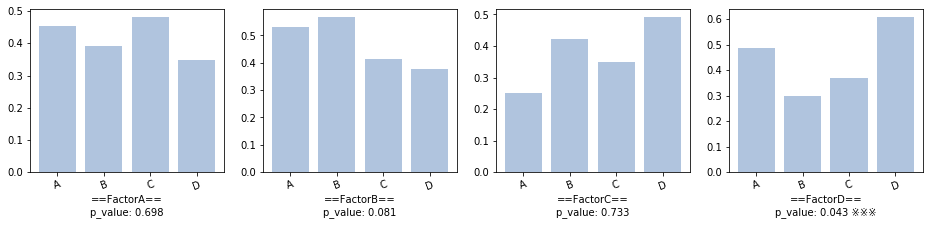

A         B         C         D    p_value
A  0.452722  0.392550  0.481734  0.348854      0.698
B  0.531915  0.567376  0.413121  0.375887      0.081
C  0.250000  0.422764  0.349593  0.491870      0.733
D  0.486425  0.298643  0.371041  0.608597  0.043 ※※※


=====python_ability_q4_group=====


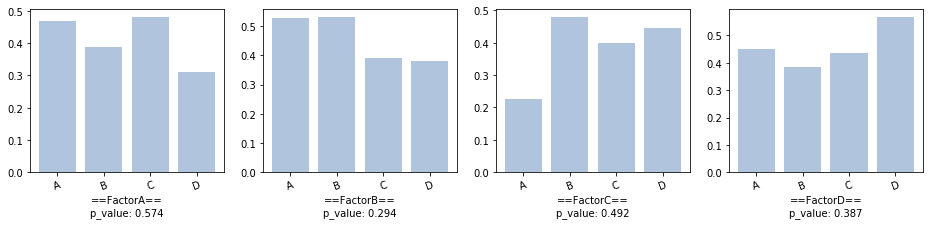

A         B         C         D p_value
A  0.469914  0.388073  0.481375  0.311605   0.574
B  0.528369  0.531915  0.390071  0.379433   0.294
C  0.226626  0.479675  0.398374  0.445122   0.492
D  0.451357  0.385181  0.434389  0.567873   0.387


=====13w_advance_g=====


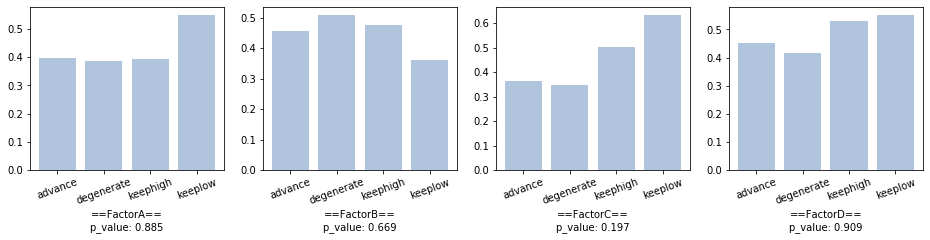

advance  degenerate  keephigh   keeplow p_value
A  0.397475    0.386103  0.392550  0.550143   0.885
B  0.457447    0.509973  0.475177  0.361702   0.669
C  0.364837    0.347561  0.504065  0.634146   0.197
D  0.451357    0.416290  0.529412  0.552036   0.909


=====kmeans_cluster=====


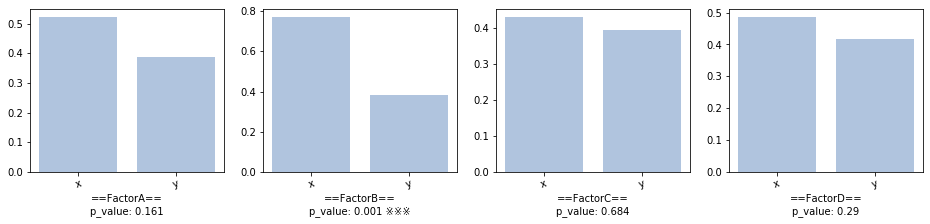

x         y    p_value
A  0.524355  0.387446      0.161
B  0.773050  0.384752  0.001 ※※※
C  0.430894  0.394309      0.684
D  0.487557  0.418552       0.29


=====hierarchical_cluster=====


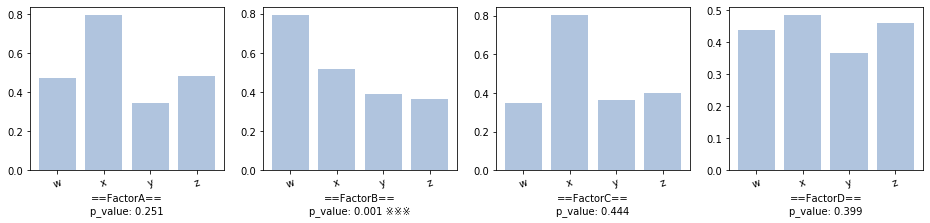

w         x         y         z    p_value
A  0.474212  0.796562  0.346705  0.481375      0.251
B  0.794326  0.517730  0.388298  0.361702  0.001 ※※※
C  0.347561  0.804878  0.365854  0.398374      0.444
D  0.438914  0.486425  0.367647  0.461538      0.399

In [34]:
group_list=['language_expr','final_q4_group','python_ability_q4_group','13w_advance_g','kmeans_cluster','hierarchical_cluster']
feature_list=list("ABCD")

for gp in group_list:
    df0=pd.merge(df_log_factor, df_scorengroup[[gp]], on="Username", how="left")
    if gp=="language_expr":
         df0["language_expr"]=df0["language_expr"].replace({"OtherLanguageExperience":"1_OthrLangExp", "PythonExperience":"0_PyExp", "NoExperience":"2_NoExp"})
    
    df_gp=pd.DataFrame()
    gp_item=list(set(df0[gp]))
            
    for ft in feature_list:
        x_list=[]
        for i in gp_item:
            x=list(df0[df0[gp]==i][ft])
            x_list.append(x)
            df_gp.loc[ft,i]=np.median(x)
        p=stats.kruskal(*x_list)[1]
        star=""
        if p<=0.05:  
            star=" ※※※"
        df_gp.loc[ft, "p_value"]=str(round(p,3))+star
        
    sorted_cl=list(df_gp.columns)
    sorted_cl.remove("p_value")
    sorted_cl.sort()
    df_gp=df_gp[sorted_cl+["p_value"]]

    print("\n====="+gp+"=====")
    plt.figure(figsize=(16,3))
    for ft in feature_list:
        df01=pd.DataFrame(df_gp.ix[ft,:-1])
        #plt.figure(figsize=(6,2))

        if ft=="A": nn=141
        if ft=="B": nn=142
        if ft=="C": nn=143
        if ft=="D": nn=144
        plt.subplot(nn)
        plt.bar(df01.index, df01[ft], color="lightsteelblue")
        ticks=list(df01.index)
#         ticks.sort()
        plt.xticks(range(len(ticks)), ticks, rotation=20)
        plt.xlabel("==Factor"+ft+"==\np_value: "+df_gp.ix[ft,-1])
    
    plt.show()
    display(df_gp)
#    df_gp.to_excel("Factor_kruskalwallis_"+gp+".xlsx")

# Cluster_finalscore_compare

In [10]:
df_scorengroup.head()

Username  pretest pretest_group pretest_q4_group  pretest_hl  Quiz06  \
0  108385601       30             D                D           0      55   
1  108524010       40             D                C           0      60   
2  108524012       70             D                B           1      95   
3  108524013       30             D                D           0      70   
4  108582604       60             D                B           1      60   

  Quiz06_group Quiz06_q4_group  Quiz06_hl  Quiz12 Quiz12_group  \
0            D               C          0      60            D   
1            D               C          0      35            D   
2            A               A          1      75            C   
3            D               B          1      80            C   
4            D               C          0      60            D   

  Quiz12_q4_group  Quiz12_hl  Quiz12_basic Quiz12_basic_group  \
0               C          0            60                  D   
1               D          0            30                  D   
2               B          1           100                  A   
3               B          1            70                  D   
4               C          0            70                  D   

  Quiz12_basic_q4_group  Quiz12_basic_hl  Quiz12_library Quiz12_library_group  \
0                     C                0              60                    D   
1                     D                0              40                    D   
2                     A                1              50                    D   
3                     C                1              90                    B   
4                     C                1              50                    D   

  Quiz12_library_q4_group  Quiz12_library_hl   dtth dtth_group dtth_q4_group  \
0                       D                  0  37.50          D             D   
1                       D                  0  37.50          D             D   
2                       D                  0  56.25          B             B   
3                       A                  1  62.50          A             A   
4                       D                  0  68.75          A             A   

   dtth_hl  final final_group final_q4_group  final_hl  final_fail  \
0        0   69.4           D              C         0           1   
1        0   63.0           D              D         0           1   
2        1   85.2           B              A         1           0   
3        1   82.7           B              A         1           0   
4        1   81.9           B              B         1           0   

             language_expr  python_ability python_ability_q4_group  \
0             NoExperience           46.50                       C   
1  OtherLanguageExperience           36.50                       D   
2         PythonExperience           63.75                       B   
3         PythonExperience           69.50                       A   
4         PythonExperience           65.25                       B   

   3w_advance  9w_advance  13w_advance  basic_advance  python_advance  \
0           1           1            0              1              -1   
1           0          -1           -1             -1              -1   
2           1           0            0              1              -1   
3           2           2            3              1               1   
4          -1          -1            1             -1               2   

  3w_advance_g 9w_advance_g 13w_advance_g python_advance_g basic_advance_g  \
0      advance      advance       keeplow       degenerate         advance   
1      keeplow   degenerate    degenerate       degenerate      degenerate   
2      advance     keephigh      keephigh       degenerate         advance   
3      advance      advance       advance          advance         advance   
4   degenerate   degenerate       advance          advance      degenerate   

  kmeans_cluster hierarchical_cluster  
0

In [13]:
df_scorengroup["style2"]=df_scorengroup["hierarchical_cluster"].map({"w":"精準","x":"紊亂","y":"精準","z":"紊亂"})
df_scorengroup["style1"]=df_scorengroup["hierarchical_cluster"].map({"w":"積極","x":"積極","y":"精簡","z":"精簡"})

In [16]:
display(df_scorengroup[["final", "style1"]].groupby("style1").median())
a=list(df_scorengroup[df_scorengroup["style1"]=="積極"]["final"])
b=list(df_scorengroup[df_scorengroup["style1"]=="精簡"]["final"])
p=stats.kruskal(a, b)[1]
print(p)

final
style1       
積極       81.5
精簡       73.0

0.07738465641531579


In [20]:
display(df_scorengroup[["final", "style1"]].groupby("style1").mean())
model = ols('final ~ C(style1, Sum)', data=df_scorengroup[["final", "style1"]]).fit()
table=sm.stats.anova_lm(model, typ=3)
print(table.loc["C(style1, Sum)","PR(>F)"])

final
style1           
積極      79.100000
精簡      73.885714

0.08695939346396932


In [17]:
display(df_scorengroup[["final", "style2"]].groupby("style2").median())
a=list(df_scorengroup[df_scorengroup["style2"]=="精準"]["final"])
b=list(df_scorengroup[df_scorengroup["style2"]=="紊亂"]["final"])
p=stats.kruskal(a, b)[1]
print(p)

final
style2       
精準      80.25
紊亂      69.35

0.017358858540855015


In [21]:
display(df_scorengroup[["final", "style2"]].groupby("style2").mean())
model = ols('final ~ C(style2, Sum)', data=df_scorengroup[["final", "style2"]]).fit()
table=sm.stats.anova_lm(model, typ=3)
print(table.loc["C(style2, Sum)","PR(>F)"])

final
style2           
精準      77.945455
紊亂      70.690000

0.01743814080899017


In [11]:
df_scorengroup[["final", "hierarchical_cluster"]].groupby("hierarchical_cluster").mean()

final
hierarchical_cluster           
w                     80.987500
x                     74.066667
y                     76.207143
z                     69.242857

# End